## 라이브러리 불러오기

In [ ]:
# 구글 드라이브 
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
# Data manipulation
# ==============================================================================
import os 
import numpy as np
import pandas as pd
!pip install -q datatable
import datatable as dt 

# Modelling and Forecasting
# ==============================================================================
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn import model_selection
from sklearn import metrics

from sklearn.linear_model import Ridge, BayesianRidge

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore') 

The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 155680 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


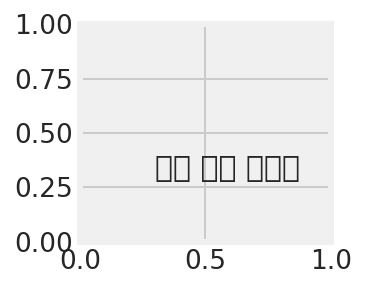

In [ ]:
# Plots
# ==============================================================================
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='whitegrid',font_scale=1.2)
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
#import plotly.express as px
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

## * 이 셀이 제대로 작동하지 않고 길게 warning 메시지가 나올 경우, 상단의 메뉴에서 <런타임>-<런타임 다시 시작>을 클릭한 뒤 처음부터 코드를 실행하세요 
# 그래프 한글 폰트 설정

import matplotlib.font_manager as fm
%config InlineBackend.figure_format = 'retina'

#폰트 설치
!apt -qq -y install fonts-nanum

#기본 폰트로 지정
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

#폰트 선명하게 보이게 하기 위해
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

## Test
plt.figure(figsize=(2,2))
plt.text(0.3, 0.3, '한글 폰트 테스트', size=15)
plt.show() 

In [ ]:
path = "/content/drive/MyDrive/날씨 빅콘/data"
os.chdir(path) 

In [ ]:
# # 모든 열 출력
# pd.set_option('display.max_columns', None)

# # 모든 행 출력
# pd.set_option('display.max_rows', None) 

## 데이터 불러오기

In [1401]:
train = pd.read_csv("/content/drive/MyDrive/날씨 빅콘/data/전처리데이터/train_test/ver_0804/train_0804.csv")
test = pd.read_csv("/content/drive/MyDrive/날씨 빅콘/data/전처리데이터/train_test/ver_0804/test_0804.csv") 

In [1402]:
print(train.shape)

(49674, 250)


In [1403]:
train.columns[train.columns.str.contains('14')]

Index(['avg_pa_14일평균', 'max_pa_14일평균', 'min_pa_14일평균', 'avg_ta_14일평균',
       'max_ta_14일평균', 'min_ta_14일평균', 'avg_rhm_14일평균', 'min_rhm_14일평균',
       'max_ws_14일평균', 'max_ins_ws_14일평균', 'NO2_14일평균'],
      dtype='object')

## 변수 추가: 역수, 제곱항, 로그항

In [1404]:
# 변수 추가 

import math

train['pop_over50_inverse'] = 1/train['pop_over50']
test['pop_over50_inverse'] = 1/test['pop_over50']

train['pop_over50_2'] = train['pop_over50'] ^2
test['pop_over50_2'] = test['pop_over50'] ^2

train['pop_over50_log'] = np.log1p(train['pop_over50'])
test['pop_over50_log'] = np.log1p(test['pop_over50'])

########################################################################

train['심장병_가족력_inverse'] = 1/train['심장병_가족력']
test['심장병_가족력_inverse'] = 1/test['심장병_가족력']

train['심장병_가족력_2'] = train['심장병_가족력'] * train['심장병_가족력']
test['심장병_가족력_2'] = test['심장병_가족력'] * test['심장병_가족력']

train['심장병_가족력_log'] = np.log1p(train['심장병_가족력'])
test['심장병_가족력_log'] = np.log1p(test['심장병_가족력'])

########################################################################

train['뇌졸중_약물치료_inverse'] = 1/train['뇌졸중_약물치료']
test['뇌졸중_약물치료_inverse'] = 1/test['뇌졸중_약물치료']

train['뇌졸중_약물치료_2'] = train['뇌졸중_약물치료'] * train['뇌졸중_약물치료']
test['뇌졸중_약물치료_2'] = test['뇌졸중_약물치료'] * test['뇌졸중_약물치료']

train['뇌졸중_약물치료_log'] = np.log1p(train['뇌졸중_약물치료'])
test['뇌졸중_약물치료_log'] = np.log1p(test['뇌졸중_약물치료'])

########################################################################

train['뇌졸중_진단_inverse'] = 1/train['뇌졸중_진단']
test['뇌졸중_진단_inverse'] = 1/test['뇌졸중_진단']

train['뇌졸중_진단_2'] = train['뇌졸중_진단'] * train['뇌졸중_진단']
test['뇌졸중_진단_2'] = test['뇌졸중_진단'] * test['뇌졸중_진단']

train['뇌졸중_진단_log'] = np.log1p(train['뇌졸중_진단'])
test['뇌졸중_진단_log'] = np.log1p(test['뇌졸중_진단'])

########################################################################

train['pop_over_심장병가족력'] = train['pop_over50']*train['심장병_가족력']
train['pop_over_뇌졸중약물치료'] = train['pop_over50']*train['뇌졸중_약물치료']
train['pop_over_뇌졸중_진단'] = train['pop_over50']*train['뇌졸중_진단']

test['pop_over_심장병가족력'] = test['pop_over50']*test['심장병_가족력']
test['pop_over_뇌졸중약물치료'] = test['pop_over50']*test['뇌졸중_약물치료']
test['pop_over_뇌졸중_진단'] = test['pop_over50']*test['뇌졸중_진단']

########################################################################

## 변수형 변환

In [1405]:
# 변수형 변환
train = train.astype({'num_back':'object',
                      'day1' : 'object', 
                      'Mon':'object',
                      '주말':'object',
                      'area' : 'object',
                      '요일' : 'object'})

test = test.astype({'num_back' : 'object',
                    'day1' : 'object',
                    'Mon':'object',
                    '주말':'object',
                    'area' : 'object',
                    '요일': 'object'})

In [1406]:
train.shape, test.shape

((49674, 265), (12444, 264))

## loop

In [ ]:
365 - 14*26

1

In [1411]:
## 전체 concat
concat_data = pd.merge(train, test, how='outer')

In [1417]:
x_train.columns[-80:-30]

Index(['min_rhm_7일평균', 'max_ws_7일평균', 'max_ins_ws_7일평균', 'NO2_7일평균',
       'avg_pa_14일평균', 'max_pa_14일평균', 'min_pa_14일평균', 'avg_ta_14일평균',
       'max_ta_14일평균', 'min_ta_14일평균', 'avg_rhm_14일평균', 'min_rhm_14일평균',
       'max_ws_14일평균', 'max_ins_ws_14일평균', 'NO2_14일평균', 'diff_ta', '큰일교차_횟수',
       'drink1', 'drink2', 'drink3', 'drink4', 'act0', 'act1', 'act2', 'act3',
       'act4', 'act5', 'act6', 'act7', 'drink', 'risky_drink', 'self_obesity',
       'healthy', 'pop_over50_inverse', 'pop_over50_2', 'pop_over50_log',
       '심장병_가족력_inverse', '심장병_가족력_2', '심장병_가족력_log', '뇌졸중_약물치료_inverse',
       '뇌졸중_약물치료_2', '뇌졸중_약물치료_log', '뇌졸중_진단_inverse', '뇌졸중_진단_2',
       '뇌졸중_진단_log', 'pop_over_심장병가족력', 'pop_over_뇌졸중약물치료', 'pop_over_뇌졸중_진단',
       'frequency_lag14', 'num_back_0.0'],
      dtype='object')

### 1번째 주

In [1413]:
      train_rows = 49674
      week = 1

      # 1) frequency lag14 만들기 

      ## frequency lag14 만들기 
      concat_data['frequency_lag14'] = concat_data.groupby(["area","sex"]).shift(14)['frequency']  # frequency 열 lag14
      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())



      concat_14 = concat_data.iloc[476: 49674 + 17*2*14*week, :]
      #concat_14 = concat_data.dropna(subset=['frequency_lag14'])  # 앞부분 frequency_lag14 결측인 행은 제외 
      
      print('concat_14 head: ', '\n', concat_14.iloc[:,:5].head())
      print('concat_14 tail: ', '\n', concat_14.iloc[:,:5].tail())
      print(concat_14.shape)

      # 2) train, test 나누기 
      nrow = concat_14.shape[0]
      train = concat_14.iloc[:(nrow-17*2*14), :].reset_index(drop=True)
      test = concat_14.iloc[-17*2*14:, :].reset_index(drop=True)  # 마지막 14일치 

      print('train')
      print(train.iloc[:,:5])

      train_yyyymmdd, train_area, train_sex = train['yyyymmdd'], train['area'], train['sex']
      test_yyyymmdd, test_area, test_sex = test['yyyymmdd'], test['area'], test['sex']

      print('test_yyyymmdd head: ', '\n', test_yyyymmdd[:2])
      print('test_yyyymmdd tail: ', '\n', test_yyyymmdd[-2:])

      # 3) 불필요한 열 삭제 
      train = train.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      test = test.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      print(train.shape, test.shape)


      # 4) x / y 나누기 
      x_train, y_train = train.drop(['frequency'],axis=1), train['frequency']  
      x_test, y_test = test.drop(['frequency'],axis=1), test['frequency']

      print('이거 쓰기')
      print(x_train.shape, y_train.shape)  
      print(x_test.shape, y_test.shape)
      print(2*17*14)
      # (49198, 262) (476, 262)
      # (49198, 287) (49198,)
      # (476, 287) (476,)

      # 5) 변수형별 전처리
      ## 변수형별로 저장 
      categorical_columns = ['num_back', 'Mon', '주말', 'area','요일']
      numeric_columns = list(x_train.columns.drop(categorical_columns))

      ## numeric_columns: 스케일링 
      mm_scaler = MinMaxScaler()
      x_train_sc = mm_scaler.fit_transform(x_train[numeric_columns])
      x_test_sc = mm_scaler.fit_transform(x_test[numeric_columns])

      x_train_sc = pd.DataFrame(x_train_sc, columns=numeric_columns)
      x_test_sc = pd.DataFrame(x_test_sc, columns=numeric_columns)

      x_train[numeric_columns] = x_train_sc
      x_test[numeric_columns] = x_test_sc

      ## categorical_columns: 더미변수 만들기 
      x_train = pd.concat([x_train, pd.get_dummies(x_train[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)
      x_test = pd.concat([x_test, pd.get_dummies(x_test[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)

      # 6) 크기 확인
      print(x_train.shape, y_train.shape)  
      print(x_test.shape, y_test.shape)
      print(2*17*14)

      # (49198, 262) (476, 262)
      # (49198, 287) (49198,)
      # (476, 287) (476,)

      # print(x_train.isnull().sum())
      # print(x_test.isnull().sum())

      # 7) 모델링
      BR = BayesianRidge()
      BR.fit(x_train, y_train)
      predict_test = BR.predict(x_test)

      # 8) 예측결과 저장
      pred14_df = pd.DataFrame({'yyyymmdd': test_yyyymmdd, 'area': test_area, 'sex': test_sex,
                                'frequency_pred': predict_test})
      print('pred14_df head: ', '\n', pred14_df.head())
      print('pred14_df tail: ', '\n', pred14_df.tail())

      concat_data = pd.merge(concat_data, pred14_df, how='left', on=['yyyymmdd','area','sex'])
      concat_data.frequency.fillna(concat_data.frequency_pred, inplace=True)
      concat_data.drop(['frequency_pred'], axis=1, inplace=True)

      # concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :]['frequency'] = predict_test

      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].head())
      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].tail())

      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())

      # 9) 한 주 완료 알리기
      print('week_num ', week, ' done.')
      print('========================================================================')



frequency_lag14 NA:  12444
concat_14 head:  
        yyyymmdd area  sex  frequency     dd_mes
476  2012-01-15   강원    1        1.0  15.068173
477  2012-01-15   강원    2        0.0  15.068173
478  2012-01-15   경기    1        4.0   5.660309
479  2012-01-15   경기    2        3.0   5.660309
480  2012-01-15   경남    1        0.0   2.794193
concat_14 tail:  
          yyyymmdd area  sex  frequency    dd_mes
50145  2016-01-14   제주    2        NaN  0.173358
50146  2016-01-14   충남    1        NaN  6.334587
50147  2016-01-14   충남    2        NaN  6.334587
50148  2016-01-14   충북    1        NaN  1.054282
50149  2016-01-14   충북    2        NaN  1.054282
(49674, 266)
train
         yyyymmdd area  sex  frequency     dd_mes
0      2012-01-15   강원    1        1.0  15.068173
1      2012-01-15   강원    2        0.0  15.068173
2      2012-01-15   경기    1        4.0   5.660309
3      2012-01-15   경기    2        3.0   5.660309
4      2012-01-15   경남    1        0.0   2.794193
...           ...  ...  ...       

### 2번째 주

In [974]:
week = 2

In [975]:
      # 1) frequency lag14 만들기 

      ## frequency lag14 만들기 
      concat_data['frequency_lag14'] = concat_data.groupby(["area","sex"]).shift(14)['frequency']  # frequency 열 lag14
      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())


frequency_lag14 NA:  11968


In [976]:
      concat_14 = concat_data.iloc[476: 49674 + 17*2*14*week, :]
      #concat_14 = concat_data.dropna(subset=['frequency_lag14'])  # 앞부분 frequency_lag14 결측인 행은 제외 

In [977]:
      # 2) train, test 나누기 
      nrow = concat_14.shape[0]
      train = concat_14.iloc[:(nrow-17*2*14), :].reset_index(drop=True)
      test = concat_14.iloc[-17*2*14:, :].reset_index(drop=True)  # 마지막 14일치 

In [978]:
      train_yyyymmdd, train_area, train_sex = train['yyyymmdd'], train['area'], train['sex']
      test_yyyymmdd, test_area, test_sex = test['yyyymmdd'], test['area'], test['sex']

In [979]:
      print('test_yyyymmdd head: ', '\n', test_yyyymmdd[:2])
      print('test_yyyymmdd tail: ', '\n', test_yyyymmdd[-2:])

test_yyyymmdd head:  
 0    2016-01-15
1    2016-01-15
Name: yyyymmdd, dtype: object
test_yyyymmdd tail:  
 474    2016-01-28
475    2016-01-28
Name: yyyymmdd, dtype: object


In [980]:
      # 3) 불필요한 열 삭제 
      train = train.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      test = test.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      print(train.shape, test.shape)

(49674, 262) (476, 262)


In [981]:
      # 4) x / y 나누기 
      x_train, y_train = train.drop(['frequency'],axis=1), train['frequency']
      x_test, y_test = test.drop(['frequency'],axis=1), test['frequency']

In [982]:
      # 5) 변수형별 전처리
      ## 변수형별로 저장 
      categorical_columns = ['num_back', 'Mon', '주말', 'area','요일']
      numeric_columns = list(x_train.columns.drop(categorical_columns))

      ## numeric_columns: 스케일링 
      mm_scaler = MinMaxScaler()
      x_train_sc = mm_scaler.fit_transform(x_train[numeric_columns])
      x_test_sc = mm_scaler.fit_transform(x_test[numeric_columns])

      x_train_sc = pd.DataFrame(x_train_sc, columns=numeric_columns)
      x_test_sc = pd.DataFrame(x_test_sc, columns=numeric_columns)

      x_train[numeric_columns] = x_train_sc
      x_test[numeric_columns] = x_test_sc

      ## categorical_columns: 더미변수 만들기 
      x_train = pd.concat([x_train, pd.get_dummies(x_train[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)
      x_test = pd.concat([x_test, pd.get_dummies(x_test[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)

In [983]:
      # 6) 크기 확인
      print(x_train.shape, y_train.shape)
      print(x_test.shape, y_test.shape)
      print(2*17*14)

(49674, 287) (49674,)
(476, 287) (476,)
476


In [984]:
      # 7) 모델링
      BR = BayesianRidge()
      BR.fit(x_train, y_train)
      predict_test = BR.predict(x_test)

In [985]:
      # 8) 예측결과 저장
      pred14_df = pd.DataFrame({'yyyymmdd': test_yyyymmdd, 'area': test_area, 'sex': test_sex,
                                'frequency_pred': predict_test})
      print('pred14_df head: ', '\n', pred14_df.head())
      print('pred14_df tail: ', '\n', pred14_df.tail())

      concat_data = pd.merge(concat_data, pred14_df, how='left', on=['yyyymmdd','area','sex'])
      concat_data.frequency.fillna(concat_data.frequency_pred, inplace=True)
      concat_data.drop(['frequency_pred'], axis=1, inplace=True)

      # concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :]['frequency'] = predict_test

      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].head())
      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].tail())

      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())

      # 9) 한 주 완료 알리기
      print('week_num ', week, ' done.')
      print('========================================================================')



pred14_df head:  
      yyyymmdd area  sex  frequency_pred
0  2016-01-15   강원    1        1.033884
1  2016-01-15   강원    2        0.950425
2  2016-01-15   경기    1        5.027696
3  2016-01-15   경기    2        4.662494
4  2016-01-15   경남    1        1.914131
pred14_df tail:  
        yyyymmdd area  sex  frequency_pred
471  2016-01-28   제주    2        0.232480
472  2016-01-28   충남    1        1.353852
473  2016-01-28   충남    2        1.276942
474  2016-01-28   충북    1        1.159533
475  2016-01-28   충북    2        0.999141
         yyyymmdd area  sex  frequency     dd_mes
50150  2016-01-15   강원    1   1.033884  17.313602
50151  2016-01-15   강원    2   0.950425  17.313602
50152  2016-01-15   경기    1   5.027696   3.375065
50153  2016-01-15   경기    2   4.662494   3.375065
50154  2016-01-15   경남    1   1.914131   2.817395
         yyyymmdd area  sex  frequency    dd_mes
50621  2016-01-28   제주    2   0.232480  0.000000
50622  2016-01-28   충남    1   1.353852  3.443061
50623  2016-01-28   충남 

### 3번째 주

In [986]:
week = 3

In [987]:
      # 1) frequency lag14 만들기 

      ## frequency lag14 만들기 
      concat_data['frequency_lag14'] = concat_data.groupby(["area","sex"]).shift(14)['frequency']  # frequency 열 lag14
      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())


frequency_lag14 NA:  11492


In [988]:
      concat_14 = concat_data.iloc[476: 49674 + 17*2*14*week, :]
      #concat_14 = concat_data.dropna(subset=['frequency_lag14'])  # 앞부분 frequency_lag14 결측인 행은 제외 

In [989]:
      # 2) train, test 나누기 
      nrow = concat_14.shape[0]
      train = concat_14.iloc[:(nrow-17*2*14), :].reset_index(drop=True)
      test = concat_14.iloc[-17*2*14:, :].reset_index(drop=True)  # 마지막 14일치 

In [990]:
      train_yyyymmdd, train_area, train_sex = train['yyyymmdd'], train['area'], train['sex']
      test_yyyymmdd, test_area, test_sex = test['yyyymmdd'], test['area'], test['sex']

In [991]:
      print('test_yyyymmdd head: ', '\n', test_yyyymmdd[:2])
      print('test_yyyymmdd tail: ', '\n', test_yyyymmdd[-2:])

test_yyyymmdd head:  
 0    2016-01-29
1    2016-01-29
Name: yyyymmdd, dtype: object
test_yyyymmdd tail:  
 474    2016-02-11
475    2016-02-11
Name: yyyymmdd, dtype: object


In [992]:
      # 3) 불필요한 열 삭제 
      train = train.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      test = test.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      print(train.shape, test.shape)

(50150, 262) (476, 262)


In [993]:
      # 4) x / y 나누기 
      x_train, y_train = train.drop(['frequency'],axis=1), train['frequency']
      x_test, y_test = test.drop(['frequency'],axis=1), test['frequency']

In [994]:
      # 5) 변수형별 전처리
      ## 변수형별로 저장 
      categorical_columns = ['num_back', 'Mon', '주말', 'area','요일']
      numeric_columns = list(x_train.columns.drop(categorical_columns))

      ## numeric_columns: 스케일링 
      mm_scaler = MinMaxScaler()
      x_train_sc = mm_scaler.fit_transform(x_train[numeric_columns])
      x_test_sc = mm_scaler.fit_transform(x_test[numeric_columns])

      x_train_sc = pd.DataFrame(x_train_sc, columns=numeric_columns)
      x_test_sc = pd.DataFrame(x_test_sc, columns=numeric_columns)

      x_train[numeric_columns] = x_train_sc
      x_test[numeric_columns] = x_test_sc

      ## categorical_columns: 더미변수 만들기 
      x_train = pd.concat([x_train, pd.get_dummies(x_train[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)
      x_test = pd.concat([x_test, pd.get_dummies(x_test[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)

In [995]:
      # 6) 크기 확인
      print(x_train.shape, y_train.shape)
      print(x_test.shape, y_test.shape)
      print(2*17*14)

(50150, 287) (50150,)
(476, 287) (476,)
476


In [996]:
      # 7) 모델링
      BR = BayesianRidge()
      BR.fit(x_train, y_train)
      predict_test = BR.predict(x_test)

In [997]:
      # 8) 예측결과 저장
      pred14_df = pd.DataFrame({'yyyymmdd': test_yyyymmdd, 'area': test_area, 'sex': test_sex,
                                'frequency_pred': predict_test})
      print('pred14_df head: ', '\n', pred14_df.head())
      print('pred14_df tail: ', '\n', pred14_df.tail())

      concat_data = pd.merge(concat_data, pred14_df, how='left', on=['yyyymmdd','area','sex'])
      concat_data.frequency.fillna(concat_data.frequency_pred, inplace=True)
      concat_data.drop(['frequency_pred'], axis=1, inplace=True)

      # concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :]['frequency'] = predict_test

      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].head())
      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].tail())

      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())

      # 9) 한 주 완료 알리기
      print('week_num ', week, ' done.')
      print('========================================================================')



pred14_df head:  
      yyyymmdd area  sex  frequency_pred
0  2016-01-29   강원    1        1.228294
1  2016-01-29   강원    2        1.150946
2  2016-01-29   경기    1        5.329722
3  2016-01-29   경기    2        4.962737
4  2016-01-29   경남    1        2.176285
pred14_df tail:  
        yyyymmdd area  sex  frequency_pred
471  2016-02-11   제주    2        0.469530
472  2016-02-11   충남    1        1.107734
473  2016-02-11   충남    2        1.028566
474  2016-02-11   충북    1        1.186984
475  2016-02-11   충북    2        1.028315
         yyyymmdd area  sex  frequency     dd_mes
50626  2016-01-29   강원    1   1.228294  17.023646
50627  2016-01-29   강원    2   1.150946  17.023646
50628  2016-01-29   경기    1   5.329722   3.806221
50629  2016-01-29   경기    2   4.962737   3.806221
50630  2016-01-29   경남    1   2.176285   1.884681
         yyyymmdd area  sex  frequency  dd_mes
51097  2016-02-11   제주    2   0.469530     0.0
51098  2016-02-11   충남    1   1.107734     0.0
51099  2016-02-11   충남    2  

### 4번째 주

In [998]:
week = 4

In [999]:
      # 1) frequency lag14 만들기 

      ## frequency lag14 만들기 
      concat_data['frequency_lag14'] = concat_data.groupby(["area","sex"]).shift(14)['frequency']  # frequency 열 lag14
      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())


frequency_lag14 NA:  11016


In [1000]:
      concat_14 = concat_data.iloc[476: 49674 + 17*2*14*week, :]
      #concat_14 = concat_data.dropna(subset=['frequency_lag14'])  # 앞부분 frequency_lag14 결측인 행은 제외 

In [1001]:
      # 2) train, test 나누기 
      nrow = concat_14.shape[0]
      train = concat_14.iloc[:(nrow-17*2*14), :].reset_index(drop=True)
      test = concat_14.iloc[-17*2*14:, :].reset_index(drop=True)  # 마지막 14일치 

In [1002]:
      train_yyyymmdd, train_area, train_sex = train['yyyymmdd'], train['area'], train['sex']
      test_yyyymmdd, test_area, test_sex = test['yyyymmdd'], test['area'], test['sex']

In [1003]:
      print('test_yyyymmdd head: ', '\n', test_yyyymmdd[:2])
      print('test_yyyymmdd tail: ', '\n', test_yyyymmdd[-2:])

test_yyyymmdd head:  
 0    2016-02-12
1    2016-02-12
Name: yyyymmdd, dtype: object
test_yyyymmdd tail:  
 474    2016-02-25
475    2016-02-25
Name: yyyymmdd, dtype: object


In [1004]:
      # 3) 불필요한 열 삭제 
      train = train.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      test = test.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      print(train.shape, test.shape)

(50626, 262) (476, 262)


In [1005]:
      # 4) x / y 나누기 
      x_train, y_train = train.drop(['frequency'],axis=1), train['frequency']
      x_test, y_test = test.drop(['frequency'],axis=1), test['frequency']

In [1006]:
      # 5) 변수형별 전처리
      ## 변수형별로 저장 
      categorical_columns = ['num_back', 'Mon', '주말', 'area','요일']
      numeric_columns = list(x_train.columns.drop(categorical_columns))

      ## numeric_columns: 스케일링 
      mm_scaler = MinMaxScaler()
      x_train_sc = mm_scaler.fit_transform(x_train[numeric_columns])
      x_test_sc = mm_scaler.fit_transform(x_test[numeric_columns])

      x_train_sc = pd.DataFrame(x_train_sc, columns=numeric_columns)
      x_test_sc = pd.DataFrame(x_test_sc, columns=numeric_columns)

      x_train[numeric_columns] = x_train_sc
      x_test[numeric_columns] = x_test_sc

      ## categorical_columns: 더미변수 만들기 
      x_train = pd.concat([x_train, pd.get_dummies(x_train[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)
      x_test = pd.concat([x_test, pd.get_dummies(x_test[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)

In [1007]:
      # 6) 크기 확인
      print(x_train.shape, y_train.shape)
      print(x_test.shape, y_test.shape)
      print(2*17*14)

(50626, 287) (50626,)
(476, 287) (476,)
476


In [1008]:
      # 7) 모델링
      BR = BayesianRidge()
      BR.fit(x_train, y_train)
      predict_test = BR.predict(x_test)

In [1009]:
      # 8) 예측결과 저장
      pred14_df = pd.DataFrame({'yyyymmdd': test_yyyymmdd, 'area': test_area, 'sex': test_sex,
                                'frequency_pred': predict_test})
      print('pred14_df head: ', '\n', pred14_df.head())
      print('pred14_df tail: ', '\n', pred14_df.tail())

      concat_data = pd.merge(concat_data, pred14_df, how='left', on=['yyyymmdd','area','sex'])
      concat_data.frequency.fillna(concat_data.frequency_pred, inplace=True)
      concat_data.drop(['frequency_pred'], axis=1, inplace=True)

      # concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :]['frequency'] = predict_test

      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].head())
      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].tail())

      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())

      # 9) 한 주 완료 알리기
      print('week_num ', week, ' done.')
      print('========================================================================')



pred14_df head:  
      yyyymmdd area  sex  frequency_pred
0  2016-02-12   강원    1        0.842698
1  2016-02-12   강원    2        0.767073
2  2016-02-12   경기    1        4.861534
3  2016-02-12   경기    2        4.495560
4  2016-02-12   경남    1        1.624462
pred14_df tail:  
        yyyymmdd area  sex  frequency_pred
471  2016-02-25   제주    2        0.432275
472  2016-02-25   충남    1        1.416467
473  2016-02-25   충남    2        1.340408
474  2016-02-25   충북    1        1.351561
475  2016-02-25   충북    2        1.197548
         yyyymmdd area  sex  frequency    dd_mes
51102  2016-02-12   강원    1   0.842698  8.009893
51103  2016-02-12   강원    2   0.767073  8.009893
51104  2016-02-12   경기    1   4.861534  3.058869
51105  2016-02-12   경기    2   4.495560  3.058869
51106  2016-02-12   경남    1   1.624462  0.000000
         yyyymmdd area  sex  frequency    dd_mes
51573  2016-02-25   제주    2   0.432275  0.100000
51574  2016-02-25   충남    1   1.416467  0.707770
51575  2016-02-25   충남    2  

### 5번째 주

In [1010]:
week = 5

In [1011]:
      # 1) frequency lag14 만들기 

      ## frequency lag14 만들기 
      concat_data['frequency_lag14'] = concat_data.groupby(["area","sex"]).shift(14)['frequency']  # frequency 열 lag14
      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())


frequency_lag14 NA:  10540


In [1012]:
      concat_14 = concat_data.iloc[476: 49674 + 17*2*14*week, :]
      #concat_14 = concat_data.dropna(subset=['frequency_lag14'])  # 앞부분 frequency_lag14 결측인 행은 제외 

In [1013]:
      # 2) train, test 나누기 
      nrow = concat_14.shape[0]
      train = concat_14.iloc[:(nrow-17*2*14), :].reset_index(drop=True)
      test = concat_14.iloc[-17*2*14:, :].reset_index(drop=True)  # 마지막 14일치 

In [1014]:
      train_yyyymmdd, train_area, train_sex = train['yyyymmdd'], train['area'], train['sex']
      test_yyyymmdd, test_area, test_sex = test['yyyymmdd'], test['area'], test['sex']

In [1015]:
      print('test_yyyymmdd head: ', '\n', test_yyyymmdd[:2])
      print('test_yyyymmdd tail: ', '\n', test_yyyymmdd[-2:])

test_yyyymmdd head:  
 0    2016-02-26
1    2016-02-26
Name: yyyymmdd, dtype: object
test_yyyymmdd tail:  
 474    2016-03-10
475    2016-03-10
Name: yyyymmdd, dtype: object


In [1016]:
      # 3) 불필요한 열 삭제 
      train = train.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      test = test.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      print(train.shape, test.shape)

(51102, 262) (476, 262)


In [1017]:
      # 4) x / y 나누기 
      x_train, y_train = train.drop(['frequency'],axis=1), train['frequency']
      x_test, y_test = test.drop(['frequency'],axis=1), test['frequency']

In [1018]:
      # 5) 변수형별 전처리
      ## 변수형별로 저장 
      categorical_columns = ['num_back', 'Mon', '주말', 'area','요일']
      numeric_columns = list(x_train.columns.drop(categorical_columns))

      ## numeric_columns: 스케일링 
      mm_scaler = MinMaxScaler()
      x_train_sc = mm_scaler.fit_transform(x_train[numeric_columns])
      x_test_sc = mm_scaler.fit_transform(x_test[numeric_columns])

      x_train_sc = pd.DataFrame(x_train_sc, columns=numeric_columns)
      x_test_sc = pd.DataFrame(x_test_sc, columns=numeric_columns)

      x_train[numeric_columns] = x_train_sc
      x_test[numeric_columns] = x_test_sc

      ## categorical_columns: 더미변수 만들기 
      x_train = pd.concat([x_train, pd.get_dummies(x_train[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)
      x_test = pd.concat([x_test, pd.get_dummies(x_test[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)

In [1019]:
      # 6) 크기 확인
      print(x_train.shape, y_train.shape)
      print(x_test.shape, y_test.shape)
      print(2*17*14)

(51102, 287) (51102,)
(476, 287) (476,)
476


In [1020]:
      # 7) 모델링
      BR = BayesianRidge()
      BR.fit(x_train, y_train)
      predict_test = BR.predict(x_test)

In [1021]:
      # 8) 예측결과 저장
      pred14_df = pd.DataFrame({'yyyymmdd': test_yyyymmdd, 'area': test_area, 'sex': test_sex,
                                'frequency_pred': predict_test})
      print('pred14_df head: ', '\n', pred14_df.head())
      print('pred14_df tail: ', '\n', pred14_df.tail())

      concat_data = pd.merge(concat_data, pred14_df, how='left', on=['yyyymmdd','area','sex'])
      concat_data.frequency.fillna(concat_data.frequency_pred, inplace=True)
      concat_data.drop(['frequency_pred'], axis=1, inplace=True)

      # concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :]['frequency'] = predict_test

      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].head())
      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].tail())

      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())

      # 9) 한 주 완료 알리기
      print('week_num ', week, ' done.')
      print('========================================================================')



pred14_df head:  
      yyyymmdd area  sex  frequency_pred
0  2016-02-26   강원    1        0.992123
1  2016-02-26   강원    2        0.918113
2  2016-02-26   경기    1        4.949092
3  2016-02-26   경기    2        4.579072
4  2016-02-26   경남    1        1.991115
pred14_df tail:  
        yyyymmdd area  sex  frequency_pred
471  2016-03-10   제주    2        0.526850
472  2016-03-10   충남    1        1.519524
473  2016-03-10   충남    2        1.443269
474  2016-03-10   충북    1        1.422238
475  2016-03-10   충북    2        1.268411
         yyyymmdd area  sex  frequency    dd_mes
51578  2016-02-26   강원    1   0.992123  6.858312
51579  2016-02-26   강원    2   0.918113  6.858312
51580  2016-02-26   경기    1   4.949092  3.278383
51581  2016-02-26   경기    2   4.579072  3.278383
51582  2016-02-26   경남    1   1.991115  0.346963
         yyyymmdd area  sex  frequency    dd_mes
52049  2016-03-10   제주    2   0.526850  0.073358
52050  2016-03-10   충남    1   1.519524  2.501846
52051  2016-03-10   충남    2  

### 6번째 주

In [1022]:
week = 6

In [1023]:
      # 1) frequency lag14 만들기 

      ## frequency lag14 만들기 
      concat_data['frequency_lag14'] = concat_data.groupby(["area","sex"]).shift(14)['frequency']  # frequency 열 lag14
      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())


frequency_lag14 NA:  10064


In [1024]:
      concat_14 = concat_data.iloc[476: 49674 + 17*2*14*week, :]
      #concat_14 = concat_data.dropna(subset=['frequency_lag14'])  # 앞부분 frequency_lag14 결측인 행은 제외 

In [1025]:
      # 2) train, test 나누기 
      nrow = concat_14.shape[0]
      train = concat_14.iloc[:(nrow-17*2*14), :].reset_index(drop=True)
      test = concat_14.iloc[-17*2*14:, :].reset_index(drop=True)  # 마지막 14일치 

In [1026]:
      train_yyyymmdd, train_area, train_sex = train['yyyymmdd'], train['area'], train['sex']
      test_yyyymmdd, test_area, test_sex = test['yyyymmdd'], test['area'], test['sex']

In [1027]:
      print('test_yyyymmdd head: ', '\n', test_yyyymmdd[:2])
      print('test_yyyymmdd tail: ', '\n', test_yyyymmdd[-2:])

test_yyyymmdd head:  
 0    2016-03-11
1    2016-03-11
Name: yyyymmdd, dtype: object
test_yyyymmdd tail:  
 474    2016-03-24
475    2016-03-24
Name: yyyymmdd, dtype: object


In [1028]:
      # 3) 불필요한 열 삭제 
      train = train.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      test = test.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      print(train.shape, test.shape)

(51578, 262) (476, 262)


In [1029]:
      # 4) x / y 나누기 
      x_train, y_train = train.drop(['frequency'],axis=1), train['frequency']
      x_test, y_test = test.drop(['frequency'],axis=1), test['frequency']

In [1030]:
      # 5) 변수형별 전처리
      ## 변수형별로 저장 
      categorical_columns = ['num_back', 'Mon', '주말', 'area','요일']
      numeric_columns = list(x_train.columns.drop(categorical_columns))

      ## numeric_columns: 스케일링 
      mm_scaler = MinMaxScaler()
      x_train_sc = mm_scaler.fit_transform(x_train[numeric_columns])
      x_test_sc = mm_scaler.fit_transform(x_test[numeric_columns])

      x_train_sc = pd.DataFrame(x_train_sc, columns=numeric_columns)
      x_test_sc = pd.DataFrame(x_test_sc, columns=numeric_columns)

      x_train[numeric_columns] = x_train_sc
      x_test[numeric_columns] = x_test_sc

      ## categorical_columns: 더미변수 만들기 
      x_train = pd.concat([x_train, pd.get_dummies(x_train[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)
      x_test = pd.concat([x_test, pd.get_dummies(x_test[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)

In [1031]:
      # 6) 크기 확인
      print(x_train.shape, y_train.shape)
      print(x_test.shape, y_test.shape)
      print(2*17*14)

(51578, 287) (51578,)
(476, 287) (476,)
476


In [1032]:
      # 7) 모델링
      BR = BayesianRidge()
      BR.fit(x_train, y_train)
      predict_test = BR.predict(x_test)

In [1033]:
      # 8) 예측결과 저장
      pred14_df = pd.DataFrame({'yyyymmdd': test_yyyymmdd, 'area': test_area, 'sex': test_sex,
                                'frequency_pred': predict_test})
      print('pred14_df head: ', '\n', pred14_df.head())
      print('pred14_df tail: ', '\n', pred14_df.tail())

      concat_data = pd.merge(concat_data, pred14_df, how='left', on=['yyyymmdd','area','sex'])
      concat_data.frequency.fillna(concat_data.frequency_pred, inplace=True)
      concat_data.drop(['frequency_pred'], axis=1, inplace=True)

      # concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :]['frequency'] = predict_test

      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].head())
      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].tail())

      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())

      # 9) 한 주 완료 알리기
      print('week_num ', week, ' done.')
      print('========================================================================')



pred14_df head:  
      yyyymmdd area  sex  frequency_pred
0  2016-03-11   강원    1        1.221587
1  2016-03-11   강원    2        1.147767
2  2016-03-11   경기    1        5.133285
3  2016-03-11   경기    2        4.762071
4  2016-03-11   경남    1        1.929092
pred14_df tail:  
        yyyymmdd area  sex  frequency_pred
471  2016-03-24   제주    2        0.130425
472  2016-03-24   충남    1        1.232222
473  2016-03-24   충남    2        1.158448
474  2016-03-24   충북    1        1.029550
475  2016-03-24   충북    2        0.878358
         yyyymmdd area  sex  frequency    dd_mes
52054  2016-03-11   강원    1   1.221587  3.818321
52055  2016-03-11   강원    2   1.147767  3.818321
52056  2016-03-11   경기    1   5.133285  3.714164
52057  2016-03-11   경기    2   4.762071  3.714164
52058  2016-03-11   경남    1   1.929092  1.282684
         yyyymmdd area  sex  frequency    dd_mes
52525  2016-03-24   제주    2   0.130425  0.100000
52526  2016-03-24   충남    1   1.232222  0.115764
52527  2016-03-24   충남    2  

### 7번째 주

In [1034]:
week = 7

In [1035]:
      # 1) frequency lag14 만들기 

      ## frequency lag14 만들기 
      concat_data['frequency_lag14'] = concat_data.groupby(["area","sex"]).shift(14)['frequency']  # frequency 열 lag14
      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())


frequency_lag14 NA:  9588


In [1036]:
      concat_14 = concat_data.iloc[476: 49674 + 17*2*14*week, :]
      #concat_14 = concat_data.dropna(subset=['frequency_lag14'])  # 앞부분 frequency_lag14 결측인 행은 제외 

In [1037]:
      # 2) train, test 나누기 
      nrow = concat_14.shape[0]
      train = concat_14.iloc[:(nrow-17*2*14), :].reset_index(drop=True)
      test = concat_14.iloc[-17*2*14:, :].reset_index(drop=True)  # 마지막 14일치 

In [1038]:
      train_yyyymmdd, train_area, train_sex = train['yyyymmdd'], train['area'], train['sex']
      test_yyyymmdd, test_area, test_sex = test['yyyymmdd'], test['area'], test['sex']

In [1039]:
      print('test_yyyymmdd head: ', '\n', test_yyyymmdd[:2])
      print('test_yyyymmdd tail: ', '\n', test_yyyymmdd[-2:])

test_yyyymmdd head:  
 0    2016-03-25
1    2016-03-25
Name: yyyymmdd, dtype: object
test_yyyymmdd tail:  
 474    2016-04-07
475    2016-04-07
Name: yyyymmdd, dtype: object


In [1040]:
      # 3) 불필요한 열 삭제 
      train = train.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      test = test.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      print(train.shape, test.shape)

(52054, 262) (476, 262)


In [1041]:
      # 4) x / y 나누기 
      x_train, y_train = train.drop(['frequency'],axis=1), train['frequency']
      x_test, y_test = test.drop(['frequency'],axis=1), test['frequency']

In [1042]:
      # 5) 변수형별 전처리
      ## 변수형별로 저장 
      categorical_columns = ['num_back', 'Mon', '주말', 'area','요일']
      numeric_columns = list(x_train.columns.drop(categorical_columns))

      ## numeric_columns: 스케일링 
      mm_scaler = MinMaxScaler()
      x_train_sc = mm_scaler.fit_transform(x_train[numeric_columns])
      x_test_sc = mm_scaler.fit_transform(x_test[numeric_columns])

      x_train_sc = pd.DataFrame(x_train_sc, columns=numeric_columns)
      x_test_sc = pd.DataFrame(x_test_sc, columns=numeric_columns)

      x_train[numeric_columns] = x_train_sc
      x_test[numeric_columns] = x_test_sc

      ## categorical_columns: 더미변수 만들기 
      x_train = pd.concat([x_train, pd.get_dummies(x_train[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)
      x_test = pd.concat([x_test, pd.get_dummies(x_test[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)

In [1043]:
      # 6) 크기 확인
      print(x_train.shape, y_train.shape)
      print(x_test.shape, y_test.shape)
      print(2*17*14)

(52054, 287) (52054,)
(476, 287) (476,)
476


In [1044]:
      # 7) 모델링
      BR = BayesianRidge()
      BR.fit(x_train, y_train)
      predict_test = BR.predict(x_test)

In [1045]:
      # 8) 예측결과 저장
      pred14_df = pd.DataFrame({'yyyymmdd': test_yyyymmdd, 'area': test_area, 'sex': test_sex,
                                'frequency_pred': predict_test})
      print('pred14_df head: ', '\n', pred14_df.head())
      print('pred14_df tail: ', '\n', pred14_df.tail())

      concat_data = pd.merge(concat_data, pred14_df, how='left', on=['yyyymmdd','area','sex'])
      concat_data.frequency.fillna(concat_data.frequency_pred, inplace=True)
      concat_data.drop(['frequency_pred'], axis=1, inplace=True)

      # concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :]['frequency'] = predict_test

      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].head())
      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].tail())

      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())

      # 9) 한 주 완료 알리기
      print('week_num ', week, ' done.')
      print('========================================================================')



pred14_df head:  
      yyyymmdd area  sex  frequency_pred
0  2016-03-25   강원    1        1.169054
1  2016-03-25   강원    2        1.095053
2  2016-03-25   경기    1        5.510902
3  2016-03-25   경기    2        5.135441
4  2016-03-25   경남    1        2.224678
pred14_df tail:  
        yyyymmdd area  sex  frequency_pred
471  2016-04-07   제주    2        0.447379
472  2016-04-07   충남    1        0.992282
473  2016-04-07   충남    2        0.919944
474  2016-04-07   충북    1        0.847891
475  2016-04-07   충북    2        0.697859
         yyyymmdd area  sex  frequency    dd_mes
52530  2016-03-25   강원    1   1.169054  1.529225
52531  2016-03-25   강원    2   1.095053  1.529225
52532  2016-03-25   경기    1   5.510902  1.276744
52533  2016-03-25   경기    2   5.135441  1.276744
52534  2016-03-25   경남    1   2.224678  0.050769
         yyyymmdd area  sex  frequency  dd_mes
53001  2016-04-07   제주    2   0.447379     0.0
53002  2016-04-07   충남    1   0.992282     0.0
53003  2016-04-07   충남    2   0.919

### 8번째 주

In [1046]:
week = 8

In [1047]:
      # 1) frequency lag14 만들기 

      ## frequency lag14 만들기 
      concat_data['frequency_lag14'] = concat_data.groupby(["area","sex"]).shift(14)['frequency']  # frequency 열 lag14
      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())


frequency_lag14 NA:  9112


In [1048]:
      concat_14 = concat_data.iloc[476: 49674 + 17*2*14*week, :]
      #concat_14 = concat_data.dropna(subset=['frequency_lag14'])  # 앞부분 frequency_lag14 결측인 행은 제외 

In [1049]:
      # 2) train, test 나누기 
      nrow = concat_14.shape[0]
      train = concat_14.iloc[:(nrow-17*2*14), :].reset_index(drop=True)
      test = concat_14.iloc[-17*2*14:, :].reset_index(drop=True)  # 마지막 14일치 

In [1050]:
      train_yyyymmdd, train_area, train_sex = train['yyyymmdd'], train['area'], train['sex']
      test_yyyymmdd, test_area, test_sex = test['yyyymmdd'], test['area'], test['sex']

In [1051]:
      print('test_yyyymmdd head: ', '\n', test_yyyymmdd[:2])
      print('test_yyyymmdd tail: ', '\n', test_yyyymmdd[-2:])

test_yyyymmdd head:  
 0    2016-04-08
1    2016-04-08
Name: yyyymmdd, dtype: object
test_yyyymmdd tail:  
 474    2016-04-21
475    2016-04-21
Name: yyyymmdd, dtype: object


In [1052]:
      # 3) 불필요한 열 삭제 
      train = train.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      test = test.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      print(train.shape, test.shape)

(52530, 262) (476, 262)


In [1053]:
      # 4) x / y 나누기 
      x_train, y_train = train.drop(['frequency'],axis=1), train['frequency']
      x_test, y_test = test.drop(['frequency'],axis=1), test['frequency']

In [1054]:
      # 5) 변수형별 전처리
      ## 변수형별로 저장 
      categorical_columns = ['num_back', 'Mon', '주말', 'area','요일']
      numeric_columns = list(x_train.columns.drop(categorical_columns))

      ## numeric_columns: 스케일링 
      mm_scaler = MinMaxScaler()
      x_train_sc = mm_scaler.fit_transform(x_train[numeric_columns])
      x_test_sc = mm_scaler.fit_transform(x_test[numeric_columns])

      x_train_sc = pd.DataFrame(x_train_sc, columns=numeric_columns)
      x_test_sc = pd.DataFrame(x_test_sc, columns=numeric_columns)

      x_train[numeric_columns] = x_train_sc
      x_test[numeric_columns] = x_test_sc

      ## categorical_columns: 더미변수 만들기 
      x_train = pd.concat([x_train, pd.get_dummies(x_train[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)
      x_test = pd.concat([x_test, pd.get_dummies(x_test[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)

In [1055]:
      # 6) 크기 확인
      print(x_train.shape, y_train.shape)
      print(x_test.shape, y_test.shape)
      print(2*17*14)

(52530, 287) (52530,)
(476, 287) (476,)
476


In [1056]:
      # 7) 모델링
      BR = BayesianRidge()
      BR.fit(x_train, y_train)
      predict_test = BR.predict(x_test)

In [1057]:
      # 8) 예측결과 저장
      pred14_df = pd.DataFrame({'yyyymmdd': test_yyyymmdd, 'area': test_area, 'sex': test_sex,
                                'frequency_pred': predict_test})
      print('pred14_df head: ', '\n', pred14_df.head())
      print('pred14_df tail: ', '\n', pred14_df.tail())

      concat_data = pd.merge(concat_data, pred14_df, how='left', on=['yyyymmdd','area','sex'])
      concat_data.frequency.fillna(concat_data.frequency_pred, inplace=True)
      concat_data.drop(['frequency_pred'], axis=1, inplace=True)

      # concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :]['frequency'] = predict_test

      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].head())
      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].tail())

      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())

      # 9) 한 주 완료 알리기
      print('week_num ', week, ' done.')
      print('========================================================================')



pred14_df head:  
      yyyymmdd area  sex  frequency_pred
0  2016-04-08   강원    1        1.158292
1  2016-04-08   강원    2        1.085556
2  2016-04-08   경기    1        5.255927
3  2016-04-08   경기    2        4.880817
4  2016-04-08   경남    1        2.195914
pred14_df tail:  
        yyyymmdd area  sex  frequency_pred
471  2016-04-21   제주    2        0.539379
472  2016-04-21   충남    1        1.246577
473  2016-04-21   충남    2        1.175877
474  2016-04-21   충북    1        1.110468
475  2016-04-21   충북    2        0.962344
         yyyymmdd area  sex  frequency    dd_mes
53006  2016-04-08   강원    1   1.158292  0.031202
53007  2016-04-08   강원    2   1.085556  0.031202
53008  2016-04-08   경기    1   5.255927  0.000000
53009  2016-04-08   경기    2   4.880817  0.000000
53010  2016-04-08   경남    1   2.195914  0.000000
         yyyymmdd area  sex  frequency  dd_mes
53477  2016-04-21   제주    2   0.539379     0.0
53478  2016-04-21   충남    1   1.246577     0.0
53479  2016-04-21   충남    2   1.175

### 9번째 주

In [1058]:
week = 9

In [1059]:
      # 1) frequency lag14 만들기 

      ## frequency lag14 만들기 
      concat_data['frequency_lag14'] = concat_data.groupby(["area","sex"]).shift(14)['frequency']  # frequency 열 lag14
      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())


frequency_lag14 NA:  8636


In [1060]:
      concat_14 = concat_data.iloc[476: 49674 + 17*2*14*week, :]
      #concat_14 = concat_data.dropna(subset=['frequency_lag14'])  # 앞부분 frequency_lag14 결측인 행은 제외 

In [1061]:
      # 2) train, test 나누기 
      nrow = concat_14.shape[0]
      train = concat_14.iloc[:(nrow-17*2*14), :].reset_index(drop=True)
      test = concat_14.iloc[-17*2*14:, :].reset_index(drop=True)  # 마지막 14일치 

In [1062]:
      train_yyyymmdd, train_area, train_sex = train['yyyymmdd'], train['area'], train['sex']
      test_yyyymmdd, test_area, test_sex = test['yyyymmdd'], test['area'], test['sex']

In [1063]:
      print('test_yyyymmdd head: ', '\n', test_yyyymmdd[:2])
      print('test_yyyymmdd tail: ', '\n', test_yyyymmdd[-2:])

test_yyyymmdd head:  
 0    2016-04-22
1    2016-04-22
Name: yyyymmdd, dtype: object
test_yyyymmdd tail:  
 474    2016-05-05
475    2016-05-05
Name: yyyymmdd, dtype: object


In [1064]:
      # 3) 불필요한 열 삭제 
      train = train.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      test = test.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      print(train.shape, test.shape)

(53006, 262) (476, 262)


In [1065]:
      # 4) x / y 나누기 
      x_train, y_train = train.drop(['frequency'],axis=1), train['frequency']
      x_test, y_test = test.drop(['frequency'],axis=1), test['frequency']

In [1066]:
      # 5) 변수형별 전처리
      ## 변수형별로 저장 
      categorical_columns = ['num_back', 'Mon', '주말', 'area','요일']
      numeric_columns = list(x_train.columns.drop(categorical_columns))

      ## numeric_columns: 스케일링 
      mm_scaler = MinMaxScaler()
      x_train_sc = mm_scaler.fit_transform(x_train[numeric_columns])
      x_test_sc = mm_scaler.fit_transform(x_test[numeric_columns])

      x_train_sc = pd.DataFrame(x_train_sc, columns=numeric_columns)
      x_test_sc = pd.DataFrame(x_test_sc, columns=numeric_columns)

      x_train[numeric_columns] = x_train_sc
      x_test[numeric_columns] = x_test_sc

      ## categorical_columns: 더미변수 만들기 
      x_train = pd.concat([x_train, pd.get_dummies(x_train[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)
      x_test = pd.concat([x_test, pd.get_dummies(x_test[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)

In [1067]:
      # 6) 크기 확인
      print(x_train.shape, y_train.shape)
      print(x_test.shape, y_test.shape)
      print(2*17*14)

(53006, 287) (53006,)
(476, 287) (476,)
476


In [1068]:
      # 7) 모델링
      BR = BayesianRidge()
      BR.fit(x_train, y_train)
      predict_test = BR.predict(x_test)

In [1069]:
      # 8) 예측결과 저장
      pred14_df = pd.DataFrame({'yyyymmdd': test_yyyymmdd, 'area': test_area, 'sex': test_sex,
                                'frequency_pred': predict_test})
      print('pred14_df head: ', '\n', pred14_df.head())
      print('pred14_df tail: ', '\n', pred14_df.tail())

      concat_data = pd.merge(concat_data, pred14_df, how='left', on=['yyyymmdd','area','sex'])
      concat_data.frequency.fillna(concat_data.frequency_pred, inplace=True)
      concat_data.drop(['frequency_pred'], axis=1, inplace=True)

      # concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :]['frequency'] = predict_test

      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].head())
      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].tail())

      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())

      # 9) 한 주 완료 알리기
      print('week_num ', week, ' done.')
      print('========================================================================')



pred14_df head:  
      yyyymmdd area  sex  frequency_pred
0  2016-04-22   강원    1        1.157743
1  2016-04-22   강원    2        1.085841
2  2016-04-22   경기    1        5.223966
3  2016-04-22   경기    2        4.845736
4  2016-04-22   경남    1        2.203529
pred14_df tail:  
        yyyymmdd area  sex  frequency_pred
471  2016-05-05   제주    2        0.364513
472  2016-05-05   충남    1        1.021913
473  2016-05-05   충남    2        0.951662
474  2016-05-05   충북    1        0.715423
475  2016-05-05   충북    2        0.567044
         yyyymmdd area  sex  frequency    dd_mes
53482  2016-04-22   강원    1   1.157743  0.283065
53483  2016-04-22   강원    2   1.085841  0.283065
53484  2016-04-22   경기    1   5.223966  0.000000
53485  2016-04-22   경기    2   4.845736  0.000000
53486  2016-04-22   경남    1   2.203529  0.000000
         yyyymmdd area  sex  frequency  dd_mes
53953  2016-05-05   제주    2   0.364513     0.0
53954  2016-05-05   충남    1   1.021913     0.0
53955  2016-05-05   충남    2   0.951

### 10번째 주

In [1070]:
week = 10

In [1071]:
      # 1) frequency lag14 만들기 

      ## frequency lag14 만들기 
      concat_data['frequency_lag14'] = concat_data.groupby(["area","sex"]).shift(14)['frequency']  # frequency 열 lag14
      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())


frequency_lag14 NA:  8160


In [1072]:
      concat_14 = concat_data.iloc[476: 49674 + 17*2*14*week, :]
      #concat_14 = concat_data.dropna(subset=['frequency_lag14'])  # 앞부분 frequency_lag14 결측인 행은 제외 

In [1073]:
      # 2) train, test 나누기 
      nrow = concat_14.shape[0]
      train = concat_14.iloc[:(nrow-17*2*14), :].reset_index(drop=True)
      test = concat_14.iloc[-17*2*14:, :].reset_index(drop=True)  # 마지막 14일치 

In [1074]:
      train_yyyymmdd, train_area, train_sex = train['yyyymmdd'], train['area'], train['sex']
      test_yyyymmdd, test_area, test_sex = test['yyyymmdd'], test['area'], test['sex']

In [1075]:
      print('test_yyyymmdd head: ', '\n', test_yyyymmdd[:2])
      print('test_yyyymmdd tail: ', '\n', test_yyyymmdd[-2:])

test_yyyymmdd head:  
 0    2016-05-06
1    2016-05-06
Name: yyyymmdd, dtype: object
test_yyyymmdd tail:  
 474    2016-05-19
475    2016-05-19
Name: yyyymmdd, dtype: object


In [1076]:
      # 3) 불필요한 열 삭제 
      train = train.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      test = test.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      print(train.shape, test.shape)

(53482, 262) (476, 262)


In [1077]:
      # 4) x / y 나누기 
      x_train, y_train = train.drop(['frequency'],axis=1), train['frequency']
      x_test, y_test = test.drop(['frequency'],axis=1), test['frequency']

In [1078]:
      # 5) 변수형별 전처리
      ## 변수형별로 저장 
      categorical_columns = ['num_back', 'Mon', '주말', 'area','요일']
      numeric_columns = list(x_train.columns.drop(categorical_columns))

      ## numeric_columns: 스케일링 
      mm_scaler = MinMaxScaler()
      x_train_sc = mm_scaler.fit_transform(x_train[numeric_columns])
      x_test_sc = mm_scaler.fit_transform(x_test[numeric_columns])

      x_train_sc = pd.DataFrame(x_train_sc, columns=numeric_columns)
      x_test_sc = pd.DataFrame(x_test_sc, columns=numeric_columns)

      x_train[numeric_columns] = x_train_sc
      x_test[numeric_columns] = x_test_sc

      ## categorical_columns: 더미변수 만들기 
      x_train = pd.concat([x_train, pd.get_dummies(x_train[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)
      x_test = pd.concat([x_test, pd.get_dummies(x_test[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)

In [1079]:
      # 6) 크기 확인
      print(x_train.shape, y_train.shape)
      print(x_test.shape, y_test.shape)
      print(2*17*14)

(53482, 287) (53482,)
(476, 287) (476,)
476


In [1080]:
      # 7) 모델링
      BR = BayesianRidge()
      BR.fit(x_train, y_train)
      predict_test = BR.predict(x_test)

In [1081]:
      # 8) 예측결과 저장
      pred14_df = pd.DataFrame({'yyyymmdd': test_yyyymmdd, 'area': test_area, 'sex': test_sex,
                                'frequency_pred': predict_test})
      print('pred14_df head: ', '\n', pred14_df.head())
      print('pred14_df tail: ', '\n', pred14_df.tail())

      concat_data = pd.merge(concat_data, pred14_df, how='left', on=['yyyymmdd','area','sex'])
      concat_data.frequency.fillna(concat_data.frequency_pred, inplace=True)
      concat_data.drop(['frequency_pred'], axis=1, inplace=True)

      # concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :]['frequency'] = predict_test

      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].head())
      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].tail())

      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())

      # 9) 한 주 완료 알리기
      print('week_num ', week, ' done.')
      print('========================================================================')



pred14_df head:  
      yyyymmdd area  sex  frequency_pred
0  2016-05-06   강원    1        1.343770
1  2016-05-06   강원    2        1.273795
2  2016-05-06   경기    1        5.406485
3  2016-05-06   경기    2        5.028643
4  2016-05-06   경남    1        2.140281
pred14_df tail:  
        yyyymmdd area  sex  frequency_pred
471  2016-05-19   제주    2        0.463821
472  2016-05-19   충남    1        0.939001
473  2016-05-19   충남    2        0.868728
474  2016-05-19   충북    1        0.861114
475  2016-05-19   충북    2        0.712848
         yyyymmdd area  sex  frequency  dd_mes
53958  2016-05-06   강원    1   1.343770     0.0
53959  2016-05-06   강원    2   1.273795     0.0
53960  2016-05-06   경기    1   5.406485     0.0
53961  2016-05-06   경기    2   5.028643     0.0
53962  2016-05-06   경남    1   2.140281     0.0
         yyyymmdd area  sex  frequency  dd_mes
54429  2016-05-19   제주    2   0.463821     0.0
54430  2016-05-19   충남    1   0.939001     0.0
54431  2016-05-19   충남    2   0.868728     0.0


### 11번째 주

In [1082]:
week = 11

In [1083]:
      # 1) frequency lag14 만들기 

      ## frequency lag14 만들기 
      concat_data['frequency_lag14'] = concat_data.groupby(["area","sex"]).shift(14)['frequency']  # frequency 열 lag14
      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())


frequency_lag14 NA:  7684


In [1084]:
      concat_14 = concat_data.iloc[476: 49674 + 17*2*14*week, :]
      #concat_14 = concat_data.dropna(subset=['frequency_lag14'])  # 앞부분 frequency_lag14 결측인 행은 제외 

In [1085]:
      # 2) train, test 나누기 
      nrow = concat_14.shape[0]
      train = concat_14.iloc[:(nrow-17*2*14), :].reset_index(drop=True)
      test = concat_14.iloc[-17*2*14:, :].reset_index(drop=True)  # 마지막 14일치 

In [1086]:
      train_yyyymmdd, train_area, train_sex = train['yyyymmdd'], train['area'], train['sex']
      test_yyyymmdd, test_area, test_sex = test['yyyymmdd'], test['area'], test['sex']

In [1087]:
      print('test_yyyymmdd head: ', '\n', test_yyyymmdd[:2])
      print('test_yyyymmdd tail: ', '\n', test_yyyymmdd[-2:])

test_yyyymmdd head:  
 0    2016-05-20
1    2016-05-20
Name: yyyymmdd, dtype: object
test_yyyymmdd tail:  
 474    2016-06-02
475    2016-06-02
Name: yyyymmdd, dtype: object


In [1088]:
      # 3) 불필요한 열 삭제 
      train = train.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      test = test.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      print(train.shape, test.shape)

(53958, 262) (476, 262)


In [1089]:
      # 4) x / y 나누기 
      x_train, y_train = train.drop(['frequency'],axis=1), train['frequency']
      x_test, y_test = test.drop(['frequency'],axis=1), test['frequency']

In [1090]:
      # 5) 변수형별 전처리
      ## 변수형별로 저장 
      categorical_columns = ['num_back', 'Mon', '주말', 'area','요일']
      numeric_columns = list(x_train.columns.drop(categorical_columns))

      ## numeric_columns: 스케일링 
      mm_scaler = MinMaxScaler()
      x_train_sc = mm_scaler.fit_transform(x_train[numeric_columns])
      x_test_sc = mm_scaler.fit_transform(x_test[numeric_columns])

      x_train_sc = pd.DataFrame(x_train_sc, columns=numeric_columns)
      x_test_sc = pd.DataFrame(x_test_sc, columns=numeric_columns)

      x_train[numeric_columns] = x_train_sc
      x_test[numeric_columns] = x_test_sc

      ## categorical_columns: 더미변수 만들기 
      x_train = pd.concat([x_train, pd.get_dummies(x_train[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)
      x_test = pd.concat([x_test, pd.get_dummies(x_test[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)

In [1091]:
      # 6) 크기 확인
      print(x_train.shape, y_train.shape)
      print(x_test.shape, y_test.shape)
      print(2*17*14)

(53958, 287) (53958,)
(476, 287) (476,)
476


In [1092]:
      # 7) 모델링
      BR = BayesianRidge()
      BR.fit(x_train, y_train)
      predict_test = BR.predict(x_test)

In [1093]:
      # 8) 예측결과 저장
      pred14_df = pd.DataFrame({'yyyymmdd': test_yyyymmdd, 'area': test_area, 'sex': test_sex,
                                'frequency_pred': predict_test})
      print('pred14_df head: ', '\n', pred14_df.head())
      print('pred14_df tail: ', '\n', pred14_df.tail())

      concat_data = pd.merge(concat_data, pred14_df, how='left', on=['yyyymmdd','area','sex'])
      concat_data.frequency.fillna(concat_data.frequency_pred, inplace=True)
      concat_data.drop(['frequency_pred'], axis=1, inplace=True)

      # concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :]['frequency'] = predict_test

      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].head())
      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].tail())

      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())

      # 9) 한 주 완료 알리기
      print('week_num ', week, ' done.')
      print('========================================================================')



pred14_df head:  
      yyyymmdd area  sex  frequency_pred
0  2016-05-20   강원    1        1.225678
1  2016-05-20   강원    2        1.155148
2  2016-05-20   경기    1        5.289341
3  2016-05-20   경기    2        4.911043
4  2016-05-20   경남    1        2.190231
pred14_df tail:  
        yyyymmdd area  sex  frequency_pred
471  2016-06-02   제주    2        0.572953
472  2016-06-02   충남    1        1.229926
473  2016-06-02   충남    2        1.161438
474  2016-06-02   충북    1        1.113833
475  2016-06-02   충북    2        0.966581
         yyyymmdd area  sex  frequency  dd_mes
54434  2016-05-20   강원    1   1.225678     0.0
54435  2016-05-20   강원    2   1.155148     0.0
54436  2016-05-20   경기    1   5.289341     0.0
54437  2016-05-20   경기    2   4.911043     0.0
54438  2016-05-20   경남    1   2.190231     0.0
         yyyymmdd area  sex  frequency  dd_mes
54905  2016-06-02   제주    2   0.572953     0.0
54906  2016-06-02   충남    1   1.229926     0.0
54907  2016-06-02   충남    2   1.161438     0.0


### 12번째 주

In [1094]:
week = 12

In [1095]:
      # 1) frequency lag14 만들기 

      ## frequency lag14 만들기 
      concat_data['frequency_lag14'] = concat_data.groupby(["area","sex"]).shift(14)['frequency']  # frequency 열 lag14
      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())


frequency_lag14 NA:  7208


In [1096]:
      concat_14 = concat_data.iloc[476: 49674 + 17*2*14*week, :]
      #concat_14 = concat_data.dropna(subset=['frequency_lag14'])  # 앞부분 frequency_lag14 결측인 행은 제외 

In [1097]:
      # 2) train, test 나누기 
      nrow = concat_14.shape[0]
      train = concat_14.iloc[:(nrow-17*2*14), :].reset_index(drop=True)
      test = concat_14.iloc[-17*2*14:, :].reset_index(drop=True)  # 마지막 14일치 

In [1098]:
      train_yyyymmdd, train_area, train_sex = train['yyyymmdd'], train['area'], train['sex']
      test_yyyymmdd, test_area, test_sex = test['yyyymmdd'], test['area'], test['sex']

In [1099]:
      print('test_yyyymmdd head: ', '\n', test_yyyymmdd[:2])
      print('test_yyyymmdd tail: ', '\n', test_yyyymmdd[-2:])

test_yyyymmdd head:  
 0    2016-06-03
1    2016-06-03
Name: yyyymmdd, dtype: object
test_yyyymmdd tail:  
 474    2016-06-16
475    2016-06-16
Name: yyyymmdd, dtype: object


In [1100]:
      # 3) 불필요한 열 삭제 
      train = train.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      test = test.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      print(train.shape, test.shape)

(54434, 262) (476, 262)


In [1101]:
      # 4) x / y 나누기 
      x_train, y_train = train.drop(['frequency'],axis=1), train['frequency']
      x_test, y_test = test.drop(['frequency'],axis=1), test['frequency']

In [1102]:
      # 5) 변수형별 전처리
      ## 변수형별로 저장 
      categorical_columns = ['num_back', 'Mon', '주말', 'area','요일']
      numeric_columns = list(x_train.columns.drop(categorical_columns))

      ## numeric_columns: 스케일링 
      mm_scaler = MinMaxScaler()
      x_train_sc = mm_scaler.fit_transform(x_train[numeric_columns])
      x_test_sc = mm_scaler.fit_transform(x_test[numeric_columns])

      x_train_sc = pd.DataFrame(x_train_sc, columns=numeric_columns)
      x_test_sc = pd.DataFrame(x_test_sc, columns=numeric_columns)

      x_train[numeric_columns] = x_train_sc
      x_test[numeric_columns] = x_test_sc

      ## categorical_columns: 더미변수 만들기 
      x_train = pd.concat([x_train, pd.get_dummies(x_train[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)
      x_test = pd.concat([x_test, pd.get_dummies(x_test[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)

In [1103]:
      # 6) 크기 확인
      print(x_train.shape, y_train.shape)
      print(x_test.shape, y_test.shape)
      print(2*17*14)

(54434, 287) (54434,)
(476, 287) (476,)
476


In [1104]:
      # 7) 모델링
      BR = BayesianRidge()
      BR.fit(x_train, y_train)
      predict_test = BR.predict(x_test)

In [1105]:
      # 8) 예측결과 저장
      pred14_df = pd.DataFrame({'yyyymmdd': test_yyyymmdd, 'area': test_area, 'sex': test_sex,
                                'frequency_pred': predict_test})
      print('pred14_df head: ', '\n', pred14_df.head())
      print('pred14_df tail: ', '\n', pred14_df.tail())

      concat_data = pd.merge(concat_data, pred14_df, how='left', on=['yyyymmdd','area','sex'])
      concat_data.frequency.fillna(concat_data.frequency_pred, inplace=True)
      concat_data.drop(['frequency_pred'], axis=1, inplace=True)

      # concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :]['frequency'] = predict_test

      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].head())
      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].tail())

      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())

      # 9) 한 주 완료 알리기
      print('week_num ', week, ' done.')
      print('========================================================================')



pred14_df head:  
      yyyymmdd area  sex  frequency_pred
0  2016-06-03   강원    1        1.162544
1  2016-06-03   강원    2        1.091571
2  2016-06-03   경기    1        5.442292
3  2016-06-03   경기    2        5.064212
4  2016-06-03   경남    1        2.313015
pred14_df tail:  
        yyyymmdd area  sex  frequency_pred
471  2016-06-16   제주    2        0.573019
472  2016-06-16   충남    1        1.272259
473  2016-06-16   충남    2        1.206332
474  2016-06-16   충북    1        1.308436
475  2016-06-16   충북    2        1.162803
         yyyymmdd area  sex  frequency  dd_mes
54910  2016-06-03   강원    1   1.162544     0.0
54911  2016-06-03   강원    2   1.091571     0.0
54912  2016-06-03   경기    1   5.442292     0.0
54913  2016-06-03   경기    2   5.064212     0.0
54914  2016-06-03   경남    1   2.313015     0.0
         yyyymmdd area  sex  frequency  dd_mes
55381  2016-06-16   제주    2   0.573019     0.0
55382  2016-06-16   충남    1   1.272259     0.0
55383  2016-06-16   충남    2   1.206332     0.0


### 13번째 주

In [1106]:
week = 13

In [1107]:
      # 1) frequency lag14 만들기 

      ## frequency lag14 만들기 
      concat_data['frequency_lag14'] = concat_data.groupby(["area","sex"]).shift(14)['frequency']  # frequency 열 lag14
      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())


frequency_lag14 NA:  6732


In [1108]:
      concat_14 = concat_data.iloc[476: 49674 + 17*2*14*week, :]
      #concat_14 = concat_data.dropna(subset=['frequency_lag14'])  # 앞부분 frequency_lag14 결측인 행은 제외 

In [1109]:
      # 2) train, test 나누기 
      nrow = concat_14.shape[0]
      train = concat_14.iloc[:(nrow-17*2*14), :].reset_index(drop=True)
      test = concat_14.iloc[-17*2*14:, :].reset_index(drop=True)  # 마지막 14일치 

In [1110]:
      train_yyyymmdd, train_area, train_sex = train['yyyymmdd'], train['area'], train['sex']
      test_yyyymmdd, test_area, test_sex = test['yyyymmdd'], test['area'], test['sex']

In [1111]:
      print('test_yyyymmdd head: ', '\n', test_yyyymmdd[:2])
      print('test_yyyymmdd tail: ', '\n', test_yyyymmdd[-2:])

test_yyyymmdd head:  
 0    2016-06-17
1    2016-06-17
Name: yyyymmdd, dtype: object
test_yyyymmdd tail:  
 474    2016-06-30
475    2016-06-30
Name: yyyymmdd, dtype: object


In [1112]:
      # 3) 불필요한 열 삭제 
      train = train.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      test = test.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      print(train.shape, test.shape)

(54910, 262) (476, 262)


In [1113]:
      # 4) x / y 나누기 
      x_train, y_train = train.drop(['frequency'],axis=1), train['frequency']
      x_test, y_test = test.drop(['frequency'],axis=1), test['frequency']

In [1114]:
      # 5) 변수형별 전처리
      ## 변수형별로 저장 
      categorical_columns = ['num_back', 'Mon', '주말', 'area','요일']
      numeric_columns = list(x_train.columns.drop(categorical_columns))

      ## numeric_columns: 스케일링 
      mm_scaler = MinMaxScaler()
      x_train_sc = mm_scaler.fit_transform(x_train[numeric_columns])
      x_test_sc = mm_scaler.fit_transform(x_test[numeric_columns])

      x_train_sc = pd.DataFrame(x_train_sc, columns=numeric_columns)
      x_test_sc = pd.DataFrame(x_test_sc, columns=numeric_columns)

      x_train[numeric_columns] = x_train_sc
      x_test[numeric_columns] = x_test_sc

      ## categorical_columns: 더미변수 만들기 
      x_train = pd.concat([x_train, pd.get_dummies(x_train[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)
      x_test = pd.concat([x_test, pd.get_dummies(x_test[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)

In [1115]:
      # 6) 크기 확인
      print(x_train.shape, y_train.shape)
      print(x_test.shape, y_test.shape)
      print(2*17*14)

(54910, 287) (54910,)
(476, 287) (476,)
476


In [1116]:
      # 7) 모델링
      BR = BayesianRidge()
      BR.fit(x_train, y_train)
      predict_test = BR.predict(x_test)

In [1117]:
      # 8) 예측결과 저장
      pred14_df = pd.DataFrame({'yyyymmdd': test_yyyymmdd, 'area': test_area, 'sex': test_sex,
                                'frequency_pred': predict_test})
      print('pred14_df head: ', '\n', pred14_df.head())
      print('pred14_df tail: ', '\n', pred14_df.tail())

      concat_data = pd.merge(concat_data, pred14_df, how='left', on=['yyyymmdd','area','sex'])
      concat_data.frequency.fillna(concat_data.frequency_pred, inplace=True)
      concat_data.drop(['frequency_pred'], axis=1, inplace=True)

      # concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :]['frequency'] = predict_test

      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].head())
      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].tail())

      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())

      # 9) 한 주 완료 알리기
      print('week_num ', week, ' done.')
      print('========================================================================')



pred14_df head:  
      yyyymmdd area  sex  frequency_pred
0  2016-06-17   강원    1        1.041601
1  2016-06-17   강원    2        0.966678
2  2016-06-17   경기    1        5.194023
3  2016-06-17   경기    2        4.811467
4  2016-06-17   경남    1        1.965644
pred14_df tail:  
        yyyymmdd area  sex  frequency_pred
471  2016-06-30   제주    2        0.771616
472  2016-06-30   충남    1        1.450474
473  2016-06-30   충남    2        1.386535
474  2016-06-30   충북    1        1.315142
475  2016-06-30   충북    2        1.169623
         yyyymmdd area  sex  frequency  dd_mes
55386  2016-06-17   강원    1   1.041601     0.0
55387  2016-06-17   강원    2   0.966678     0.0
55388  2016-06-17   경기    1   5.194023     0.0
55389  2016-06-17   경기    2   4.811467     0.0
55390  2016-06-17   경남    1   1.965644     0.0
         yyyymmdd area  sex  frequency  dd_mes
55857  2016-06-30   제주    2   0.771616     0.0
55858  2016-06-30   충남    1   1.450474     0.0
55859  2016-06-30   충남    2   1.386535     0.0


### 14번째 주

In [1118]:
week = 14

In [1119]:
      # 1) frequency lag14 만들기 

      ## frequency lag14 만들기 
      concat_data['frequency_lag14'] = concat_data.groupby(["area","sex"]).shift(14)['frequency']  # frequency 열 lag14
      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())


frequency_lag14 NA:  6256


In [1120]:
      concat_14 = concat_data.iloc[476: 49674 + 17*2*14*week, :]
      #concat_14 = concat_data.dropna(subset=['frequency_lag14'])  # 앞부분 frequency_lag14 결측인 행은 제외 

In [1121]:
      # 2) train, test 나누기 
      nrow = concat_14.shape[0]
      train = concat_14.iloc[:(nrow-17*2*14), :].reset_index(drop=True)
      test = concat_14.iloc[-17*2*14:, :].reset_index(drop=True)  # 마지막 14일치 

In [1122]:
      train_yyyymmdd, train_area, train_sex = train['yyyymmdd'], train['area'], train['sex']
      test_yyyymmdd, test_area, test_sex = test['yyyymmdd'], test['area'], test['sex']

In [1123]:
      print('test_yyyymmdd head: ', '\n', test_yyyymmdd[:2])
      print('test_yyyymmdd tail: ', '\n', test_yyyymmdd[-2:])

test_yyyymmdd head:  
 0    2016-07-01
1    2016-07-01
Name: yyyymmdd, dtype: object
test_yyyymmdd tail:  
 474    2016-07-14
475    2016-07-14
Name: yyyymmdd, dtype: object


In [1124]:
      # 3) 불필요한 열 삭제 
      train = train.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      test = test.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      print(train.shape, test.shape)

(55386, 262) (476, 262)


In [1125]:
      # 4) x / y 나누기 
      x_train, y_train = train.drop(['frequency'],axis=1), train['frequency']
      x_test, y_test = test.drop(['frequency'],axis=1), test['frequency']

In [1126]:
      # 5) 변수형별 전처리
      ## 변수형별로 저장 
      categorical_columns = ['num_back', 'Mon', '주말', 'area','요일']
      numeric_columns = list(x_train.columns.drop(categorical_columns))

      ## numeric_columns: 스케일링 
      mm_scaler = MinMaxScaler()
      x_train_sc = mm_scaler.fit_transform(x_train[numeric_columns])
      x_test_sc = mm_scaler.fit_transform(x_test[numeric_columns])

      x_train_sc = pd.DataFrame(x_train_sc, columns=numeric_columns)
      x_test_sc = pd.DataFrame(x_test_sc, columns=numeric_columns)

      x_train[numeric_columns] = x_train_sc
      x_test[numeric_columns] = x_test_sc

      ## categorical_columns: 더미변수 만들기 
      x_train = pd.concat([x_train, pd.get_dummies(x_train[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)
      x_test = pd.concat([x_test, pd.get_dummies(x_test[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)

In [1127]:
      # 6) 크기 확인
      print(x_train.shape, y_train.shape)
      print(x_test.shape, y_test.shape)
      print(2*17*14)

(55386, 287) (55386,)
(476, 287) (476,)
476


In [1128]:
      # 7) 모델링
      BR = BayesianRidge()
      BR.fit(x_train, y_train)
      predict_test = BR.predict(x_test)

In [1129]:
      # 8) 예측결과 저장
      pred14_df = pd.DataFrame({'yyyymmdd': test_yyyymmdd, 'area': test_area, 'sex': test_sex,
                                'frequency_pred': predict_test})
      print('pred14_df head: ', '\n', pred14_df.head())
      print('pred14_df tail: ', '\n', pred14_df.tail())

      concat_data = pd.merge(concat_data, pred14_df, how='left', on=['yyyymmdd','area','sex'])
      concat_data.frequency.fillna(concat_data.frequency_pred, inplace=True)
      concat_data.drop(['frequency_pred'], axis=1, inplace=True)

      # concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :]['frequency'] = predict_test

      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].head())
      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].tail())

      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())

      # 9) 한 주 완료 알리기
      print('week_num ', week, ' done.')
      print('========================================================================')



pred14_df head:  
      yyyymmdd area  sex  frequency_pred
0  2016-07-01   강원    1        1.984627
1  2016-07-01   강원    2        1.909858
2  2016-07-01   경기    1        6.047181
3  2016-07-01   경기    2        5.663757
4  2016-07-01   경남    1        3.133509
pred14_df tail:  
        yyyymmdd area  sex  frequency_pred
471  2016-07-14   제주    2        0.437155
472  2016-07-14   충남    1        1.357383
473  2016-07-14   충남    2        1.295205
474  2016-07-14   충북    1        1.041798
475  2016-07-14   충북    2        0.897373
         yyyymmdd area  sex  frequency  dd_mes
55862  2016-07-01   강원    1   1.984627     0.0
55863  2016-07-01   강원    2   1.909858     0.0
55864  2016-07-01   경기    1   6.047181     0.0
55865  2016-07-01   경기    2   5.663757     0.0
55866  2016-07-01   경남    1   3.133509     0.0
         yyyymmdd area  sex  frequency  dd_mes
56333  2016-07-14   제주    2   0.437155     0.0
56334  2016-07-14   충남    1   1.357383     0.0
56335  2016-07-14   충남    2   1.295205     0.0


### 15번째 주

In [1130]:
week = 15

In [1131]:
      # 1) frequency lag14 만들기 

      ## frequency lag14 만들기 
      concat_data['frequency_lag14'] = concat_data.groupby(["area","sex"]).shift(14)['frequency']  # frequency 열 lag14
      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())


frequency_lag14 NA:  5780


In [1132]:
      concat_14 = concat_data.iloc[476: 49674 + 17*2*14*week, :]
      #concat_14 = concat_data.dropna(subset=['frequency_lag14'])  # 앞부분 frequency_lag14 결측인 행은 제외 

In [1133]:
      # 2) train, test 나누기 
      nrow = concat_14.shape[0]
      train = concat_14.iloc[:(nrow-17*2*14), :].reset_index(drop=True)
      test = concat_14.iloc[-17*2*14:, :].reset_index(drop=True)  # 마지막 14일치 

In [1134]:
      train_yyyymmdd, train_area, train_sex = train['yyyymmdd'], train['area'], train['sex']
      test_yyyymmdd, test_area, test_sex = test['yyyymmdd'], test['area'], test['sex']

In [1135]:
      print('test_yyyymmdd head: ', '\n', test_yyyymmdd[:2])
      print('test_yyyymmdd tail: ', '\n', test_yyyymmdd[-2:])

test_yyyymmdd head:  
 0    2016-07-15
1    2016-07-15
Name: yyyymmdd, dtype: object
test_yyyymmdd tail:  
 474    2016-07-28
475    2016-07-28
Name: yyyymmdd, dtype: object


In [1136]:
      # 3) 불필요한 열 삭제 
      train = train.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      test = test.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      print(train.shape, test.shape)

(55862, 262) (476, 262)


In [1137]:
      # 4) x / y 나누기 
      x_train, y_train = train.drop(['frequency'],axis=1), train['frequency']
      x_test, y_test = test.drop(['frequency'],axis=1), test['frequency']

In [1138]:
      # 5) 변수형별 전처리
      ## 변수형별로 저장 
      categorical_columns = ['num_back', 'Mon', '주말', 'area','요일']
      numeric_columns = list(x_train.columns.drop(categorical_columns))

      ## numeric_columns: 스케일링 
      mm_scaler = MinMaxScaler()
      x_train_sc = mm_scaler.fit_transform(x_train[numeric_columns])
      x_test_sc = mm_scaler.fit_transform(x_test[numeric_columns])

      x_train_sc = pd.DataFrame(x_train_sc, columns=numeric_columns)
      x_test_sc = pd.DataFrame(x_test_sc, columns=numeric_columns)

      x_train[numeric_columns] = x_train_sc
      x_test[numeric_columns] = x_test_sc

      ## categorical_columns: 더미변수 만들기 
      x_train = pd.concat([x_train, pd.get_dummies(x_train[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)
      x_test = pd.concat([x_test, pd.get_dummies(x_test[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)

In [1139]:
      # 6) 크기 확인
      print(x_train.shape, y_train.shape)
      print(x_test.shape, y_test.shape)
      print(2*17*14)

(55862, 287) (55862,)
(476, 287) (476,)
476


In [1140]:
      # 7) 모델링
      BR = BayesianRidge()
      BR.fit(x_train, y_train)
      predict_test = BR.predict(x_test)

In [1141]:
      # 8) 예측결과 저장
      pred14_df = pd.DataFrame({'yyyymmdd': test_yyyymmdd, 'area': test_area, 'sex': test_sex,
                                'frequency_pred': predict_test})
      print('pred14_df head: ', '\n', pred14_df.head())
      print('pred14_df tail: ', '\n', pred14_df.tail())

      concat_data = pd.merge(concat_data, pred14_df, how='left', on=['yyyymmdd','area','sex'])
      concat_data.frequency.fillna(concat_data.frequency_pred, inplace=True)
      concat_data.drop(['frequency_pred'], axis=1, inplace=True)

      # concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :]['frequency'] = predict_test

      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].head())
      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].tail())

      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())

      # 9) 한 주 완료 알리기
      print('week_num ', week, ' done.')
      print('========================================================================')



pred14_df head:  
      yyyymmdd area  sex  frequency_pred
0  2016-07-15   강원    1        1.516192
1  2016-07-15   강원    2        1.440953
2  2016-07-15   경기    1        5.429043
3  2016-07-15   경기    2        5.044466
4  2016-07-15   경남    1        2.520063
pred14_df tail:  
        yyyymmdd area  sex  frequency_pred
471  2016-07-28   제주    2        0.305955
472  2016-07-28   충남    1        1.331647
473  2016-07-28   충남    2        1.270561
474  2016-07-28   충북    1        1.094939
475  2016-07-28   충북    2        0.950855
         yyyymmdd area  sex  frequency  dd_mes
56338  2016-07-15   강원    1   1.516192     0.0
56339  2016-07-15   강원    2   1.440953     0.0
56340  2016-07-15   경기    1   5.429043     0.0
56341  2016-07-15   경기    2   5.044466     0.0
56342  2016-07-15   경남    1   2.520063     0.0
         yyyymmdd area  sex  frequency  dd_mes
56809  2016-07-28   제주    2   0.305955     0.0
56810  2016-07-28   충남    1   1.331647     0.0
56811  2016-07-28   충남    2   1.270561     0.0


### 16번째 주

In [1142]:
week = 16

In [1143]:
      # 1) frequency lag14 만들기 

      ## frequency lag14 만들기 
      concat_data['frequency_lag14'] = concat_data.groupby(["area","sex"]).shift(14)['frequency']  # frequency 열 lag14
      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())


frequency_lag14 NA:  5304


In [1144]:
      concat_14 = concat_data.iloc[476: 49674 + 17*2*14*week, :]
      #concat_14 = concat_data.dropna(subset=['frequency_lag14'])  # 앞부분 frequency_lag14 결측인 행은 제외 

In [1145]:
      # 2) train, test 나누기 
      nrow = concat_14.shape[0]
      train = concat_14.iloc[:(nrow-17*2*14), :].reset_index(drop=True)
      test = concat_14.iloc[-17*2*14:, :].reset_index(drop=True)  # 마지막 14일치 

In [1146]:
      train_yyyymmdd, train_area, train_sex = train['yyyymmdd'], train['area'], train['sex']
      test_yyyymmdd, test_area, test_sex = test['yyyymmdd'], test['area'], test['sex']

In [1147]:
      print('test_yyyymmdd head: ', '\n', test_yyyymmdd[:2])
      print('test_yyyymmdd tail: ', '\n', test_yyyymmdd[-2:])

test_yyyymmdd head:  
 0    2016-07-29
1    2016-07-29
Name: yyyymmdd, dtype: object
test_yyyymmdd tail:  
 474    2016-08-11
475    2016-08-11
Name: yyyymmdd, dtype: object


In [1148]:
      # 3) 불필요한 열 삭제 
      train = train.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      test = test.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      print(train.shape, test.shape)

(56338, 262) (476, 262)


In [1149]:
      # 4) x / y 나누기 
      x_train, y_train = train.drop(['frequency'],axis=1), train['frequency']
      x_test, y_test = test.drop(['frequency'],axis=1), test['frequency']

In [1150]:
      # 5) 변수형별 전처리
      ## 변수형별로 저장 
      categorical_columns = ['num_back', 'Mon', '주말', 'area','요일']
      numeric_columns = list(x_train.columns.drop(categorical_columns))

      ## numeric_columns: 스케일링 
      mm_scaler = MinMaxScaler()
      x_train_sc = mm_scaler.fit_transform(x_train[numeric_columns])
      x_test_sc = mm_scaler.fit_transform(x_test[numeric_columns])

      x_train_sc = pd.DataFrame(x_train_sc, columns=numeric_columns)
      x_test_sc = pd.DataFrame(x_test_sc, columns=numeric_columns)

      x_train[numeric_columns] = x_train_sc
      x_test[numeric_columns] = x_test_sc

      ## categorical_columns: 더미변수 만들기 
      x_train = pd.concat([x_train, pd.get_dummies(x_train[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)
      x_test = pd.concat([x_test, pd.get_dummies(x_test[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)

In [1151]:
      # 6) 크기 확인
      print(x_train.shape, y_train.shape)
      print(x_test.shape, y_test.shape)
      print(2*17*14)

(56338, 287) (56338,)
(476, 287) (476,)
476


In [1152]:
      # 7) 모델링
      BR = BayesianRidge()
      BR.fit(x_train, y_train)
      predict_test = BR.predict(x_test)

In [1153]:
      # 8) 예측결과 저장
      pred14_df = pd.DataFrame({'yyyymmdd': test_yyyymmdd, 'area': test_area, 'sex': test_sex,
                                'frequency_pred': predict_test})
      print('pred14_df head: ', '\n', pred14_df.head())
      print('pred14_df tail: ', '\n', pred14_df.tail())

      concat_data = pd.merge(concat_data, pred14_df, how='left', on=['yyyymmdd','area','sex'])
      concat_data.frequency.fillna(concat_data.frequency_pred, inplace=True)
      concat_data.drop(['frequency_pred'], axis=1, inplace=True)

      # concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :]['frequency'] = predict_test

      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].head())
      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].tail())

      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())

      # 9) 한 주 완료 알리기
      print('week_num ', week, ' done.')
      print('========================================================================')



pred14_df head:  
      yyyymmdd area  sex  frequency_pred
0  2016-07-29   강원    1        1.481069
1  2016-07-29   강원    2        1.405797
2  2016-07-29   경기    1        5.489898
3  2016-07-29   경기    2        5.104343
4  2016-07-29   경남    1        2.179358
pred14_df tail:  
        yyyymmdd area  sex  frequency_pred
471  2016-08-11   제주    2        0.606939
472  2016-08-11   충남    1        1.213172
473  2016-08-11   충남    2        1.153275
474  2016-08-11   충북    1        0.994990
475  2016-08-11   충북    2        0.851541
         yyyymmdd area  sex  frequency  dd_mes
56814  2016-07-29   강원    1   1.481069     0.0
56815  2016-07-29   강원    2   1.405797     0.0
56816  2016-07-29   경기    1   5.489898     0.0
56817  2016-07-29   경기    2   5.104343     0.0
56818  2016-07-29   경남    1   2.179358     0.0
         yyyymmdd area  sex  frequency  dd_mes
57285  2016-08-11   제주    2   0.606939     0.0
57286  2016-08-11   충남    1   1.213172     0.0
57287  2016-08-11   충남    2   1.153275     0.0


### 17번째 주

In [1154]:
week = 17

In [1155]:
      # 1) frequency lag14 만들기 

      ## frequency lag14 만들기 
      concat_data['frequency_lag14'] = concat_data.groupby(["area","sex"]).shift(14)['frequency']  # frequency 열 lag14
      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())


frequency_lag14 NA:  4828


In [1156]:
      concat_14 = concat_data.iloc[476: 49674 + 17*2*14*week, :]
      #concat_14 = concat_data.dropna(subset=['frequency_lag14'])  # 앞부분 frequency_lag14 결측인 행은 제외 

In [1157]:
      # 2) train, test 나누기 
      nrow = concat_14.shape[0]
      train = concat_14.iloc[:(nrow-17*2*14), :].reset_index(drop=True)
      test = concat_14.iloc[-17*2*14:, :].reset_index(drop=True)  # 마지막 14일치 

In [1158]:
      train_yyyymmdd, train_area, train_sex = train['yyyymmdd'], train['area'], train['sex']
      test_yyyymmdd, test_area, test_sex = test['yyyymmdd'], test['area'], test['sex']

In [1159]:
      print('test_yyyymmdd head: ', '\n', test_yyyymmdd[:2])
      print('test_yyyymmdd tail: ', '\n', test_yyyymmdd[-2:])

test_yyyymmdd head:  
 0    2016-08-12
1    2016-08-12
Name: yyyymmdd, dtype: object
test_yyyymmdd tail:  
 474    2016-08-25
475    2016-08-25
Name: yyyymmdd, dtype: object


In [1160]:
      # 3) 불필요한 열 삭제 
      train = train.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      test = test.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      print(train.shape, test.shape)

(56814, 262) (476, 262)


In [1161]:
      # 4) x / y 나누기 
      x_train, y_train = train.drop(['frequency'],axis=1), train['frequency']
      x_test, y_test = test.drop(['frequency'],axis=1), test['frequency']

In [1162]:
      # 5) 변수형별 전처리
      ## 변수형별로 저장 
      categorical_columns = ['num_back', 'Mon', '주말', 'area','요일']
      numeric_columns = list(x_train.columns.drop(categorical_columns))

      ## numeric_columns: 스케일링 
      mm_scaler = MinMaxScaler()
      x_train_sc = mm_scaler.fit_transform(x_train[numeric_columns])
      x_test_sc = mm_scaler.fit_transform(x_test[numeric_columns])

      x_train_sc = pd.DataFrame(x_train_sc, columns=numeric_columns)
      x_test_sc = pd.DataFrame(x_test_sc, columns=numeric_columns)

      x_train[numeric_columns] = x_train_sc
      x_test[numeric_columns] = x_test_sc

      ## categorical_columns: 더미변수 만들기 
      x_train = pd.concat([x_train, pd.get_dummies(x_train[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)
      x_test = pd.concat([x_test, pd.get_dummies(x_test[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)

In [1163]:
      # 6) 크기 확인
      print(x_train.shape, y_train.shape)
      print(x_test.shape, y_test.shape)
      print(2*17*14)

(56814, 287) (56814,)
(476, 287) (476,)
476


In [1164]:
      # 7) 모델링
      BR = BayesianRidge()
      BR.fit(x_train, y_train)
      predict_test = BR.predict(x_test)

In [1165]:
      # 8) 예측결과 저장
      pred14_df = pd.DataFrame({'yyyymmdd': test_yyyymmdd, 'area': test_area, 'sex': test_sex,
                                'frequency_pred': predict_test})
      print('pred14_df head: ', '\n', pred14_df.head())
      print('pred14_df tail: ', '\n', pred14_df.tail())

      concat_data = pd.merge(concat_data, pred14_df, how='left', on=['yyyymmdd','area','sex'])
      concat_data.frequency.fillna(concat_data.frequency_pred, inplace=True)
      concat_data.drop(['frequency_pred'], axis=1, inplace=True)

      # concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :]['frequency'] = predict_test

      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].head())
      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].tail())

      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())

      # 9) 한 주 완료 알리기
      print('week_num ', week, ' done.')
      print('========================================================================')



pred14_df head:  
      yyyymmdd area  sex  frequency_pred
0  2016-08-12   강원    1        1.308950
1  2016-08-12   강원    2        1.233661
2  2016-08-12   경기    1        5.267280
3  2016-08-12   경기    2        4.885101
4  2016-08-12   경남    1        2.159838
pred14_df tail:  
        yyyymmdd area  sex  frequency_pred
471  2016-08-25   제주    2        0.775752
472  2016-08-25   충남    1        1.543061
473  2016-08-25   충남    2        1.485620
474  2016-08-25   충북    1        1.381939
475  2016-08-25   충북    2        1.241014
         yyyymmdd area  sex  frequency  dd_mes
57290  2016-08-12   강원    1   1.308950     0.0
57291  2016-08-12   강원    2   1.233661     0.0
57292  2016-08-12   경기    1   5.267280     0.0
57293  2016-08-12   경기    2   4.885101     0.0
57294  2016-08-12   경남    1   2.159838     0.0
         yyyymmdd area  sex  frequency  dd_mes
57761  2016-08-25   제주    2   0.775752     0.0
57762  2016-08-25   충남    1   1.543061     0.0
57763  2016-08-25   충남    2   1.485620     0.0


### 18번째 주

In [1166]:
week = 18

In [1167]:
      # 1) frequency lag14 만들기 

      ## frequency lag14 만들기 
      concat_data['frequency_lag14'] = concat_data.groupby(["area","sex"]).shift(14)['frequency']  # frequency 열 lag14
      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())


frequency_lag14 NA:  4352


In [1168]:
      concat_14 = concat_data.iloc[476: 49674 + 17*2*14*week, :]
      #concat_14 = concat_data.dropna(subset=['frequency_lag14'])  # 앞부분 frequency_lag14 결측인 행은 제외 

In [1169]:
      # 2) train, test 나누기 
      nrow = concat_14.shape[0]
      train = concat_14.iloc[:(nrow-17*2*14), :].reset_index(drop=True)
      test = concat_14.iloc[-17*2*14:, :].reset_index(drop=True)  # 마지막 14일치 

In [1170]:
      train_yyyymmdd, train_area, train_sex = train['yyyymmdd'], train['area'], train['sex']
      test_yyyymmdd, test_area, test_sex = test['yyyymmdd'], test['area'], test['sex']

In [1171]:
      print('test_yyyymmdd head: ', '\n', test_yyyymmdd[:2])
      print('test_yyyymmdd tail: ', '\n', test_yyyymmdd[-2:])

test_yyyymmdd head:  
 0    2016-08-26
1    2016-08-26
Name: yyyymmdd, dtype: object
test_yyyymmdd tail:  
 474    2016-09-08
475    2016-09-08
Name: yyyymmdd, dtype: object


In [1172]:
      # 3) 불필요한 열 삭제 
      train = train.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      test = test.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      print(train.shape, test.shape)

(57290, 262) (476, 262)


In [1173]:
      # 4) x / y 나누기 
      x_train, y_train = train.drop(['frequency'],axis=1), train['frequency']
      x_test, y_test = test.drop(['frequency'],axis=1), test['frequency']

In [1174]:
      # 5) 변수형별 전처리
      ## 변수형별로 저장 
      categorical_columns = ['num_back', 'Mon', '주말', 'area','요일']
      numeric_columns = list(x_train.columns.drop(categorical_columns))

      ## numeric_columns: 스케일링 
      mm_scaler = MinMaxScaler()
      x_train_sc = mm_scaler.fit_transform(x_train[numeric_columns])
      x_test_sc = mm_scaler.fit_transform(x_test[numeric_columns])

      x_train_sc = pd.DataFrame(x_train_sc, columns=numeric_columns)
      x_test_sc = pd.DataFrame(x_test_sc, columns=numeric_columns)

      x_train[numeric_columns] = x_train_sc
      x_test[numeric_columns] = x_test_sc

      ## categorical_columns: 더미변수 만들기 
      x_train = pd.concat([x_train, pd.get_dummies(x_train[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)
      x_test = pd.concat([x_test, pd.get_dummies(x_test[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)

In [1175]:
      # 6) 크기 확인
      print(x_train.shape, y_train.shape)
      print(x_test.shape, y_test.shape)
      print(2*17*14)

(57290, 287) (57290,)
(476, 287) (476,)
476


In [1176]:
      # 7) 모델링
      BR = BayesianRidge()
      BR.fit(x_train, y_train)
      predict_test = BR.predict(x_test)

In [1177]:
      # 8) 예측결과 저장
      pred14_df = pd.DataFrame({'yyyymmdd': test_yyyymmdd, 'area': test_area, 'sex': test_sex,
                                'frequency_pred': predict_test})
      print('pred14_df head: ', '\n', pred14_df.head())
      print('pred14_df tail: ', '\n', pred14_df.tail())

      concat_data = pd.merge(concat_data, pred14_df, how='left', on=['yyyymmdd','area','sex'])
      concat_data.frequency.fillna(concat_data.frequency_pred, inplace=True)
      concat_data.drop(['frequency_pred'], axis=1, inplace=True)

      # concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :]['frequency'] = predict_test

      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].head())
      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].tail())

      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())

      # 9) 한 주 완료 알리기
      print('week_num ', week, ' done.')
      print('========================================================================')



pred14_df head:  
      yyyymmdd area  sex  frequency_pred
0  2016-08-26   강원    1        1.208961
1  2016-08-26   강원    2        1.132489
2  2016-08-26   경기    1        5.412029
3  2016-08-26   경기    2        5.025926
4  2016-08-26   경남    1        2.314613
pred14_df tail:  
        yyyymmdd area  sex  frequency_pred
471  2016-09-08   제주    2        0.293467
472  2016-09-08   충남    1        1.334464
473  2016-09-08   충남    2        1.277909
474  2016-09-08   충북    1        1.282266
475  2016-09-08   충북    2        1.140628
         yyyymmdd area  sex  frequency  dd_mes
57766  2016-08-26   강원    1   1.208961     0.0
57767  2016-08-26   강원    2   1.132489     0.0
57768  2016-08-26   경기    1   5.412029     0.0
57769  2016-08-26   경기    2   5.025926     0.0
57770  2016-08-26   경남    1   2.314613     0.0
         yyyymmdd area  sex  frequency  dd_mes
58237  2016-09-08   제주    2   0.293467     0.0
58238  2016-09-08   충남    1   1.334464     0.0
58239  2016-09-08   충남    2   1.277909     0.0


### 19번째 주

In [1178]:
week = 19

In [1179]:
      # 1) frequency lag14 만들기 

      ## frequency lag14 만들기 
      concat_data['frequency_lag14'] = concat_data.groupby(["area","sex"]).shift(14)['frequency']  # frequency 열 lag14
      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())


frequency_lag14 NA:  3876


In [1180]:
      concat_14 = concat_data.iloc[476: 49674 + 17*2*14*week, :]
      #concat_14 = concat_data.dropna(subset=['frequency_lag14'])  # 앞부분 frequency_lag14 결측인 행은 제외 

In [1181]:
      # 2) train, test 나누기 
      nrow = concat_14.shape[0]
      train = concat_14.iloc[:(nrow-17*2*14), :].reset_index(drop=True)
      test = concat_14.iloc[-17*2*14:, :].reset_index(drop=True)  # 마지막 14일치 

In [1182]:
      train_yyyymmdd, train_area, train_sex = train['yyyymmdd'], train['area'], train['sex']
      test_yyyymmdd, test_area, test_sex = test['yyyymmdd'], test['area'], test['sex']

In [1183]:
      print('test_yyyymmdd head: ', '\n', test_yyyymmdd[:2])
      print('test_yyyymmdd tail: ', '\n', test_yyyymmdd[-2:])

test_yyyymmdd head:  
 0    2016-09-09
1    2016-09-09
Name: yyyymmdd, dtype: object
test_yyyymmdd tail:  
 474    2016-09-22
475    2016-09-22
Name: yyyymmdd, dtype: object


In [1184]:
      # 3) 불필요한 열 삭제 
      train = train.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      test = test.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      print(train.shape, test.shape)

(57766, 262) (476, 262)


In [1185]:
      # 4) x / y 나누기 
      x_train, y_train = train.drop(['frequency'],axis=1), train['frequency']
      x_test, y_test = test.drop(['frequency'],axis=1), test['frequency']

In [1186]:
      # 5) 변수형별 전처리
      ## 변수형별로 저장 
      categorical_columns = ['num_back', 'Mon', '주말', 'area','요일']
      numeric_columns = list(x_train.columns.drop(categorical_columns))

      ## numeric_columns: 스케일링 
      mm_scaler = MinMaxScaler()
      x_train_sc = mm_scaler.fit_transform(x_train[numeric_columns])
      x_test_sc = mm_scaler.fit_transform(x_test[numeric_columns])

      x_train_sc = pd.DataFrame(x_train_sc, columns=numeric_columns)
      x_test_sc = pd.DataFrame(x_test_sc, columns=numeric_columns)

      x_train[numeric_columns] = x_train_sc
      x_test[numeric_columns] = x_test_sc

      ## categorical_columns: 더미변수 만들기 
      x_train = pd.concat([x_train, pd.get_dummies(x_train[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)
      x_test = pd.concat([x_test, pd.get_dummies(x_test[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)

In [1187]:
      # 6) 크기 확인
      print(x_train.shape, y_train.shape)
      print(x_test.shape, y_test.shape)
      print(2*17*14)

(57766, 287) (57766,)
(476, 287) (476,)
476


In [1188]:
      # 7) 모델링
      BR = BayesianRidge()
      BR.fit(x_train, y_train)
      predict_test = BR.predict(x_test)

In [1189]:
      # 8) 예측결과 저장
      pred14_df = pd.DataFrame({'yyyymmdd': test_yyyymmdd, 'area': test_area, 'sex': test_sex,
                                'frequency_pred': predict_test})
      print('pred14_df head: ', '\n', pred14_df.head())
      print('pred14_df tail: ', '\n', pred14_df.tail())

      concat_data = pd.merge(concat_data, pred14_df, how='left', on=['yyyymmdd','area','sex'])
      concat_data.frequency.fillna(concat_data.frequency_pred, inplace=True)
      concat_data.drop(['frequency_pred'], axis=1, inplace=True)

      # concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :]['frequency'] = predict_test

      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].head())
      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].tail())

      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())

      # 9) 한 주 완료 알리기
      print('week_num ', week, ' done.')
      print('========================================================================')



pred14_df head:  
      yyyymmdd area  sex  frequency_pred
0  2016-09-09   강원    1        1.218960
1  2016-09-09   강원    2        1.140697
2  2016-09-09   경기    1        5.534648
3  2016-09-09   경기    2        5.150025
4  2016-09-09   경남    1        2.575561
pred14_df tail:  
        yyyymmdd area  sex  frequency_pred
471  2016-09-22   제주    2        0.688243
472  2016-09-22   충남    1        1.220476
473  2016-09-22   충남    2        1.165288
474  2016-09-22   충북    1        0.977751
475  2016-09-22   충북    2        0.837094
         yyyymmdd area  sex  frequency  dd_mes
58242  2016-09-09   강원    1   1.218960     0.0
58243  2016-09-09   강원    2   1.140697     0.0
58244  2016-09-09   경기    1   5.534648     0.0
58245  2016-09-09   경기    2   5.150025     0.0
58246  2016-09-09   경남    1   2.575561     0.0
         yyyymmdd area  sex  frequency  dd_mes
58713  2016-09-22   제주    2   0.688243     0.0
58714  2016-09-22   충남    1   1.220476     0.0
58715  2016-09-22   충남    2   1.165288     0.0


### 20번째 주

In [1190]:
week = 20

In [1191]:
      # 1) frequency lag14 만들기 

      ## frequency lag14 만들기 
      concat_data['frequency_lag14'] = concat_data.groupby(["area","sex"]).shift(14)['frequency']  # frequency 열 lag14
      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())


frequency_lag14 NA:  3400


In [1192]:
      concat_14 = concat_data.iloc[476: 49674 + 17*2*14*week, :]
      #concat_14 = concat_data.dropna(subset=['frequency_lag14'])  # 앞부분 frequency_lag14 결측인 행은 제외 

In [1193]:
      # 2) train, test 나누기 
      nrow = concat_14.shape[0]
      train = concat_14.iloc[:(nrow-17*2*14), :].reset_index(drop=True)
      test = concat_14.iloc[-17*2*14:, :].reset_index(drop=True)  # 마지막 14일치 

In [1194]:
      train_yyyymmdd, train_area, train_sex = train['yyyymmdd'], train['area'], train['sex']
      test_yyyymmdd, test_area, test_sex = test['yyyymmdd'], test['area'], test['sex']

In [1195]:
      print('test_yyyymmdd head: ', '\n', test_yyyymmdd[:2])
      print('test_yyyymmdd tail: ', '\n', test_yyyymmdd[-2:])

test_yyyymmdd head:  
 0    2016-09-23
1    2016-09-23
Name: yyyymmdd, dtype: object
test_yyyymmdd tail:  
 474    2016-10-06
475    2016-10-06
Name: yyyymmdd, dtype: object


In [1196]:
      # 3) 불필요한 열 삭제 
      train = train.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      test = test.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      print(train.shape, test.shape)

(58242, 262) (476, 262)


In [1197]:
      # 4) x / y 나누기 
      x_train, y_train = train.drop(['frequency'],axis=1), train['frequency']
      x_test, y_test = test.drop(['frequency'],axis=1), test['frequency']

In [1198]:
      # 5) 변수형별 전처리
      ## 변수형별로 저장 
      categorical_columns = ['num_back', 'Mon', '주말', 'area','요일']
      numeric_columns = list(x_train.columns.drop(categorical_columns))

      ## numeric_columns: 스케일링 
      mm_scaler = MinMaxScaler()
      x_train_sc = mm_scaler.fit_transform(x_train[numeric_columns])
      x_test_sc = mm_scaler.fit_transform(x_test[numeric_columns])

      x_train_sc = pd.DataFrame(x_train_sc, columns=numeric_columns)
      x_test_sc = pd.DataFrame(x_test_sc, columns=numeric_columns)

      x_train[numeric_columns] = x_train_sc
      x_test[numeric_columns] = x_test_sc

      ## categorical_columns: 더미변수 만들기 
      x_train = pd.concat([x_train, pd.get_dummies(x_train[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)
      x_test = pd.concat([x_test, pd.get_dummies(x_test[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)

In [1199]:
      # 6) 크기 확인
      print(x_train.shape, y_train.shape)
      print(x_test.shape, y_test.shape)
      print(2*17*14)

(58242, 287) (58242,)
(476, 287) (476,)
476


In [1200]:
      # 7) 모델링
      BR = BayesianRidge()
      BR.fit(x_train, y_train)
      predict_test = BR.predict(x_test)

In [1201]:
      # 8) 예측결과 저장
      pred14_df = pd.DataFrame({'yyyymmdd': test_yyyymmdd, 'area': test_area, 'sex': test_sex,
                                'frequency_pred': predict_test})
      print('pred14_df head: ', '\n', pred14_df.head())
      print('pred14_df tail: ', '\n', pred14_df.tail())

      concat_data = pd.merge(concat_data, pred14_df, how='left', on=['yyyymmdd','area','sex'])
      concat_data.frequency.fillna(concat_data.frequency_pred, inplace=True)
      concat_data.drop(['frequency_pred'], axis=1, inplace=True)

      # concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :]['frequency'] = predict_test

      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].head())
      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].tail())

      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())

      # 9) 한 주 완료 알리기
      print('week_num ', week, ' done.')
      print('========================================================================')



pred14_df head:  
      yyyymmdd area  sex  frequency_pred
0  2016-09-23   강원    1        1.092025
1  2016-09-23   강원    2        1.011009
2  2016-09-23   경기    1        5.317702
3  2016-09-23   경기    2        4.929702
4  2016-09-23   경남    1        2.114357
pred14_df tail:  
        yyyymmdd area  sex  frequency_pred
471  2016-10-06   제주    2        0.797502
472  2016-10-06   충남    1        1.285851
473  2016-10-06   충남    2        1.231947
474  2016-10-06   충북    1        1.202303
475  2016-10-06   충북    2        1.061760
         yyyymmdd area  sex  frequency  dd_mes
58718  2016-09-23   강원    1   1.092025     0.0
58719  2016-09-23   강원    2   1.011009     0.0
58720  2016-09-23   경기    1   5.317702     0.0
58721  2016-09-23   경기    2   4.929702     0.0
58722  2016-09-23   경남    1   2.114357     0.0
         yyyymmdd area  sex  frequency  dd_mes
59189  2016-10-06   제주    2   0.797502     0.0
59190  2016-10-06   충남    1   1.285851     0.0
59191  2016-10-06   충남    2   1.231947     0.0


### 21번째 주

In [1202]:
week = 21

In [1203]:
      # 1) frequency lag14 만들기 

      ## frequency lag14 만들기 
      concat_data['frequency_lag14'] = concat_data.groupby(["area","sex"]).shift(14)['frequency']  # frequency 열 lag14
      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())


frequency_lag14 NA:  2924


In [1204]:
      concat_14 = concat_data.iloc[476: 49674 + 17*2*14*week, :]
      #concat_14 = concat_data.dropna(subset=['frequency_lag14'])  # 앞부분 frequency_lag14 결측인 행은 제외 

In [1205]:
      # 2) train, test 나누기 
      nrow = concat_14.shape[0]
      train = concat_14.iloc[:(nrow-17*2*14), :].reset_index(drop=True)
      test = concat_14.iloc[-17*2*14:, :].reset_index(drop=True)  # 마지막 14일치 

In [1206]:
      train_yyyymmdd, train_area, train_sex = train['yyyymmdd'], train['area'], train['sex']
      test_yyyymmdd, test_area, test_sex = test['yyyymmdd'], test['area'], test['sex']

In [1207]:
      print('test_yyyymmdd head: ', '\n', test_yyyymmdd[:2])
      print('test_yyyymmdd tail: ', '\n', test_yyyymmdd[-2:])

test_yyyymmdd head:  
 0    2016-10-07
1    2016-10-07
Name: yyyymmdd, dtype: object
test_yyyymmdd tail:  
 474    2016-10-20
475    2016-10-20
Name: yyyymmdd, dtype: object


In [1208]:
      # 3) 불필요한 열 삭제 
      train = train.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      test = test.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      print(train.shape, test.shape)

(58718, 262) (476, 262)


In [1209]:
      # 4) x / y 나누기 
      x_train, y_train = train.drop(['frequency'],axis=1), train['frequency']
      x_test, y_test = test.drop(['frequency'],axis=1), test['frequency']

In [1210]:
      # 5) 변수형별 전처리
      ## 변수형별로 저장 
      categorical_columns = ['num_back', 'Mon', '주말', 'area','요일']
      numeric_columns = list(x_train.columns.drop(categorical_columns))

      ## numeric_columns: 스케일링 
      mm_scaler = MinMaxScaler()
      x_train_sc = mm_scaler.fit_transform(x_train[numeric_columns])
      x_test_sc = mm_scaler.fit_transform(x_test[numeric_columns])

      x_train_sc = pd.DataFrame(x_train_sc, columns=numeric_columns)
      x_test_sc = pd.DataFrame(x_test_sc, columns=numeric_columns)

      x_train[numeric_columns] = x_train_sc
      x_test[numeric_columns] = x_test_sc

      ## categorical_columns: 더미변수 만들기 
      x_train = pd.concat([x_train, pd.get_dummies(x_train[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)
      x_test = pd.concat([x_test, pd.get_dummies(x_test[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)

In [1211]:
      # 6) 크기 확인
      print(x_train.shape, y_train.shape)
      print(x_test.shape, y_test.shape)
      print(2*17*14)

(58718, 287) (58718,)
(476, 287) (476,)
476


In [1212]:
      # 7) 모델링
      BR = BayesianRidge()
      BR.fit(x_train, y_train)
      predict_test = BR.predict(x_test)

In [1213]:
      # 8) 예측결과 저장
      pred14_df = pd.DataFrame({'yyyymmdd': test_yyyymmdd, 'area': test_area, 'sex': test_sex,
                                'frequency_pred': predict_test})
      print('pred14_df head: ', '\n', pred14_df.head())
      print('pred14_df tail: ', '\n', pred14_df.tail())

      concat_data = pd.merge(concat_data, pred14_df, how='left', on=['yyyymmdd','area','sex'])
      concat_data.frequency.fillna(concat_data.frequency_pred, inplace=True)
      concat_data.drop(['frequency_pred'], axis=1, inplace=True)

      # concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :]['frequency'] = predict_test

      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].head())
      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].tail())

      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())

      # 9) 한 주 완료 알리기
      print('week_num ', week, ' done.')
      print('========================================================================')



pred14_df head:  
      yyyymmdd area  sex  frequency_pred
0  2016-10-07   강원    1        1.085813
1  2016-10-07   강원    2        1.003148
2  2016-10-07   경기    1        5.158114
3  2016-10-07   경기    2        4.770829
4  2016-10-07   경남    1        2.238772
pred14_df tail:  
        yyyymmdd area  sex  frequency_pred
471  2016-10-20   제주    2        0.566819
472  2016-10-20   충남    1        1.387145
473  2016-10-20   충남    2        1.335015
474  2016-10-20   충북    1        1.209365
475  2016-10-20   충북    2        1.070219
         yyyymmdd area  sex  frequency  dd_mes
59194  2016-10-07   강원    1   1.085813     0.0
59195  2016-10-07   강원    2   1.003148     0.0
59196  2016-10-07   경기    1   5.158114     0.0
59197  2016-10-07   경기    2   4.770829     0.0
59198  2016-10-07   경남    1   2.238772     0.0
         yyyymmdd area  sex  frequency  dd_mes
59665  2016-10-20   제주    2   0.566819     0.0
59666  2016-10-20   충남    1   1.387145     0.0
59667  2016-10-20   충남    2   1.335015     0.0


### 22번째 주

In [1214]:
week = 22

In [1215]:
      # 1) frequency lag14 만들기 

      ## frequency lag14 만들기 
      concat_data['frequency_lag14'] = concat_data.groupby(["area","sex"]).shift(14)['frequency']  # frequency 열 lag14
      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())


frequency_lag14 NA:  2448


In [1216]:
      concat_14 = concat_data.iloc[476: 49674 + 17*2*14*week, :]
      #concat_14 = concat_data.dropna(subset=['frequency_lag14'])  # 앞부분 frequency_lag14 결측인 행은 제외 

In [1217]:
      # 2) train, test 나누기 
      nrow = concat_14.shape[0]
      train = concat_14.iloc[:(nrow-17*2*14), :].reset_index(drop=True)
      test = concat_14.iloc[-17*2*14:, :].reset_index(drop=True)  # 마지막 14일치 

In [1218]:
      train_yyyymmdd, train_area, train_sex = train['yyyymmdd'], train['area'], train['sex']
      test_yyyymmdd, test_area, test_sex = test['yyyymmdd'], test['area'], test['sex']

In [1219]:
      print('test_yyyymmdd head: ', '\n', test_yyyymmdd[:2])
      print('test_yyyymmdd tail: ', '\n', test_yyyymmdd[-2:])

test_yyyymmdd head:  
 0    2016-10-21
1    2016-10-21
Name: yyyymmdd, dtype: object
test_yyyymmdd tail:  
 474    2016-11-03
475    2016-11-03
Name: yyyymmdd, dtype: object


In [1220]:
      # 3) 불필요한 열 삭제 
      train = train.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      test = test.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      print(train.shape, test.shape)

(59194, 262) (476, 262)


In [1221]:
      # 4) x / y 나누기 
      x_train, y_train = train.drop(['frequency'],axis=1), train['frequency']
      x_test, y_test = test.drop(['frequency'],axis=1), test['frequency']

In [1222]:
      # 5) 변수형별 전처리
      ## 변수형별로 저장 
      categorical_columns = ['num_back', 'Mon', '주말', 'area','요일']
      numeric_columns = list(x_train.columns.drop(categorical_columns))

      ## numeric_columns: 스케일링 
      mm_scaler = MinMaxScaler()
      x_train_sc = mm_scaler.fit_transform(x_train[numeric_columns])
      x_test_sc = mm_scaler.fit_transform(x_test[numeric_columns])

      x_train_sc = pd.DataFrame(x_train_sc, columns=numeric_columns)
      x_test_sc = pd.DataFrame(x_test_sc, columns=numeric_columns)

      x_train[numeric_columns] = x_train_sc
      x_test[numeric_columns] = x_test_sc

      ## categorical_columns: 더미변수 만들기 
      x_train = pd.concat([x_train, pd.get_dummies(x_train[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)
      x_test = pd.concat([x_test, pd.get_dummies(x_test[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)

In [1223]:
      # 6) 크기 확인
      print(x_train.shape, y_train.shape)
      print(x_test.shape, y_test.shape)
      print(2*17*14)

(59194, 287) (59194,)
(476, 287) (476,)
476


In [1224]:
      # 7) 모델링
      BR = BayesianRidge()
      BR.fit(x_train, y_train)
      predict_test = BR.predict(x_test)

In [1225]:
      # 8) 예측결과 저장
      pred14_df = pd.DataFrame({'yyyymmdd': test_yyyymmdd, 'area': test_area, 'sex': test_sex,
                                'frequency_pred': predict_test})
      print('pred14_df head: ', '\n', pred14_df.head())
      print('pred14_df tail: ', '\n', pred14_df.tail())

      concat_data = pd.merge(concat_data, pred14_df, how='left', on=['yyyymmdd','area','sex'])
      concat_data.frequency.fillna(concat_data.frequency_pred, inplace=True)
      concat_data.drop(['frequency_pred'], axis=1, inplace=True)

      # concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :]['frequency'] = predict_test

      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].head())
      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].tail())

      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())

      # 9) 한 주 완료 알리기
      print('week_num ', week, ' done.')
      print('========================================================================')



pred14_df head:  
      yyyymmdd area  sex  frequency_pred
0  2016-10-21   강원    1        1.114784
1  2016-10-21   강원    2        1.029911
2  2016-10-21   경기    1        5.175988
3  2016-10-21   경기    2        4.785441
4  2016-10-21   경남    1        2.187318
pred14_df tail:  
        yyyymmdd area  sex  frequency_pred
471  2016-11-03   제주    2        0.805109
472  2016-11-03   충남    1        1.318068
473  2016-11-03   충남    2        1.266535
474  2016-11-03   충북    1        1.301898
475  2016-11-03   충북    2        1.162692
         yyyymmdd area  sex  frequency  dd_mes
59670  2016-10-21   강원    1   1.114784     0.0
59671  2016-10-21   강원    2   1.029911     0.0
59672  2016-10-21   경기    1   5.175988     0.0
59673  2016-10-21   경기    2   4.785441     0.0
59674  2016-10-21   경남    1   2.187318     0.0
         yyyymmdd area  sex  frequency   dd_mes
60141  2016-11-03   제주    2   0.805109  0.00000
60142  2016-11-03   충남    1   1.318068  0.00000
60143  2016-11-03   충남    2   1.266535  0.00

### 23번째 주

In [1226]:
week = 23

In [1227]:
      # 1) frequency lag14 만들기 

      ## frequency lag14 만들기 
      concat_data['frequency_lag14'] = concat_data.groupby(["area","sex"]).shift(14)['frequency']  # frequency 열 lag14
      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())


frequency_lag14 NA:  1972


In [1228]:
      concat_14 = concat_data.iloc[476: 49674 + 17*2*14*week, :]
      #concat_14 = concat_data.dropna(subset=['frequency_lag14'])  # 앞부분 frequency_lag14 결측인 행은 제외 

In [1229]:
      # 2) train, test 나누기 
      nrow = concat_14.shape[0]
      train = concat_14.iloc[:(nrow-17*2*14), :].reset_index(drop=True)
      test = concat_14.iloc[-17*2*14:, :].reset_index(drop=True)  # 마지막 14일치 

In [1230]:
      train_yyyymmdd, train_area, train_sex = train['yyyymmdd'], train['area'], train['sex']
      test_yyyymmdd, test_area, test_sex = test['yyyymmdd'], test['area'], test['sex']

In [1231]:
      print('test_yyyymmdd head: ', '\n', test_yyyymmdd[:2])
      print('test_yyyymmdd tail: ', '\n', test_yyyymmdd[-2:])

test_yyyymmdd head:  
 0    2016-11-04
1    2016-11-04
Name: yyyymmdd, dtype: object
test_yyyymmdd tail:  
 474    2016-11-17
475    2016-11-17
Name: yyyymmdd, dtype: object


In [1232]:
      # 3) 불필요한 열 삭제 
      train = train.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      test = test.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      print(train.shape, test.shape)

(59670, 262) (476, 262)


In [1233]:
      # 4) x / y 나누기 
      x_train, y_train = train.drop(['frequency'],axis=1), train['frequency']
      x_test, y_test = test.drop(['frequency'],axis=1), test['frequency']

In [1234]:
      # 5) 변수형별 전처리
      ## 변수형별로 저장 
      categorical_columns = ['num_back', 'Mon', '주말', 'area','요일']
      numeric_columns = list(x_train.columns.drop(categorical_columns))

      ## numeric_columns: 스케일링 
      mm_scaler = MinMaxScaler()
      x_train_sc = mm_scaler.fit_transform(x_train[numeric_columns])
      x_test_sc = mm_scaler.fit_transform(x_test[numeric_columns])

      x_train_sc = pd.DataFrame(x_train_sc, columns=numeric_columns)
      x_test_sc = pd.DataFrame(x_test_sc, columns=numeric_columns)

      x_train[numeric_columns] = x_train_sc
      x_test[numeric_columns] = x_test_sc

      ## categorical_columns: 더미변수 만들기 
      x_train = pd.concat([x_train, pd.get_dummies(x_train[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)
      x_test = pd.concat([x_test, pd.get_dummies(x_test[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)

In [1235]:
      # 6) 크기 확인
      print(x_train.shape, y_train.shape)
      print(x_test.shape, y_test.shape)
      print(2*17*14)

(59670, 287) (59670,)
(476, 287) (476,)
476


In [1236]:
      # 7) 모델링
      BR = BayesianRidge()
      BR.fit(x_train, y_train)
      predict_test = BR.predict(x_test)

In [1237]:
      # 8) 예측결과 저장
      pred14_df = pd.DataFrame({'yyyymmdd': test_yyyymmdd, 'area': test_area, 'sex': test_sex,
                                'frequency_pred': predict_test})
      print('pred14_df head: ', '\n', pred14_df.head())
      print('pred14_df tail: ', '\n', pred14_df.tail())

      concat_data = pd.merge(concat_data, pred14_df, how='left', on=['yyyymmdd','area','sex'])
      concat_data.frequency.fillna(concat_data.frequency_pred, inplace=True)
      concat_data.drop(['frequency_pred'], axis=1, inplace=True)

      # concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :]['frequency'] = predict_test

      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].head())
      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].tail())

      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())

      # 9) 한 주 완료 알리기
      print('week_num ', week, ' done.')
      print('========================================================================')



pred14_df head:  
      yyyymmdd area  sex  frequency_pred
0  2016-11-04   강원    1        1.128964
1  2016-11-04   강원    2        1.042848
2  2016-11-04   경기    1        5.273546
3  2016-11-04   경기    2        4.883348
4  2016-11-04   경남    1        2.074479
pred14_df tail:  
        yyyymmdd area  sex  frequency_pred
471  2016-11-17   제주    2        0.593036
472  2016-11-17   충남    1        1.277331
473  2016-11-17   충남    2        1.227134
474  2016-11-17   충북    1        1.200671
475  2016-11-17   충북    2        1.062986
         yyyymmdd area  sex  frequency  dd_mes
60146  2016-11-04   강원    1   1.128964     0.0
60147  2016-11-04   강원    2   1.042848     0.0
60148  2016-11-04   경기    1   5.273546     0.0
60149  2016-11-04   경기    2   4.883348     0.0
60150  2016-11-04   경남    1   2.074479     0.0
         yyyymmdd area  sex  frequency    dd_mes
60617  2016-11-17   제주    2   0.593036  0.000000
60618  2016-11-17   충남    1   1.277331  0.526800
60619  2016-11-17   충남    2   1.227134  0

### 24번째 주

In [1238]:
week = 24

In [1239]:
      # 1) frequency lag14 만들기 

      ## frequency lag14 만들기 
      concat_data['frequency_lag14'] = concat_data.groupby(["area","sex"]).shift(14)['frequency']  # frequency 열 lag14
      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())


frequency_lag14 NA:  1496


In [1240]:
      concat_14 = concat_data.iloc[476: 49674 + 17*2*14*week, :]
      #concat_14 = concat_data.dropna(subset=['frequency_lag14'])  # 앞부분 frequency_lag14 결측인 행은 제외 

In [1241]:
      # 2) train, test 나누기 
      nrow = concat_14.shape[0]
      train = concat_14.iloc[:(nrow-17*2*14), :].reset_index(drop=True)
      test = concat_14.iloc[-17*2*14:, :].reset_index(drop=True)  # 마지막 14일치 

In [1242]:
      train_yyyymmdd, train_area, train_sex = train['yyyymmdd'], train['area'], train['sex']
      test_yyyymmdd, test_area, test_sex = test['yyyymmdd'], test['area'], test['sex']

In [1243]:
      print('test_yyyymmdd head: ', '\n', test_yyyymmdd[:2])
      print('test_yyyymmdd tail: ', '\n', test_yyyymmdd[-2:])

test_yyyymmdd head:  
 0    2016-11-18
1    2016-11-18
Name: yyyymmdd, dtype: object
test_yyyymmdd tail:  
 474    2016-12-01
475    2016-12-01
Name: yyyymmdd, dtype: object


In [1244]:
      # 3) 불필요한 열 삭제 
      train = train.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      test = test.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      print(train.shape, test.shape)

(60146, 262) (476, 262)


In [1245]:
      # 4) x / y 나누기 
      x_train, y_train = train.drop(['frequency'],axis=1), train['frequency']
      x_test, y_test = test.drop(['frequency'],axis=1), test['frequency']

In [1246]:
      # 5) 변수형별 전처리
      ## 변수형별로 저장 
      categorical_columns = ['num_back', 'Mon', '주말', 'area','요일']
      numeric_columns = list(x_train.columns.drop(categorical_columns))

      ## numeric_columns: 스케일링 
      mm_scaler = MinMaxScaler()
      x_train_sc = mm_scaler.fit_transform(x_train[numeric_columns])
      x_test_sc = mm_scaler.fit_transform(x_test[numeric_columns])

      x_train_sc = pd.DataFrame(x_train_sc, columns=numeric_columns)
      x_test_sc = pd.DataFrame(x_test_sc, columns=numeric_columns)

      x_train[numeric_columns] = x_train_sc
      x_test[numeric_columns] = x_test_sc

      ## categorical_columns: 더미변수 만들기 
      x_train = pd.concat([x_train, pd.get_dummies(x_train[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)
      x_test = pd.concat([x_test, pd.get_dummies(x_test[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)

In [1247]:
      # 6) 크기 확인
      print(x_train.shape, y_train.shape)
      print(x_test.shape, y_test.shape)
      print(2*17*14)

(60146, 287) (60146,)
(476, 287) (476,)
476


In [1248]:
      # 7) 모델링
      BR = BayesianRidge()
      BR.fit(x_train, y_train)
      predict_test = BR.predict(x_test)

In [1249]:
      # 8) 예측결과 저장
      pred14_df = pd.DataFrame({'yyyymmdd': test_yyyymmdd, 'area': test_area, 'sex': test_sex,
                                'frequency_pred': predict_test})
      print('pred14_df head: ', '\n', pred14_df.head())
      print('pred14_df tail: ', '\n', pred14_df.tail())

      concat_data = pd.merge(concat_data, pred14_df, how='left', on=['yyyymmdd','area','sex'])
      concat_data.frequency.fillna(concat_data.frequency_pred, inplace=True)
      concat_data.drop(['frequency_pred'], axis=1, inplace=True)

      # concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :]['frequency'] = predict_test

      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].head())
      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].tail())

      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())

      # 9) 한 주 완료 알리기
      print('week_num ', week, ' done.')
      print('========================================================================')



pred14_df head:  
      yyyymmdd area  sex  frequency_pred
0  2016-11-18   강원    1        1.120976
1  2016-11-18   강원    2        1.033821
2  2016-11-18   경기    1        5.318927
3  2016-11-18   경기    2        4.927685
4  2016-11-18   경남    1        1.789549
pred14_df tail:  
        yyyymmdd area  sex  frequency_pred
471  2016-12-01   제주    2        1.187355
472  2016-12-01   충남    1        2.146064
473  2016-12-01   충남    2        2.097195
474  2016-12-01   충북    1        2.080644
475  2016-12-01   충북    2        1.944359
         yyyymmdd area  sex  frequency  dd_mes
60622  2016-11-18   강원    1   1.120976     0.0
60623  2016-11-18   강원    2   1.033821     0.0
60624  2016-11-18   경기    1   5.318927     0.0
60625  2016-11-18   경기    2   4.927685     0.0
60626  2016-11-18   경남    1   1.789549     0.0
         yyyymmdd area  sex  frequency    dd_mes
61093  2016-12-01   제주    2   1.187355  0.000000
61094  2016-12-01   충남    1   2.146064  0.883089
61095  2016-12-01   충남    2   2.097195  0

### 25번째 주

In [1250]:
week = 25

In [1251]:
      # 1) frequency lag14 만들기 

      ## frequency lag14 만들기 
      concat_data['frequency_lag14'] = concat_data.groupby(["area","sex"]).shift(14)['frequency']  # frequency 열 lag14
      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())


frequency_lag14 NA:  1020


In [1252]:
      concat_14 = concat_data.iloc[476: 49674 + 17*2*14*week, :]
      #concat_14 = concat_data.dropna(subset=['frequency_lag14'])  # 앞부분 frequency_lag14 결측인 행은 제외 

In [1253]:
      # 2) train, test 나누기 
      nrow = concat_14.shape[0]
      train = concat_14.iloc[:(nrow-17*2*14), :].reset_index(drop=True)
      test = concat_14.iloc[-17*2*14:, :].reset_index(drop=True)  # 마지막 14일치 

In [1254]:
      train_yyyymmdd, train_area, train_sex = train['yyyymmdd'], train['area'], train['sex']
      test_yyyymmdd, test_area, test_sex = test['yyyymmdd'], test['area'], test['sex']

In [1255]:
      print('test_yyyymmdd head: ', '\n', test_yyyymmdd[:2])
      print('test_yyyymmdd tail: ', '\n', test_yyyymmdd[-2:])

test_yyyymmdd head:  
 0    2016-12-02
1    2016-12-02
Name: yyyymmdd, dtype: object
test_yyyymmdd tail:  
 474    2016-12-15
475    2016-12-15
Name: yyyymmdd, dtype: object


In [1256]:
      # 3) 불필요한 열 삭제 
      train = train.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      test = test.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      print(train.shape, test.shape)

(60622, 262) (476, 262)


In [1257]:
      # 4) x / y 나누기 
      x_train, y_train = train.drop(['frequency'],axis=1), train['frequency']
      x_test, y_test = test.drop(['frequency'],axis=1), test['frequency']

In [1258]:
      # 5) 변수형별 전처리
      ## 변수형별로 저장 
      categorical_columns = ['num_back', 'Mon', '주말', 'area','요일']
      numeric_columns = list(x_train.columns.drop(categorical_columns))

      ## numeric_columns: 스케일링 
      mm_scaler = MinMaxScaler()
      x_train_sc = mm_scaler.fit_transform(x_train[numeric_columns])
      x_test_sc = mm_scaler.fit_transform(x_test[numeric_columns])

      x_train_sc = pd.DataFrame(x_train_sc, columns=numeric_columns)
      x_test_sc = pd.DataFrame(x_test_sc, columns=numeric_columns)

      x_train[numeric_columns] = x_train_sc
      x_test[numeric_columns] = x_test_sc

      ## categorical_columns: 더미변수 만들기 
      x_train = pd.concat([x_train, pd.get_dummies(x_train[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)
      x_test = pd.concat([x_test, pd.get_dummies(x_test[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)

In [1259]:
      # 6) 크기 확인
      print(x_train.shape, y_train.shape)
      print(x_test.shape, y_test.shape)
      print(2*17*14)

(60622, 287) (60622,)
(476, 287) (476,)
476


In [1260]:
      # 7) 모델링
      BR = BayesianRidge()
      BR.fit(x_train, y_train)
      predict_test = BR.predict(x_test)

In [1261]:
      # 8) 예측결과 저장
      pred14_df = pd.DataFrame({'yyyymmdd': test_yyyymmdd, 'area': test_area, 'sex': test_sex,
                                'frequency_pred': predict_test})
      print('pred14_df head: ', '\n', pred14_df.head())
      print('pred14_df tail: ', '\n', pred14_df.tail())

      concat_data = pd.merge(concat_data, pred14_df, how='left', on=['yyyymmdd','area','sex'])
      concat_data.frequency.fillna(concat_data.frequency_pred, inplace=True)
      concat_data.drop(['frequency_pred'], axis=1, inplace=True)

      # concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :]['frequency'] = predict_test

      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].head())
      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].tail())

      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())

      # 9) 한 주 완료 알리기
      print('week_num ', week, ' done.')
      print('========================================================================')



pred14_df head:  
      yyyymmdd area  sex  frequency_pred
0  2016-12-02   강원    1        1.210204
1  2016-12-02   강원    2        1.122756
2  2016-12-02   경기    1        5.516339
3  2016-12-02   경기    2        5.125209
4  2016-12-02   경남    1        1.984718
pred14_df tail:  
        yyyymmdd area  sex  frequency_pred
471  2016-12-15   제주    2        0.628716
472  2016-12-15   충남    1        1.461727
473  2016-12-15   충남    2        1.413853
474  2016-12-15   충북    1        1.321887
475  2016-12-15   충북    2        1.186992
         yyyymmdd area  sex  frequency    dd_mes
61098  2016-12-02   강원    1   1.210204  0.218256
61099  2016-12-02   강원    2   1.122756  0.218256
61100  2016-12-02   경기    1   5.516339  1.811267
61101  2016-12-02   경기    2   5.125209  1.811267
61102  2016-12-02   경남    1   1.984718  1.164380
         yyyymmdd area  sex  frequency    dd_mes
61569  2016-12-15   제주    2   0.628716  0.073358
61570  2016-12-15   충남    1   1.461727  1.965760
61571  2016-12-15   충남    2  

### 26번째 주

In [1262]:
week = 26

In [1263]:
      # 1) frequency lag14 만들기 

      ## frequency lag14 만들기 
      concat_data['frequency_lag14'] = concat_data.groupby(["area","sex"]).shift(14)['frequency']  # frequency 열 lag14
      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())


frequency_lag14 NA:  544


In [1281]:
      concat_14 = concat_data.iloc[476: 49674 + 17*2*14*week , :]
      #concat_14 = concat_data.dropna(subset=['frequency_lag14'])  # 앞부분 frequency_lag14 결측인 행은 제외 

In [1282]:
      # 2) train, test 나누기 
      nrow = concat_14.shape[0]
      train = concat_14.iloc[:(nrow-(17*2*14 )), :].reset_index(drop=True)
      test = concat_14.iloc[-(17*2*14 ):, :].reset_index(drop=True)  # 마지막 14일치 

In [1283]:
      train_yyyymmdd, train_area, train_sex = train['yyyymmdd'], train['area'], train['sex']
      test_yyyymmdd, test_area, test_sex = test['yyyymmdd'], test['area'], test['sex']

In [1284]:
      print('test_yyyymmdd head: ', '\n', test_yyyymmdd[:2])
      print('test_yyyymmdd tail: ', '\n', test_yyyymmdd[-2:])

test_yyyymmdd head:  
 0    2016-12-16
1    2016-12-16
Name: yyyymmdd, dtype: object
test_yyyymmdd tail:  
 474    2016-12-29
475    2016-12-29
Name: yyyymmdd, dtype: object


In [1285]:
      # 3) 불필요한 열 삭제 
      train = train.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      test = test.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      print(train.shape, test.shape)

(61098, 262) (476, 262)


In [1286]:
      # 4) x / y 나누기 
      x_train, y_train = train.drop(['frequency'],axis=1), train['frequency']
      x_test, y_test = test.drop(['frequency'],axis=1), test['frequency']

In [1287]:
      # 5) 변수형별 전처리
      ## 변수형별로 저장 
      categorical_columns = ['num_back', 'Mon', '주말', 'area','요일']
      numeric_columns = list(x_train.columns.drop(categorical_columns))

      ## numeric_columns: 스케일링 
      mm_scaler = MinMaxScaler()
      x_train_sc = mm_scaler.fit_transform(x_train[numeric_columns])
      x_test_sc = mm_scaler.fit_transform(x_test[numeric_columns])

      x_train_sc = pd.DataFrame(x_train_sc, columns=numeric_columns)
      x_test_sc = pd.DataFrame(x_test_sc, columns=numeric_columns)

      x_train[numeric_columns] = x_train_sc
      x_test[numeric_columns] = x_test_sc

      ## categorical_columns: 더미변수 만들기 
      x_train = pd.concat([x_train, pd.get_dummies(x_train[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)
      x_test = pd.concat([x_test, pd.get_dummies(x_test[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)

In [1288]:
      # 6) 크기 확인
      print(x_train.shape, y_train.shape)
      print(x_test.shape, y_test.shape)
      print(2*17*14)

(61098, 287) (61098,)
(476, 287) (476,)
476


In [1289]:
      # 7) 모델링
      BR = BayesianRidge()
      BR.fit(x_train, y_train)
      predict_test = BR.predict(x_test)

In [1290]:
      # 8) 예측결과 저장
      pred14_df = pd.DataFrame({'yyyymmdd': test_yyyymmdd, 'area': test_area, 'sex': test_sex,
                                'frequency_pred': predict_test})
      print('pred14_df head: ', '\n', pred14_df.head())
      print('pred14_df tail: ', '\n', pred14_df.tail())

      concat_data = pd.merge(concat_data, pred14_df, how='left', on=['yyyymmdd','area','sex'])
      concat_data.frequency.fillna(concat_data.frequency_pred, inplace=True)
      concat_data.drop(['frequency_pred'], axis=1, inplace=True)

      # concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :]['frequency'] = predict_test

      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].head())
      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].tail())

      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())

      # 9) 한 주 완료 알리기
      print('week_num ', week, ' done.')
      print('========================================================================')



pred14_df head:  
      yyyymmdd area  sex  frequency_pred
0  2016-12-16   강원    1        1.079244
1  2016-12-16   강원    2        0.991242
2  2016-12-16   경기    1        5.481822
3  2016-12-16   경기    2        5.088851
4  2016-12-16   경남    1        2.022888
pred14_df tail:  
        yyyymmdd area  sex  frequency_pred
471  2016-12-29   제주    2        0.432508
472  2016-12-29   충남    1        1.386754
473  2016-12-29   충남    2        1.339318
474  2016-12-29   충북    1        1.303866
475  2016-12-29   충북    2        1.169401
         yyyymmdd area  sex  frequency    dd_mes
61574  2016-12-16   강원    1   1.079244  1.507281
61575  2016-12-16   강원    2   0.991242  1.507281
61576  2016-12-16   경기    1   5.481822  5.049704
61577  2016-12-16   경기    2   5.088851  5.049704
61578  2016-12-16   경남    1   2.022888  0.508281
         yyyymmdd area  sex  frequency    dd_mes
62045  2016-12-29   제주    2   0.432508  0.146717
62046  2016-12-29   충남    1   1.386754  1.467644
62047  2016-12-29   충남    2  

### 27번째 주 (2일만 있음 / 단 역으로 14일) 

In [1291]:
week = 27

In [1292]:
      # 1) frequency lag14 만들기 

      ## frequency lag14 만들기 
      concat_data['frequency_lag14'] = concat_data.groupby(["area","sex"]).shift(14)['frequency']  # frequency 열 lag14
      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())


frequency_lag14 NA:  476


In [1304]:
      concat_14 = concat_data.iloc[476: 49674 + 17*2*14*(week-1) + 17*2*2 , :]
      #concat_14 = concat_data.dropna(subset=['frequency_lag14'])  # 앞부분 frequency_lag14 결측인 행은 제외 

In [1305]:
      # 2) train, test 나누기 
      nrow = concat_14.shape[0]
      train = concat_14.iloc[:(nrow-(17*2*14 )), :].reset_index(drop=True)
      test = concat_14.iloc[-(17*2*14 ):, :].reset_index(drop=True)  # 마지막 14일치 

In [1306]:
      train_yyyymmdd, train_area, train_sex = train['yyyymmdd'], train['area'], train['sex']
      test_yyyymmdd, test_area, test_sex = test['yyyymmdd'], test['area'], test['sex']

In [1307]:
      print('test_yyyymmdd head: ', '\n', test_yyyymmdd[:2])
      print('test_yyyymmdd tail: ', '\n', test_yyyymmdd[-2:])

test_yyyymmdd head:  
 0    2016-12-18
1    2016-12-18
Name: yyyymmdd, dtype: object
test_yyyymmdd tail:  
 474    2016-12-31
475    2016-12-31
Name: yyyymmdd, dtype: object


In [1308]:
      # 3) 불필요한 열 삭제 
      train = train.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      test = test.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      print(train.shape, test.shape)

(61166, 262) (476, 262)


In [1309]:
      # 4) x / y 나누기 
      x_train, y_train = train.drop(['frequency'],axis=1), train['frequency']
      x_test, y_test = test.drop(['frequency'],axis=1), test['frequency']

In [1310]:
      # 5) 변수형별 전처리
      ## 변수형별로 저장 
      categorical_columns = ['num_back', 'Mon', '주말', 'area','요일']
      numeric_columns = list(x_train.columns.drop(categorical_columns))

      ## numeric_columns: 스케일링 
      mm_scaler = MinMaxScaler()
      x_train_sc = mm_scaler.fit_transform(x_train[numeric_columns])
      x_test_sc = mm_scaler.fit_transform(x_test[numeric_columns])

      x_train_sc = pd.DataFrame(x_train_sc, columns=numeric_columns)
      x_test_sc = pd.DataFrame(x_test_sc, columns=numeric_columns)

      x_train[numeric_columns] = x_train_sc
      x_test[numeric_columns] = x_test_sc

      ## categorical_columns: 더미변수 만들기 
      x_train = pd.concat([x_train, pd.get_dummies(x_train[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)
      x_test = pd.concat([x_test, pd.get_dummies(x_test[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)

In [1311]:
      # 6) 크기 확인
      print(x_train.shape, y_train.shape)
      print(x_test.shape, y_test.shape)
      print(2*17*14)

(61166, 287) (61166,)
(476, 287) (476,)
68


In [1312]:
      # 7) 모델링
      BR = BayesianRidge()
      BR.fit(x_train, y_train)
      predict_test = BR.predict(x_test)

In [1313]:
      # 8) 예측결과 저장
      pred14_df = pd.DataFrame({'yyyymmdd': test_yyyymmdd, 'area': test_area, 'sex': test_sex,
                                'frequency_pred': predict_test})
      print('pred14_df head: ', '\n', pred14_df.head())
      print('pred14_df tail: ', '\n', pred14_df.tail())

      concat_data = pd.merge(concat_data, pred14_df, how='left', on=['yyyymmdd','area','sex'])
      concat_data.frequency.fillna(concat_data.frequency_pred, inplace=True)
      concat_data.drop(['frequency_pred'], axis=1, inplace=True)

      # concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :]['frequency'] = predict_test

      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].head())
      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].tail())

      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())

      # 9) 한 주 완료 알리기
      print('week_num ', week, ' done.')
      print('========================================================================')



pred14_df head:  
      yyyymmdd area  sex  frequency_pred
0  2016-12-18   강원    1        0.834996
1  2016-12-18   강원    2        0.746884
2  2016-12-18   경기    1        4.990616
3  2016-12-18   경기    2        4.597407
4  2016-12-18   경남    1        1.656702
pred14_df tail:  
        yyyymmdd area  sex  frequency_pred
471  2016-12-31   제주    2        0.131501
472  2016-12-31   충남    1        1.040641
473  2016-12-31   충남    2        0.993438
474  2016-12-31   충북    1        0.870423
475  2016-12-31   충북    2        0.736177
         yyyymmdd area  sex  frequency    dd_mes
62050  2016-12-30   강원    1   1.121669  1.211994
62051  2016-12-30   강원    2   1.033519  1.211994
62052  2016-12-30   경기    1   5.375506  4.054246
62053  2016-12-30   경기    2   4.982170  4.054246
62054  2016-12-30   경남    1   1.724370  1.121279
         yyyymmdd area  sex  frequency    dd_mes
62113  2016-12-31   제주    2   0.131501  0.073358
62114  2016-12-31   충남    1   1.040641  1.619904
62115  2016-12-31   충남    2  

### test frequency 예측값 출력

In [1328]:
concat_data['yyyymmdd'] = pd.to_datetime(concat_data['yyyymmdd'],format="%Y-%m-%d")
br2week_pred = concat_data.loc[concat_data.yyyymmdd.dt.year == 2016, ['yyyymmdd',	'area',	'sex',	'frequency']]
br2week_pred.rename(columns={'frequency': 'br2week_pred'}, inplace=True)

## 제출용 파일 내보내기

### Test 데이터에 적용

In [1364]:
sub = pd.read_csv(path+'/220119(제출용)/2-2_검증데이터셋.csv', encoding = 'cp949')
sub['yyyymmdd'] = pd.to_datetime(sub['yyyymmdd'], format='%Y-%m-%d') # 날짜형 변환 

sub.head(2)

,yyyymmdd,area,sex,frequency
0,2016-01-01,강원,1,NaN
1,2016-01-01,경기,1,NaN


In [1365]:
best_mean_df = pd.read_csv(path+ '/220119(제출용)/이짓거리/지역별일자별성별별평균.csv') 
best_mean_df['yyyymmdd'] = pd.to_datetime(best_mean_df['yyyymmdd'], format='%Y-%m-%d') # 날짜형 변환 

sub['best_mean'] = best_mean_df['frequency']

In [1366]:
br_rf = pd.read_csv(path+ '/220119(제출용)/220119_br_rf.csv')
br_rf['yyyymmdd'] = pd.to_datetime(br_rf['yyyymmdd'], format='%Y-%m-%d') # 날짜형 변환 

sub['br_rf'] = br_rf['frequency']

In [1367]:
best_mean_df = pd.read_csv(path+ '/stacking용/지역별_lasso.csv')
best_mean_df['yyyymmdd'] = pd.to_datetime(best_mean_df['yyyymmdd'], format='%Y-%m-%d') # 날짜형 변환 

sub['areas_lasso'] = best_mean_df['frequency']

In [1368]:
sub = pd.merge(sub, br2week_pred, on=['yyyymmdd',	'area',	'sex'])
sub

,yyyymmdd,area,sex,frequency,best_mean,br_rf,areas_lasso,br2week_pred
0,2016-01-01,강원,1,NaN,3.250000,2.607724,1.445777,1.845885
1,2016-01-01,경기,1,NaN,5.916667,5.902041,4.997778,5.985975
2,2016-01-01,경남,1,NaN,3.166667,3.181689,1.967292,2.881528
3,2016-01-01,경북,1,NaN,4.854167,3.650999,1.744971,2.786204
4,2016-01-01,광주,1,NaN,1.458333,1.588074,0.711762,1.543206
...,...,...,...,...,...,...,...,...
12439,2016-12-31,전남,2,NaN,2.000000,1.426541,1.756326,1.332170
12440,2016-12-31,전북,2,NaN,1.142857,0.991881,2.297178,1.166451
12441,2016-12-31,제주,2,NaN,0.250000,0.302886,0.305787,0.131501
12442,2016-12-31,충남,2,NaN,1.214286,0.998623,1.123005,0.993438


In [1383]:
print('br_rf | 2주씩_br : ', sum((sub.br_rf - sub.br2week_pred)**2 / sub.shape[0]))

br_rf | 2주씩_br :  0.08691110119799511


In [1378]:
print('best_mean | br_rf : ', sum((sub.best_mean - sub.br_rf)**2 / sub.shape[0]))

best_mean | br_rf :  0.10690336335397166


In [1381]:
print('best_mean | 지역별_lasso : ', sum((sub.best_mean - sub.areas_lasso)**2 / sub.shape[0]))

best_mean | 지역별_lasso :  0.12185818028956341


In [1382]:
print('br_rf | 지역별_lasso : ', sum((sub.br_rf - sub.areas_lasso)**2 / sub.shape[0]))

br_rf | 지역별_lasso :  0.1441518263280634


In [1380]:
print('best_mean | 2주씩_br : ', sum((sub.best_mean - sub.br2week_pred)**2 / sub.shape[0]))

best_mean | 2주씩 br :  0.1858863262177261


In [1384]:
print('지역별_lasso | 2주씩_br : ', sum((sub.areas_lasso - sub.br2week_pred)**2 / sub.shape[0]))

지역별_lasso | 2주씩_br :  0.20967182786436395


In [1362]:
sub.loc[(sub.area == '충북') & (sub.sex == 2) , : ].head((30))

,yyyymmdd,area,sex,frequency,best_mean,br_rf,br2week_pred
33,2016-01-01,충북,2,NaN,1.854167,2.215027,1.720205
67,2016-01-02,충북,2,NaN,0.979167,0.630322,0.692433
101,2016-01-03,충북,2,NaN,0.729167,0.618915,0.642854
135,2016-01-04,충북,2,NaN,0.958333,1.256618,1.466182
169,2016-01-05,충북,2,NaN,0.979167,1.008587,0.996942
203,2016-01-06,충북,2,NaN,0.770833,1.120915,1.271134
237,2016-01-07,충북,2,NaN,1.041667,0.944166,0.789424
271,2016-01-08,충북,2,NaN,0.979167,0.932536,0.871568
305,2016-01-09,충북,2,NaN,0.916667,0.798592,0.768644
339,2016-01-10,충북,2,NaN,0.937500,0.719790,0.497721


In [1349]:
# br2week_pred 단독만 저장
sub['frequency'] = sub['br2week_pred'] 
sub_df = sub[['yyyymmdd',	'area',	'sex',	'frequency']]
sub_df.loc[sub['frequency'] < 0, 'frequency'] = 0 
sub_df.to_csv(path+ '/220119(제출용)/220119_br2week.csv', index=False) 
sub_df

,yyyymmdd,area,sex,frequency
0,2016-01-01,강원,1,1.845885
1,2016-01-01,경기,1,5.985975
2,2016-01-01,경남,1,2.881528
3,2016-01-01,경북,1,2.786204
4,2016-01-01,광주,1,1.543206
...,...,...,...,...
12439,2016-12-31,전남,2,1.332170
12440,2016-12-31,전북,2,1.166451
12441,2016-12-31,제주,2,0.131501
12442,2016-12-31,충남,2,0.993438


In [1400]:
# best_mean 과 앙상블 
sub['frequency'] = sub['br2week_pred']*0.15 + sub['br_rf']*0.52 + sub['areas_lasso']*0.35   # 0.15 / 0.5 / 0.35
sub_df = sub[['yyyymmdd',	'area',	'sex',	'frequency']]
sub_df.loc[sub_df['frequency'] < 0, 'frequency'] = 0 
sub_df.to_csv(path+ '/220119(제출용)/220119_br2week_brrf_lasso.csv', index=False) 
sub_df 


,yyyymmdd,area,sex,frequency
0,2016-01-01,강원,1,2.138921
1,2016-01-01,경기,1,5.716180
2,2016-01-01,경남,1,2.775260
3,2016-01-01,경북,1,2.927190
4,2016-01-01,광주,1,1.306396
...,...,...,...,...
12439,2016-12-31,전남,2,1.556341
12440,2016-12-31,전북,2,1.494758
12441,2016-12-31,제주,2,0.284251
12442,2016-12-31,충남,2,1.061352


In [ ]:
# # prophet_pred
# sub['frequency'] = sub['prophet_pred']

# sub = sub[['yyyymmdd',	'area',	'sex',	'frequency']]
# sub.loc[sub['frequency'] < 0, 'frequency'] = 0 
# sub

In [ ]:
# baeysian & prophet_pred
sub['frequency'] = sub['best']*0.88 + sub['prophet_pred']*0.12
sub = sub[['yyyymmdd',	'area',	'sex',	'frequency']]
sub.loc[sub['frequency'] < 0, 'frequency'] = 0 
sub

,yyyymmdd,area,sex,frequency
0,2016-01-01,강원,1,1.493822
1,2016-01-01,경기,1,4.906363
2,2016-01-01,경남,1,2.012816
3,2016-01-01,경북,1,2.342090
4,2016-01-01,광주,1,0.732573
...,...,...,...,...
12439,2016-12-31,전남,2,1.963350
12440,2016-12-31,전북,2,1.487604
12441,2016-12-31,제주,2,0.136539
12442,2016-12-31,충남,2,1.279421


In [ ]:
# sub['frequency'] = sub['lasso2'] 
# sub = sub[['yyyymmdd',	'area',	'sex',	'frequency']]
# sub.loc[sub['frequency'] < 0, 'frequency'] = 0 
# sub

In [ ]:
sub.to_csv(path+ '/220119(제출용)/220119_bayesian_prophet.csv', index=False) 

### 여기까지

### 루프

In [861]:
## 전체 concat
concat_data = pd.merge(train, test, how='outer')

week_num = 26  # 마지막 1일은 직접 하기 
train_rows = 49674


for week_n in range(week_num)[:2]:

  week = week_n + 1


  if (week != 26) :

      # 1) frequency lag14 만들기 

      ## frequency lag14 만들기 
      concat_data['frequency_lag14'] = concat_data.groupby(["area","sex"]).shift(14)['frequency']  # frequency 열 lag14
      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())



      concat_14 = concat_data.iloc[476: 49674 + 17*2*14*week, :]
      #concat_14 = concat_data.dropna(subset=['frequency_lag14'])  # 앞부분 frequency_lag14 결측인 행은 제외 
      
      print('concat_14 head: ', '\n', concat_14.iloc[:,:5].head())
      print('concat_14 tail: ', '\n', concat_14.iloc[:,:5].tail())
      print(concat_14.shape)

      # 2) train, test 나누기 
      nrow = concat_14.shape[0]
      train = concat_14.iloc[:(nrow-17*2*14), :].reset_index(drop=True)
      test = concat_14.iloc[-17*2*14:, :].reset_index(drop=True)  # 마지막 14일치 

      print('train')
      print(train.iloc[:,:5])

      train_yyyymmdd, train_area, train_sex = train['yyyymmdd'], train['area'], train['sex']
      test_yyyymmdd, test_area, test_sex = test['yyyymmdd'], test['area'], test['sex']

      print('test_yyyymmdd head: ', '\n', test_yyyymmdd[:2])
      print('test_yyyymmdd tail: ', '\n', test_yyyymmdd[-2:])

      # 3) 불필요한 열 삭제 
      train = train.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      test = test.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      print(train.shape, test.shape)


      # 4) x / y 나누기 
      x_train, y_train = train.drop(['frequency'],axis=1), train['frequency']
      x_test, y_test = test.drop(['frequency'],axis=1), test['frequency']

      # print('x_train')
      # print(x_train)

      # 5) 변수형별 전처리
      ## 변수형별로 저장 
      categorical_columns = ['num_back', 'Mon', '주말', 'area','요일']
      numeric_columns = list(x_train.columns.drop(categorical_columns))

      ## numeric_columns: 스케일링 
      mm_scaler = MinMaxScaler()
      x_train_sc = mm_scaler.fit_transform(x_train[numeric_columns])
      x_test_sc = mm_scaler.fit_transform(x_test[numeric_columns])

      x_train_sc = pd.DataFrame(x_train_sc, columns=numeric_columns)
      x_test_sc = pd.DataFrame(x_test_sc, columns=numeric_columns)

      x_train[numeric_columns] = x_train_sc
      x_test[numeric_columns] = x_test_sc

      ## categorical_columns: 더미변수 만들기 
      x_train = pd.concat([x_train, pd.get_dummies(x_train[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)
      x_test = pd.concat([x_test, pd.get_dummies(x_test[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)

      # 6) 크기 확인
      print(x_train.shape, y_train.shape)
      print(x_test.shape, y_test.shape)
      print(2*17*14)

      # print(x_train.isnull().sum())
      # print(x_test.isnull().sum())

      # 7) 모델링
      BR = BayesianRidge()
      BR.fit(x_train, y_train)
      predict_test = BR.predict(x_test)

      # 8) 예측결과 저장
      pred14_df = pd.DataFrame({'yyyymmdd': test_yyyymmdd, 'area': test_area, 'sex': test_sex,
                                'frequency_pred': predict_test})
      print('pred14_df head: ', '\n', pred14_df.head())
      print('pred14_df tail: ', '\n', pred14_df.tail())

      concat_data = pd.merge(concat_data, pred14_df, how='left', on=['yyyymmdd','area','sex'])
      concat_data['frequency'] = concat_data['frequency_pred']
      concat_data.drop(['frequency_pred'],axis=1,inplace=True)

      # concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :]['frequency'] = predict_test

      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].head())
      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].tail())

      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())

      # 9) 한 주 완료 알리기
      print('week_num ', week, ' done.')
      print('========================================================================')



  if (week == 26) :

      # 1) frequency lag14 만들기 

      ## frequency lag14 만들기 
      concat_data['frequency_lag14'] = concat_data.groupby(["area","sex"]).shift(14)['frequency']  # frequency 열 lag14
      concat_14 = concat_data.dropna(subset=['frequency_lag14'])  # 앞부분 frequency_lag14 결측인 행은 제외 

      # 2) train, test 나누기 
      nrow = concat_14.shape[0]
      train = concat_14.iloc[:(nrow-(17*2*14+2)), :].reset_index(drop=True)
      test = concat_14.iloc[-(17*2*14+2):, :].reset_index(drop=True)  # 마지막 14일치 

      train_yyyymmdd, train_area, train_sex = train['yyyymmdd'], train['area'], train['sex']
      test_yyyymmdd, test_area, test_sex = test['yyyymmdd'], test['area'], test['sex']

      print(test_yyyymmdd[:2])
      print(test_yyyymmdd[-2:]) 


      # 3) 불필요한 열 삭제 
      train = train.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      test = test.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
      print(train.shape, test.shape)


      # 4) x / y 나누기 
      x_train, y_train = train.drop(['frequency'],axis=1), train['frequency']
      x_test, y_test = test.drop(['frequency'],axis=1), test['frequency']

      # 5) 변수형별 전처리
      ## 변수형별로 저장 
      categorical_columns = ['num_back', 'Mon', '주말', 'area','요일']
      numeric_columns = list(x_train.columns.drop(categorical_columns))

      ## numeric_columns: 스케일링 
      mm_scaler = MinMaxScaler()
      x_train_sc = mm_scaler.fit_transform(x_train[numeric_columns])
      x_test_sc = mm_scaler.fit_transform(x_test[numeric_columns])

      x_train_sc = pd.DataFrame(x_train_sc, columns=numeric_columns)
      x_test_sc = pd.DataFrame(x_test_sc, columns=numeric_columns)

      x_train[numeric_columns] = x_train_sc
      x_test[numeric_columns] = x_test_sc

      ## categorical_columns: 더미변수 만들기 
      x_train = pd.concat([x_train, pd.get_dummies(x_train[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)
      x_test = pd.concat([x_test, pd.get_dummies(x_test[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)

      # 6) 크기 확인
      print(x_train.shape, y_train.shape)
      print(x_test.shape, y_test.shape)
      print(2*17*14)

      # print(x_train.isnull().sum())
      # print(x_test.isnull().sum())

      # 7) 모델링
      BR = BayesianRidge()
      BR.fit(x_train, y_train)
      predict_test = BR.predict(x_test) 

      # 8) 예측결과 저장
      pred14_df = pd.DataFrame({'yyyymmdd': test_yyyymmdd, 'area': test_area, 'sex': test_sex,
                                'frequency_pred': predict_test})
      print('pred14_df head: ', '\n', pred14_df.head())
      print('pred14_df tail: ', '\n', pred14_df.tail())

      concat_data = pd.merge(concat_data, pred14_df, how='left', on=['yyyymmdd','area','sex'])


      concat_data.frequency.fillna(concat_data.frequency_pred, inplace=True)
      concat_data.drop(['frequency_pred'], axis=1, inplace=True)
      # concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :]['frequency'] = predict_test

      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].head())
      print(concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :5].tail())

      print('frequency_lag14 NA: ', concat_data.frequency_lag14.isnull().sum())

      # 9) 한 주 완료 알리기
      print('week_num ', week, ' done.')
      print('========================================================================')




frequency_lag14 NA:  12444
concat_14 head:  
        yyyymmdd area  sex  frequency     dd_mes
476  2012-01-15   강원    1        1.0  15.068173
477  2012-01-15   강원    2        0.0  15.068173
478  2012-01-15   경기    1        4.0   5.660309
479  2012-01-15   경기    2        3.0   5.660309
480  2012-01-15   경남    1        0.0   2.794193
concat_14 tail:  
          yyyymmdd area  sex  frequency    dd_mes
50145  2016-01-14   제주    2        NaN  0.173358
50146  2016-01-14   충남    1        NaN  6.334587
50147  2016-01-14   충남    2        NaN  6.334587
50148  2016-01-14   충북    1        NaN  1.054282
50149  2016-01-14   충북    2        NaN  1.054282
(49674, 266)
train
         yyyymmdd area  sex  frequency     dd_mes
0      2012-01-15   강원    1        1.0  15.068173
1      2012-01-15   강원    2        0.0  15.068173
2      2012-01-15   경기    1        4.0   5.660309
3      2012-01-15   경기    2        3.0   5.660309
4      2012-01-15   경남    1        0.0   2.794193
...           ...  ...  ...       

ValueError: ignored

In [749]:
x_train.frequency_lag14

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
49669   NaN
49670   NaN
49671   NaN
49672   NaN
49673   NaN
Name: frequency_lag14, Length: 49674, dtype: float64

In [750]:
concat_data.frequency

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
62113   NaN
62114   NaN
62115   NaN
62116   NaN
62117   NaN
Name: frequency, Length: 62118, dtype: float64

In [751]:
concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :]

,yyyymmdd,area,sex,frequency,dd_mes,sum_dpth_fhsc,dd_mefs,ssrate,ss_dur,sum_ss_hr,...,뇌졸중_약물치료_inverse,뇌졸중_약물치료_2,뇌졸중_약물치료_log,뇌졸중_진단_inverse,뇌졸중_진단_2,뇌졸중_진단_log,pop_over_심장병가족력,pop_over_뇌졸중약물치료,pop_over_뇌졸중_진단,frequency_lag14
50150,2016-01-15,강원,1,NaN,17.313602,0.576655,10.787277,74.392643,9.843381,7.317591,...,0.000465,4626801,7.674153,0.000407,6036849,7.807103,5014481472,1396807776,1595516832,1.857665
50151,2016-01-15,강원,2,NaN,17.313602,0.576655,10.787277,74.392643,9.843381,7.317591,...,0.000637,2468041,7.360104,0.000559,3200521,7.489971,4733951040,1020169696,1161733664,1.740018
50152,2016-01-15,경기,1,NaN,3.375065,0.175180,0.175180,71.917110,9.874127,7.097242,...,0.000082,148522969,9.408207,0.000068,213568996,9.589804,308713546647,49606318223,59485249406,6.001205
50153,2016-01-15,경기,2,NaN,3.375065,0.175180,0.175180,71.917110,9.874127,7.097242,...,0.000124,64673764,8.992557,0.000102,97022500,9.195328,295028764349,32734390018,40093725650,5.638945
50154,2016-01-15,경남,1,NaN,2.817395,0.308037,0.114162,74.070639,10.014577,7.417268,...,0.000246,16475481,8.308938,0.000215,21641104,8.445267,23106756876,5082935517,5825527476,2.899500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50621,2016-01-28,제주,2,NaN,0.000000,0.000000,0.000000,0.000000,10.500000,0.000000,...,0.001912,273529,6.261492,0.001669,358801,6.396930,697144054,118033778,135185914,0.324653
50622,2016-01-28,충남,1,NaN,3.443061,1.882870,1.579182,1.498900,10.283214,0.151569,...,0.000372,7214596,7.896181,0.000330,9199089,8.017637,9431962848,2150433088,2428244064,1.117664
50623,2016-01-28,충남,2,NaN,3.443061,1.882870,1.579182,1.498900,10.283214,0.151569,...,0.000451,4919524,7.704812,0.000395,6405961,7.836765,7645806400,1775748544,2026338848,1.046024
50624,2016-01-28,충북,1,NaN,1.469896,0.394572,0.296374,1.907868,10.271599,0.193627,...,0.000471,4507129,7.661056,0.000412,5904900,7.796058,5619649456,1290622652,1477255320,1.109080


In [ ]:
concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :]['frequency'] 

49674   NaN
49675   NaN
49676   NaN
49677   NaN
49678   NaN
         ..
50145   NaN
50146   NaN
50147   NaN
50148   NaN
50149   NaN
Name: frequency, Length: 476, dtype: float64

In [ ]:
week =1

In [ ]:
concat_data.iloc[(train_rows+(17*2*14*(week-1))):(train_rows+(17*2*14*week)), :]['frequency']

49674    1.857665
49675    1.740018
49676    6.001205
49677    5.638945
49678    2.899500
           ...   
50145    0.324653
50146    1.117664
50147    1.046024
50148    1.109080
50149    0.919105
Name: frequency, Length: 476, dtype: float64

In [ ]:
concat_data.iloc[train_rows+17*2*14-10:,:] 

,yyyymmdd,area,sex,frequency,dd_mes,sum_dpth_fhsc,dd_mefs,ssrate,ss_dur,sum_ss_hr,...,뇌졸중_약물치료_inverse,뇌졸중_약물치료_2,뇌졸중_약물치료_log,뇌졸중_진단_inverse,뇌졸중_진단_2,뇌졸중_진단_log,pop_over_심장병가족력,pop_over_뇌졸중약물치료,pop_over_뇌졸중_진단,frequency_lag14
50140,2016-01-14,전남,1,NaN,0.689310,0.101218,0.110367,60.954098,10.064171,6.138515,...,0.000349,8202496,7.960324,0.000319,9828225,8.050703,6514841329,2391809456,2618129415,0.0
50141,2016-01-14,전남,2,NaN,0.689310,0.101218,0.110367,60.954098,10.064171,6.138515,...,0.000354,7986276,7.946971,0.000325,9461776,8.031710,6078903991,2360074554,2568856804,3.0
50142,2016-01-14,전북,1,NaN,2.728972,1.283000,0.788050,63.243080,10.000000,6.324308,...,0.000311,10355524,8.076826,0.000281,12623809,8.175829,6856579037,2443192486,2697533531,1.0
50143,2016-01-14,전북,2,NaN,2.728972,1.283000,0.788050,63.243080,10.000000,6.324308,...,0.000322,9634816,8.040769,0.000297,11350161,8.122668,6536944470,2356640608,2557835763,0.0
50144,2016-01-14,제주,1,NaN,0.173358,0.220075,0.000000,36.732455,10.200000,3.745215,...,0.001403,508369,6.570883,0.001208,685584,6.720220,638240008,160914118,186868008,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62113,2016-12-31,제주,2,NaN,0.073358,0.220075,0.100000,67.536586,10.000000,6.753659,...,0.001912,273529,6.261492,0.001669,358801,6.396930,697144054,118033778,135185914,NaN
62114,2016-12-31,충남,1,NaN,1.619904,0.013797,0.006899,23.264737,9.705368,2.256730,...,0.000372,7214596,7.896181,0.000330,9199089,8.017637,9431962848,2150433088,2428244064,NaN
62115,2016-12-31,충남,2,NaN,1.619904,0.013797,0.006899,23.264737,9.705368,2.256730,...,0.000451,4919524,7.704812,0.000395,6405961,7.836765,7645806400,1775748544,2026338848,NaN
62116,2016-12-31,충북,1,NaN,1.096842,0.000000,0.000000,20.767888,9.700000,2.016882,...,0.000471,4507129,7.661056,0.000412,5904900,7.796058,5619649456,1290622652,1477255320,NaN


In [ ]:
concat_data.iloc[-17*2*2:,:] 

,yyyymmdd,area,sex,frequency,dd_mes,sum_dpth_fhsc,dd_mefs,ssrate,ss_dur,sum_ss_hr,...,뇌졸중_약물치료_inverse,뇌졸중_약물치료_2,뇌졸중_약물치료_log,뇌졸중_진단_inverse,뇌졸중_진단_2,뇌졸중_진단_log,pop_over_심장병가족력,pop_over_뇌졸중약물치료,pop_over_뇌졸중_진단,frequency_lag14
62050,2016-12-30,강원,1,NaN,1.211994,0.499527,0.000000,79.963436,9.603665,7.678864,...,0.000465,4626801,7.674153,0.000407,6036849,7.807103,5014481472,1396807776,1595516832,1.007186
62051,2016-12-30,강원,2,NaN,1.211994,0.499527,0.000000,79.963436,9.603665,7.678864,...,0.000637,2468041,7.360104,0.000559,3200521,7.489971,4733951040,1020169696,1161733664,0.929811
62052,2016-12-30,경기,1,NaN,4.054246,3.259706,2.792559,70.289014,9.600000,6.747381,...,0.000082,148522969,9.408207,0.000068,213568996,9.589804,308713546647,49606318223,59485249406,4.799391
62053,2016-12-30,경기,2,NaN,4.054246,3.259706,2.792559,70.289014,9.600000,6.747381,...,0.000124,64673764,8.992557,0.000102,97022500,9.195328,295028764349,32734390018,40093725650,4.466833
62054,2016-12-30,경남,1,NaN,1.121279,0.743449,0.412430,86.525801,9.814577,8.491208,...,0.000246,16475481,8.308938,0.000215,21641104,8.445267,23106756876,5082935517,5825527476,1.981972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62113,2016-12-31,제주,2,NaN,0.073358,0.220075,0.100000,67.536586,10.000000,6.753659,...,0.001912,273529,6.261492,0.001669,358801,6.396930,697144054,118033778,135185914,-0.032926
62114,2016-12-31,충남,1,NaN,1.619904,0.013797,0.006899,23.264737,9.705368,2.256730,...,0.000372,7214596,7.896181,0.000330,9199089,8.017637,9431962848,2150433088,2428244064,0.827067
62115,2016-12-31,충남,2,NaN,1.619904,0.013797,0.006899,23.264737,9.705368,2.256730,...,0.000451,4919524,7.704812,0.000395,6405961,7.836765,7645806400,1775748544,2026338848,0.752332
62116,2016-12-31,충북,1,NaN,1.096842,0.000000,0.000000,20.767888,9.700000,2.016882,...,0.000471,4507129,7.661056,0.000412,5904900,7.796058,5619649456,1290622652,1477255320,0.732850


In [ ]:
  # 마지막 주는 2일만 남음 

  # 1) frequency lag14 만들기 

  ## frequency lag14 만들기 
  concat_data['frequency_lag14'] = concat_data.groupby(["area","sex"]).shift(14)['frequency']  # frequency 열 lag14
  concat_14 = concat_data.dropna(subset=['frequency_lag14'])  # 앞부분 frequency_lag14 결측인 행은 제외 

  # 9) frequency lag14 만들기 -- 다시 
  concat_data['frequency_lag14'] = concat_data.groupby(["area","sex"]).shift(14)['frequency']  # frequency 열 lag14
  concat_14 = concat_data.dropna(subset=['frequency_lag14'])  # 앞부분 frequency_lag14 결측인 행은 제외 
  concat_14 


  # 2) train, test 나누기 
  nrow = concat_14.shape[0]
  train = concat_14.iloc[:(nrow-17*2*2), :].reset_index(drop=True)
  test = concat_14.iloc[-17*2*2:, :].reset_index(drop=True)  # 마지막 14일치 

  train_yyyymmdd = train['yyyymmdd']
  test_yyyymmdd = test['yyyymmdd']

  # 3) 불필요한 열 삭제 
  train = train.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
  test = test.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
  print(train.shape, test.shape)


  # 4) x / y 나누기 
  x_train, y_train = train.drop(['frequency'],axis=1), train['frequency']
  x_test, y_test = test.drop(['frequency'],axis=1), test['frequency']

  # 5) 변수형별 전처리
  ## 변수형별로 저장 
  categorical_columns = ['num_back', 'day1', 'Mon', '주말', 'area','요일']
  numeric_columns = list(x_train.columns.drop(categorical_columns))

  ## numeric_columns: 스케일링 
  mm_scaler = MinMaxScaler()
  x_train_sc = mm_scaler.fit_transform(x_train[numeric_columns])
  x_test_sc = mm_scaler.fit_transform(x_test[numeric_columns])

  x_train_sc = pd.DataFrame(x_train_sc, columns=numeric_columns)
  x_test_sc = pd.DataFrame(x_test_sc, columns=numeric_columns)

  x_train[numeric_columns] = x_train_sc
  x_test[numeric_columns] = x_test_sc

  ## categorical_columns: 더미변수 만들기 
  x_train = pd.concat([x_train, pd.get_dummies(x_train[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)
  x_test = pd.concat([x_test, pd.get_dummies(x_test[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)

  # 6) 크기 확인
  print(x_train.shape, y_train.shape)
  print(x_test.shape, y_test.shape)
  print(2*17*14)

  # print(x_train.isnull().sum())
  # print(x_test.isnull().sum())

  # 7) 모델링
  BR = BayesianRidge()
  BR.fit(x_train, y_train)
  predict_test = BR.predict(x_test)

  # 8) 예측결과 저장
  concat_data.iloc[train_rows:(train_rows+17*2*14*2), :]['frequency'] = predict_test

  # 9) 한 주 완료 알리기
  print('week_num ', week, ' done.')
  print('========================================================================')


(61574, 262) (68, 262)
(61574, 288) (61574,)
(68, 281) (68,)
476


ValueError: ignored

In [ ]:
x_test

,sex,dd_mes,sum_dpth_fhsc,dd_mefs,ssrate,ss_dur,sum_ss_hr,min_tg,avg_pa,max_pa,...,area_세종,area_울산,area_인천,area_전남,area_전북,area_제주,area_충남,area_충북,요일_Fri,요일_Sat
0,0.0,0.189374,0.118935,0.000000,0.843383,0.009163,0.824551,0.112758,0.135918,0.196381,...,0,0,0,0,0,0,0,0,1,0
1,1.0,0.189374,0.118935,0.000000,0.843383,0.009163,0.824551,0.112758,0.135918,0.196381,...,0,0,0,0,0,0,0,0,1,0
2,0.0,0.633476,0.776120,0.797874,0.726259,0.000000,0.709553,0.065461,0.968148,0.999519,...,0,0,0,0,0,0,0,0,1,0
3,1.0,0.633476,0.776120,0.797874,0.726259,0.000000,0.709553,0.065461,0.968148,0.999519,...,0,0,0,0,0,0,0,0,1,0
4,0.0,0.175200,0.177012,0.117837,0.922831,0.536442,0.924841,0.412862,0.829689,0.849981,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,1.0,0.011462,0.052399,0.028571,0.692937,1.000000,0.710328,0.952331,0.908615,0.890988,...,0,0,0,0,0,1,0,0,0,1
64,0.0,0.253110,0.003285,0.001971,0.156958,0.263419,0.155152,0.496929,0.576806,0.550246,...,0,0,0,0,0,0,1,0,0,1
65,1.0,0.253110,0.003285,0.001971,0.156958,0.263419,0.155152,0.496929,0.576806,0.550246,...,0,0,0,0,0,0,1,0,0,1
66,0.0,0.171382,0.000000,0.000000,0.126730,0.250000,0.125541,0.379241,0.336417,0.331795,...,0,0,0,0,0,0,0,1,0,1


### train / test 나누기 

In [ ]:
# frequency lag14 만들기 

## 전체 concat
concat_data = pd.merge(train, test, how='outer')
# test['frequency'] = np.nan 
# test['frequency_lag14'] = np.nan 
# test = test[train.columns] # column 순서 일치시키기 
# concat_data = pd.concat([train, test], axis=0, ignore_index=True)

# frequency lag14 만들기 
concat_data['frequency_lag14'] = concat_data.groupby(["area","sex"]).shift(14)['frequency']  # frequency 열 lag14
concat_14 = concat_data.dropna(subset=['frequency_lag14'])  # 앞부분 frequency_lag14 결측인 행은 제외 

# # 일단 test 셋의 frequency를 9999로 채우기 
# concat_data.loc[concat_data.yyyymmdd.dt.year == 2016, 'frequency'] = np.nan

# ## 2016년은 2주치만 선택 
# test = test[train.columns] # column 순서 일치시키기 
# concat_data = pd.concat([train, test.iloc[:17*2*14, :] ], axis=0, ignore_index=True)

In [ ]:
# train, test 나누기 
nrow = concat_14.shape[0]
train = concat_14.iloc[:(nrow-17*2*14), :].reset_index(drop=True)
test = concat_14.iloc[-17*2*14:, :].reset_index(drop=True)  # 마지막 14일치 

train_yyyymmdd = train['yyyymmdd']
test_yyyymmdd = test['yyyymmdd']

# 불필요한 열 삭제 
train = train.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)
test = test.drop(['yyyymmdd','area_le','area_code', 'season'],axis=1)

In [ ]:
train.shape, test.shape

((49198, 247), (476, 247))

In [ ]:
# x / y 나누기 
x_train, y_train = train.drop(['frequency'],axis=1), train['frequency']
x_test, y_test = test.drop(['frequency'],axis=1), test['frequency']

In [ ]:
# 변수형별로 저장 
categorical_columns = ['num_back', 'day1', 'Mon', '주말', 'area','요일']
numeric_columns = list(x_train.columns.drop(categorical_columns))

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(49198, 246) (49198,)
(476, 246) (476,)


In [ ]:
# numeric_columns: 스케일링 
mm_scaler = MinMaxScaler()
x_train_sc = mm_scaler.fit_transform(x_train[numeric_columns])
x_test_sc = mm_scaler.fit_transform(x_test[numeric_columns])

x_train_sc = pd.DataFrame(x_train_sc, columns=numeric_columns)
x_test_sc = pd.DataFrame(x_test_sc, columns=numeric_columns)

x_train[numeric_columns] = x_train_sc
x_test[numeric_columns] = x_test_sc

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(49198, 246) (49198,)
(476, 246) (476,)


In [ ]:
# categorical_columns: 더미변수 만들기 
x_train = pd.concat([x_train, pd.get_dummies(x_train[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)
x_test = pd.concat([x_test, pd.get_dummies(x_test[categorical_columns])], axis=1 ).drop(categorical_columns, axis=1)

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(2*17*14)

(49198, 264) (49198,)
(476, 264) (476,)
476


### Bayesian Ridge

In [ ]:
x_train.isnull().sum()

sex              0
dd_mes           0
sum_dpth_fhsc    0
dd_mefs          0
ssrate           0
                ..
요일_Sat           0
요일_Sun           0
요일_Thu           0
요일_Tue           0
요일_Wed           0
Length: 264, dtype: int64

In [ ]:
x_test.isnull().sum()

sex              0
dd_mes           0
sum_dpth_fhsc    0
dd_mefs          0
ssrate           0
                ..
요일_Sat           0
요일_Sun           0
요일_Thu           0
요일_Tue           0
요일_Wed           0
Length: 264, dtype: int64

In [ ]:
BR = BayesianRidge()
BR.fit(x_train, y_train)
predict_test = BR.predict(x_test)

### 2번째 2주차

In [ ]:
concat_data

,yyyymmdd,area,sex,frequency,dd_mes,sum_dpth_fhsc,dd_mefs,ssrate,ss_dur,sum_ss_hr,...,act3,act4,act5,act6,act7,drink,risky_drink,self_obesity,healthy,frequency_lag14
0,2012-01-01,강원,1,3.0,10.136053,2.155943,1.303480,35.856285,9.632506,3.444997,...,0.10,0.04,0.04,0.01,0.03,57.2,14.5,27.7,20.3,NaN
1,2012-01-01,강원,2,3.0,10.136053,2.155943,1.303480,35.856285,9.632506,3.444997,...,0.05,0.02,0.02,0.01,0.02,57.2,14.5,27.7,20.3,NaN
2,2012-01-01,경기,1,4.0,1.029764,0.085438,0.096118,25.748326,9.669065,2.485800,...,0.09,0.03,0.03,0.01,0.02,59.4,12.6,25.0,30.1,NaN
3,2012-01-01,경기,2,5.0,1.029764,0.085438,0.096118,25.748326,9.669065,2.485800,...,0.06,0.02,0.02,0.01,0.01,59.4,12.6,25.0,30.1,NaN
4,2012-01-01,경남,1,2.0,0.865082,0.293056,0.533394,29.514334,9.814313,2.896959,...,0.09,0.04,0.04,0.02,0.02,58.8,14.0,22.9,25.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62113,2016-12-31,제주,2,NaN,0.073358,0.220075,0.100000,67.536586,10.000000,6.753659,...,0.06,0.02,0.02,0.01,0.01,58.4,16.4,28.7,25.2,NaN
62114,2016-12-31,충남,1,NaN,1.619904,0.013797,0.006899,23.264737,9.705368,2.256730,...,0.09,0.04,0.03,0.01,0.02,56.5,14.6,28.8,26.9,NaN
62115,2016-12-31,충남,2,NaN,1.619904,0.013797,0.006899,23.264737,9.705368,2.256730,...,0.06,0.02,0.03,0.01,0.01,56.5,14.6,28.8,26.9,NaN
62116,2016-12-31,충북,1,NaN,1.096842,0.000000,0.000000,20.767888,9.700000,2.016882,...,0.09,0.04,0.03,0.01,0.02,58.0,15.9,28.8,26.6,NaN


In [ ]:
365/14

26.071428571428573

In [ ]:
train_rows = 49674
concat_data.iloc[train_rows:(train_rows+17*2*14), :]['frequency'] = predict_test
concat_data

,yyyymmdd,area,sex,frequency,dd_mes,sum_dpth_fhsc,dd_mefs,ssrate,ss_dur,sum_ss_hr,...,act3,act4,act5,act6,act7,drink,risky_drink,self_obesity,healthy,frequency_lag14
0,2012-01-01,강원,1,3.0,10.136053,2.155943,1.303480,35.856285,9.632506,3.444997,...,0.10,0.04,0.04,0.01,0.03,57.2,14.5,27.7,20.3,NaN
1,2012-01-01,강원,2,3.0,10.136053,2.155943,1.303480,35.856285,9.632506,3.444997,...,0.05,0.02,0.02,0.01,0.02,57.2,14.5,27.7,20.3,NaN
2,2012-01-01,경기,1,4.0,1.029764,0.085438,0.096118,25.748326,9.669065,2.485800,...,0.09,0.03,0.03,0.01,0.02,59.4,12.6,25.0,30.1,NaN
3,2012-01-01,경기,2,5.0,1.029764,0.085438,0.096118,25.748326,9.669065,2.485800,...,0.06,0.02,0.02,0.01,0.01,59.4,12.6,25.0,30.1,NaN
4,2012-01-01,경남,1,2.0,0.865082,0.293056,0.533394,29.514334,9.814313,2.896959,...,0.09,0.04,0.04,0.02,0.02,58.8,14.0,22.9,25.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62113,2016-12-31,제주,2,NaN,0.073358,0.220075,0.100000,67.536586,10.000000,6.753659,...,0.06,0.02,0.02,0.01,0.01,58.4,16.4,28.7,25.2,NaN
62114,2016-12-31,충남,1,NaN,1.619904,0.013797,0.006899,23.264737,9.705368,2.256730,...,0.09,0.04,0.03,0.01,0.02,56.5,14.6,28.8,26.9,NaN
62115,2016-12-31,충남,2,NaN,1.619904,0.013797,0.006899,23.264737,9.705368,2.256730,...,0.06,0.02,0.03,0.01,0.01,56.5,14.6,28.8,26.9,NaN
62116,2016-12-31,충북,1,NaN,1.096842,0.000000,0.000000,20.767888,9.700000,2.016882,...,0.09,0.04,0.03,0.01,0.02,58.0,15.9,28.8,26.6,NaN


In [ ]:
# frequency lag14 만들기 
concat_data['frequency_lag14'] = concat_data.groupby(["area","sex"]).shift(14)['frequency']  # frequency 열 lag14
concat_14 = concat_data.dropna(subset=['frequency_lag14'])  # 앞부분 frequency_lag14 결측인 행은 제외 
concat_14

,yyyymmdd,area,sex,frequency,dd_mes,sum_dpth_fhsc,dd_mefs,ssrate,ss_dur,sum_ss_hr,...,act3,act4,act5,act6,act7,drink,risky_drink,self_obesity,healthy,frequency_lag14
476,2012-01-15,강원,1,1.0,15.068173,1.424501,2.490107,52.910198,9.843024,5.206533,...,0.10,0.04,0.04,0.01,0.03,57.2,14.5,27.7,20.3,3.000000
477,2012-01-15,강원,2,0.0,15.068173,1.424501,2.490107,52.910198,9.843024,5.206533,...,0.05,0.02,0.02,0.01,0.02,57.2,14.5,27.7,20.3,3.000000
478,2012-01-15,경기,1,4.0,5.660309,0.814633,0.722589,55.783915,9.874391,5.506836,...,0.09,0.03,0.03,0.01,0.02,59.4,12.6,25.0,30.1,4.000000
479,2012-01-15,경기,2,3.0,5.660309,0.814633,0.722589,55.783915,9.874391,5.506836,...,0.06,0.02,0.02,0.01,0.01,59.4,12.6,25.0,30.1,5.000000
480,2012-01-15,경남,1,0.0,2.794193,0.800678,0.320989,1.444259,10.014313,0.144426,...,0.09,0.04,0.04,0.02,0.02,58.8,14.0,22.9,25.2,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50621,2016-01-28,제주,2,NaN,0.000000,0.000000,0.000000,0.000000,10.500000,0.000000,...,0.06,0.02,0.02,0.01,0.01,58.4,16.4,28.7,25.2,0.281317
50622,2016-01-28,충남,1,NaN,3.443061,1.882870,1.579182,1.498900,10.283214,0.151569,...,0.09,0.04,0.03,0.01,0.02,56.5,14.6,28.8,26.9,1.051198
50623,2016-01-28,충남,2,NaN,3.443061,1.882870,1.579182,1.498900,10.283214,0.151569,...,0.06,0.02,0.03,0.01,0.01,56.5,14.6,28.8,26.9,0.938574
50624,2016-01-28,충북,1,NaN,1.469896,0.394572,0.296374,1.907868,10.271599,0.193627,...,0.09,0.04,0.03,0.01,0.02,58.0,15.9,28.8,26.6,1.101792


In [ ]:
train = concat_14.iloc[:(nrow-17*2*14), :].reset_index(drop=True)
test = concat_14.iloc[-17*2*14:, :].reset_index(drop=True)  # 마지막 14일치 

In [ ]:
test_or

In [ ]:
# frequency lag14 만들기 

## 전체 concat
test['frequency'] = np.nan 
test['frequency_lag14'] = np.nan 
test = test[train.columns] # column 순서 일치시키기 
concat_data = pd.concat([train, test], axis=0, ignore_index=True)

# frequency lag14 만들기 
concat_data['frequency_lag14'] = concat_data.groupby(["area","sex"]).shift(14)['frequency']  # frequency 열 lag14
concat_data = concat_data.dropna(subset=['frequency_lag14'])  # 앞부분 frequency_lag14 결측인 행은 제외 

# # 일단 test 셋의 frequency를 9999로 채우기 
# concat_data.loc[concat_data.yyyymmdd.dt.year == 2016, 'frequency'] = np.nan

# ## 2016년은 2주치만 선택 
# test = test[train.columns] # column 순서 일치시키기 
# concat_data = pd.concat([train, test.iloc[:17*2*14, :] ], axis=0, ignore_index=True)

In [ ]:
pred14_df = pd.DataFrame({'yyyymmdd': test_yyyymmdd, 'area': test.area, 'sex': test.sex,
                          'frequency_pred': predict_test})
pred14_df

,yyyymmdd,area,sex,frequency_pred
0,2016-01-01,강원,1,1.857665
1,2016-01-01,강원,2,1.740018
2,2016-01-01,경기,1,6.001205
3,2016-01-01,경기,2,5.638945
4,2016-01-01,경남,1,2.899500
...,...,...,...,...
471,2016-01-14,제주,2,0.324653
472,2016-01-14,충남,1,1.117664
473,2016-01-14,충남,2,1.046024
474,2016-01-14,충북,1,1.109080


In [ ]:
test = pd.read_csv("/content/drive/MyDrive/날씨 빅콘/data/전처리데이터/train_test/ver_0806/test_0806.csv")

In [ ]:
test_result = test[['yyyymmdd','area','sex']]
test_result['frequency2'] = predict_test

In [ ]:
test_result

,yyyymmdd,area,sex,frequency2
0,2016-01-01,강원,1,1.240746
1,2016-01-01,강원,2,1.068478
2,2016-01-01,경기,1,4.306678
3,2016-01-01,경기,2,4.489812
4,2016-01-01,경남,1,1.786722
...,...,...,...,...
12439,2016-12-31,제주,2,0.178237
12440,2016-12-31,충남,1,1.376139
12441,2016-12-31,충남,2,1.096891
12442,2016-12-31,충북,1,1.071819


In [ ]:
test_result = test_result.sort_values(["yyyymmdd","sex"])
test_result.head(20)

,yyyymmdd,area,sex,frequency2
0,2016-01-01,강원,1,1.240746
2,2016-01-01,경기,1,4.306678
4,2016-01-01,경남,1,1.786722
6,2016-01-01,경북,1,1.772925
8,2016-01-01,광주,1,0.669884
10,2016-01-01,대구,1,1.256014
12,2016-01-01,대전,1,0.746679
14,2016-01-01,부산,1,1.735192
16,2016-01-01,서울,1,3.191091
18,2016-01-01,세종,1,0.066054


In [ ]:
sub = pd.read_csv('/content/drive/MyDrive/날씨 빅콘/data/220119(제출용)/2-2_검증데이터셋.csv', encoding = 'cp949')

In [ ]:
test_result2= pd.merge(sub,test_result, on=["yyyymmdd","area","sex"], how="left" )
test_result2

,yyyymmdd,area,sex,frequency,frequency2
0,2016-01-01,강원,1,NaN,1.240746
1,2016-01-01,경기,1,NaN,4.306678
2,2016-01-01,경남,1,NaN,1.786722
3,2016-01-01,경북,1,NaN,1.772925
4,2016-01-01,광주,1,NaN,0.669884
...,...,...,...,...,...
12439,2016-12-31,전남,2,NaN,1.490476
12440,2016-12-31,전북,2,NaN,1.334162
12441,2016-12-31,제주,2,NaN,0.178237
12442,2016-12-31,충남,2,NaN,1.096891


In [ ]:
sub = pd.read_csv('/content/drive/MyDrive/날씨 빅콘/data/220119(제출용)/2-2_검증데이터셋.csv', encoding = 'cp949')
sub['frequency'] = test_result2["frequency2"]

sub

,yyyymmdd,area,sex,frequency
0,2016-01-01,강원,1,1.240746
1,2016-01-01,경기,1,4.306678
2,2016-01-01,경남,1,1.786722
3,2016-01-01,경북,1,1.772925
4,2016-01-01,광주,1,0.669884
...,...,...,...,...
12439,2016-12-31,전남,2,1.490476
12440,2016-12-31,전북,2,1.334162
12441,2016-12-31,제주,2,0.178237
12442,2016-12-31,충남,2,1.096891


In [ ]:
sub[sub["frequency"]<0]

,yyyymmdd,area,sex,frequency
417,2016-01-13,세종,1,-0.004293
434,2016-01-13,세종,2,-0.007598
689,2016-01-21,세종,1,-0.073402
706,2016-01-21,세종,2,-0.076708
723,2016-01-22,세종,1,-0.018185
...,...,...,...,...
12351,2016-12-29,세종,1,-0.228963
12368,2016-12-29,세종,2,-0.232269
12385,2016-12-30,세종,1,-0.234479
12402,2016-12-30,세종,2,-0.237784


In [ ]:
for i in range(0,sub.shape[0]) :
  if sub.iloc[i,3] < 0 :
    sub.iloc[i,3] = 0

In [ ]:
sub[sub["frequency"]<0]

,yyyymmdd,area,sex,frequency


In [ ]:
sub.to_csv('/content/drive/MyDrive/날씨 빅콘/data/ddddddddddddddddddddddddd.csv', index=False)

# train_predict


In [ ]:
predict_train = BR.predict(X_train)
train = pd.read_csv("/content/drive/MyDrive/날씨 빅콘/data/전처리데이터/train_test/ver_0806/train_0806.csv")

train_result = train[['yyyymmdd','area','sex','frequency']]
train_result['prediction'] = predict_train
train_result = train_result.sort_values(['yyyymmdd','sex'])

In [ ]:
train_result.to_csv('/content/drive/MyDrive/날씨 빅콘/data/stacking용/BR_0806_스케일링X_train.csv', index=False)

In [ ]:
from sklearn.metrics import mean_squared_error
import math

actual = train_result['frequency']
predicted = train_result['prediction']

mse = mean_squared_error(actual, predicted)

rmse = math.sqrt(mse)

print(rmse)

1.2511794946854615


# 지역별

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/날씨 빅콘/data/전처리데이터/train_test/ver_0804/train_0804.csv")
test = pd.read_csv("/content/drive/MyDrive/날씨 빅콘/data/전처리데이터/train_test/ver_0804/test_0804.csv")

In [ ]:
train = train.drop(['yyyymmdd','area_le','area_code','weekday_sin','weekday_cos'],axis=1)
test = test.drop(['yyyymmdd','area_le','area_code','weekday_sin','weekday_cos'],axis=1)

In [ ]:
#train['yyyymmdd'] = pd.to_datetime(train['yyyymmdd'])
train = train.astype({'num_back':'object','day1' : 'object', 'season' : 'object', 'Mon':'object','주말':'object','area' : 'object'})

In [ ]:
#test['yyyymmdd'] = pd.to_datetime(test['yyyymmdd'])
test = test.astype({'num_back':'object','day1' : 'object', 'season' : 'object', 'Mon':'object','주말':'object','area' : 'object'})

In [ ]:
y_train = train[['area','frequency']]
x_train = train.drop(['frequency'],axis=1)

x_test = test

In [ ]:
area = train['area']
area2 = test['area']

In [ ]:
categorical_columns = ['num_back', 'day1', 'season','Mon', '주말', '요일']
numeric_columns = list(x_train.columns.drop(categorical_columns+['area']))
numeric_columns2 = list(x_test.columns.drop(categorical_columns+['area']))

In [ ]:
standard_scaler = StandardScaler()
X_train_numeric = standard_scaler.fit_transform(x_train[numeric_columns])
X_test_numeric = standard_scaler.fit_transform(x_test[numeric_columns2])

In [ ]:
X_train_numeric = pd.DataFrame(X_train_numeric)
X_test_numeric = pd.DataFrame(X_test_numeric)

In [ ]:
X_train_dummy = pd.get_dummies(x_train[categorical_columns])
X_test_dummy = pd.get_dummies(x_test[categorical_columns])

In [ ]:
X_train_dummy = X_train_dummy.reset_index(drop=True)
X_test_dummy = X_test_dummy.reset_index(drop=True)

In [ ]:
X_train = pd.concat([X_train_numeric,X_train_dummy,area],axis=1)
X_test = pd.concat([X_test_numeric,X_test_dummy,area2],axis=1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(49674, 258)
(12444, 258)
(49674, 2)


In [ ]:
train_gangwon = X_train[X_train["area"]=="강원"]
train_genggi = X_train[X_train["area"]=="경기"]
train_gengnam = X_train[X_train["area"]=="경남"]
train_gengbook = X_train[X_train["area"]=="경북"]
train_gwangju = X_train[X_train["area"]=="광주"]
train_daegu = X_train[X_train["area"]=="대구"]
train_daejun = X_train[X_train["area"]=="대전"]
train_busan = X_train[X_train["area"]=="부산"]
train_seoul = X_train[X_train["area"]=="서울"]
train_sejong= X_train[X_train["area"]=="세종"]
train_ulsan= X_train[X_train["area"]=="울산"]
train_incheon = X_train[X_train["area"]=="인천"]
train_jeonam = X_train[X_train["area"]=="전남"]
train_jeonbook = X_train[X_train["area"]=="전북"]
train_jeju = X_train[X_train["area"]=="제주"]
train_chungnam = X_train[X_train["area"]=="충남"]
train_chungbook = X_train[X_train["area"]=="충북"]


test_gangwon = X_test[X_test["area"]=="강원"]
test_genggi = X_test[X_test["area"]=="경기"]
test_gengnam = X_test[X_test["area"]=="경남"]
test_gengbook = X_test[X_test["area"]=="경북"]
test_gwangju = X_test[X_test["area"]=="광주"]
test_daegu = X_test[X_test["area"]=="대구"]
test_daejun = X_test[X_test["area"]=="대전"]
test_busan = X_test[X_test["area"]=="부산"]
test_seoul = X_test[X_test["area"]=="서울"]
test_sejong= X_test[X_test["area"]=="세종"]
test_ulsan= X_test[X_test["area"]=="울산"]
test_incheon = X_test[X_test["area"]=="인천"]
test_jeonam = X_test[X_test["area"]=="전남"]
test_jeonbook = X_test[X_test["area"]=="전북"]
test_jeju = X_test[X_test["area"]=="제주"]
test_chungnam = X_test[X_test["area"]=="충남"]
test_chungbook = X_test[X_test["area"]=="충북"]


In [ ]:
train_gangwon_y = y_train[y_train["area"]=="강원"]
train_gangwon_y = y_train.drop(['area'],axis=1)
train_gangwon_x = train_gangwon.drop(['area'], axis=1)

In [ ]:
train_gangwon_y = y_train[y_train["area"]=="강원"]
train_gangwon_y = train_gangwon_y.drop(['area'],axis=1)
train_gangwon_x = train_gangwon.drop(['area'], axis=1)


train_genggi_y = y_train[y_train["area"]=="경기"]
train_genggi_y = train_genggi_y.drop(['area'],axis=1)
train_genggi_x = train_genggi.drop(['area'], axis=1)


train_gengnam_y = y_train[y_train["area"]=="경남"]
train_gengnam_y = train_gengnam_y.drop(['area'],axis=1)
train_gengnam_x = train_gengnam.drop(['area'], axis=1)


train_gengbook_y = y_train[y_train["area"]=="경북"]
train_gengbook_y = train_gengbook_y.drop(['area'],axis=1)
train_gengbook_x = train_gengbook.drop(['area'], axis=1)


train_gwangju_y = y_train[y_train["area"]=="광주"]
train_gwangju_y = train_gwangju_y.drop(['area'],axis=1)
train_gwangju_x = train_gwangju.drop(['area'], axis=1)


train_daegu_y = y_train[y_train["area"]=="대구"]
train_daegu_y = train_daegu_y.drop(['area'],axis=1)
train_daegu_x = train_daegu.drop(['area'], axis=1)


train_daejun_y = y_train[y_train["area"]=="대전"]
train_daejun_y = train_daejun_y.drop(['area'],axis=1)
train_daejun_x = train_daejun.drop(['area'], axis=1)


train_busan_y = y_train[y_train["area"]=="부산"]
train_busan_y = train_busan_y.drop(['area'],axis=1)
train_busan_x = train_busan.drop(['area'], axis=1)


train_seoul_y = y_train[y_train["area"]=="서울"]
train_seoul_y = train_seoul_y.drop(['area'],axis=1)
train_seoul_x = train_seoul.drop(['area'], axis=1)


train_sejong_y = y_train[y_train["area"]=="세종"]
train_sejong_y = train_sejong_y.drop(['area'],axis=1)
train_sejong_x = train_sejong.drop(['area'], axis=1)

train_ulsan_y = y_train[y_train["area"]=="울산"]
train_ulsan_y = train_ulsan_y.drop(['area'],axis=1)
train_ulsan_x = train_ulsan.drop(['area'], axis=1)


train_incheon_y = y_train[y_train["area"]=="인천"]
train_incheon_y = train_incheon_y.drop(['area'],axis=1)
train_incheon_x = train_incheon.drop(['area'], axis=1)


train_jeonam_y = y_train[y_train["area"]=="전남"]
train_jeonam_y = train_jeonam_y.drop(['area'],axis=1)
train_jeonam_x = train_jeonam.drop(['area'], axis=1)

train_jeonbook_y = y_train[y_train["area"]=="전북"]
train_jeonbook_y = train_jeonbook_y.drop(['area'],axis=1)
train_jeonbook_x = train_jeonam.drop(['area'], axis=1)


train_jeju_y = y_train[y_train["area"]=="제주"]
train_jeju_y = train_jeju_y.drop(['area'],axis=1)
train_jeju_x = train_jeju.drop(['area'], axis=1)

train_chungnam_y = y_train[y_train["area"]=="충남"]
train_chungnam_y = train_chungnam_y.drop(['area'],axis=1)
train_chungnam_x = train_chungnam.drop(['area'], axis=1)


train_chungbook_y = y_train[y_train["area"]=="충북"]
train_chungbook_y = train_chungbook_y.drop(['area'],axis=1)
train_chungbook_x = train_chungbook.drop(['area'], axis=1)

In [ ]:

test_gangwon_x = test_gangwon.drop(["area"], axis=1)

test_genggi_x = test_genggi.drop(["area"], axis=1)

test_gengnam_x = test_gengnam.drop(["area"], axis=1)

test_gengbook_x = test_gengbook.drop(["area"], axis=1)

test_gwangju_x = test_gwangju.drop(["area"], axis=1)

test_daegu_x = test_daegu.drop(["area"], axis=1)

test_daejun_x = test_daejun.drop(["area"], axis=1)

test_busan_x = test_busan.drop(["area"], axis=1)

test_seoul_x = test_seoul.drop(["area"], axis=1)

test_sejong_x = test_sejong.drop(["area"], axis=1)

test_ulsan_x = test_ulsan.drop(["area"], axis=1)

test_incheon_x = test_incheon.drop(["area"], axis=1)

test_jeonam_x = test_jeonam.drop(["area"], axis=1)

test_jeonbook_x = test_jeonbook.drop(["area"], axis=1)

test_jeju_x = test_jeju.drop(["area"], axis=1)

test_chungnam_x = test_chungnam.drop(["area"], axis=1)

test_chungbook_x = test_chungbook.drop(["area"], axis=1)


In [ ]:
test = pd.read_csv("/content/drive/MyDrive/날씨 빅콘/data/전처리데이터/train_test/ver_0804/test_0804.csv")

In [ ]:
test_gangwon = test[test["area"]=="강원"]
test_genggi = test[test["area"]=="경기"]
test_gengnam = test[test["area"]=="경남"]
test_gengbook = test[test["area"]=="경북"]
test_gwangju = test[test["area"]=="광주"]
test_daegu = test[test["area"]=="대구"]
test_daejun = test[test["area"]=="대전"]
test_busan = test[test["area"]=="부산"]
test_seoul = test[test["area"]=="서울"]
test_sejong= test[test["area"]=="세종"]
test_ulsan= test[test["area"]=="울산"]
test_incheon = test[test["area"]=="인천"]
test_jeonam = test[test["area"]=="전남"]
test_jeonbook = test[test["area"]=="전북"]
test_jeju = test[test["area"]=="제주"]
test_chungnam = test[test["area"]=="충남"]
test_chungbook = test[test["area"]=="충북"]


In [ ]:

ARD_gangwon = linear_model.ARDRegression()
ARD_gangwon.fit(train_gangwon_x, train_gangwon_y)
lgb_pred_gangwon = ARD_gangwon.predict(test_gangwon_x)
result_gangwon= test_gangwon[["yyyymmdd","area","sex"]]
result_gangwon["frequency"] = lgb_pred_gangwon


ARD_genggi = linear_model.ARDRegression()
ARD_genggi.fit(train_genggi_x, train_genggi_y)
lgb_pred_genggi = ARD_genggi.predict(test_genggi_x)
result_genggi= test_genggi[["yyyymmdd","area","sex"]]
result_genggi["frequency"] = lgb_pred_genggi


ARD_gengnam = linear_model.ARDRegression()
ARD_gengnam.fit(train_gengnam_x, train_gengnam_y)
lgb_pred_gengnam = ARD_gengnam.predict(test_gengnam_x)
result_gengnam= test_gengnam[["yyyymmdd","area","sex"]]
result_gengnam["frequency"] = lgb_pred_gengnam


ARD_gengbook = linear_model.ARDRegression()
ARD_gengbook.fit(train_gengbook_x, train_gengbook_y)
lgb_pred_gengbook = ARD_gengbook.predict(test_gengbook_x)
result_gengbook= test_gengbook[["yyyymmdd","area","sex"]]
result_gengbook["frequency"] = lgb_pred_gengbook

ARD_gwangju = linear_model.ARDRegression()
ARD_gwangju.fit(train_gwangju_x, train_gwangju_y)
lgb_pred_gwangju = ARD_gwangju.predict(test_gwangju_x)
result_gwangju= test_gwangju[["yyyymmdd","area","sex"]]
result_gwangju["frequency"] = lgb_pred_gwangju


ARD_daegu = linear_model.ARDRegression()
ARD_daegu.fit(train_daegu_x, train_daegu_y)
lgb_pred_daegu = ARD_daegu.predict(test_daegu_x)
result_daegu= test_daegu[["yyyymmdd","area","sex"]]
result_daegu["frequency"] = lgb_pred_daegu


ARD_daejun = linear_model.ARDRegression()
ARD_daejun.fit(train_daejun_x, train_daejun_y)
lgb_pred_daejun= ARD_daejun.predict(test_daejun_x)
result_daejun= test_daejun[["yyyymmdd","area","sex"]]
result_daejun["frequency"] = lgb_pred_daejun


ARD_busan = linear_model.ARDRegression()
ARD_busan.fit(train_busan_x, train_busan_y)
lgb_pred_busan = ARD_busan.predict(test_busan_x)
result_busan= test_busan[["yyyymmdd","area","sex"]]
result_busan["frequency"] = lgb_pred_busan


ARD_seoul = linear_model.ARDRegression()
ARD_seoul.fit(train_seoul_x, train_seoul_y)
lgb_pred_seoul = ARD_seoul.predict(test_seoul_x)
result_seoul= test_seoul[["yyyymmdd","area","sex"]]
result_seoul["frequency"] = lgb_pred_seoul

ARD_sejong = linear_model.ARDRegression()
ARD_sejong.fit(train_sejong_x, train_sejong_y)
lgb_pred_sejong = ARD_sejong.predict(test_sejong_x)
result_sejong= test_sejong[["yyyymmdd","area","sex"]]
result_sejong["frequency"] = lgb_pred_sejong



ARD_ulsan = linear_model.ARDRegression()
ARD_ulsan.fit(train_ulsan_x, train_ulsan_y)
lgb_pred_ulsan= ARD_ulsan.predict(test_ulsan_x)
result_ulsan= test_ulsan[["yyyymmdd","area","sex"]]
result_ulsan["frequency"] = lgb_pred_ulsan


ARD_incheon = linear_model.ARDRegression()
ARD_incheon.fit(train_incheon_x, train_incheon_y)
lgb_pred_incheon = ARD_incheon.predict(test_incheon_x)
result_incheon= test_incheon[["yyyymmdd","area","sex"]]
result_incheon["frequency"] = lgb_pred_incheon


ARD_jeonam = linear_model.ARDRegression()
ARD_jeonam.fit(train_jeonam_x, train_jeonam_y)
lgb_pred_jeonam = ARD_jeonam.predict(test_jeonam_x)
result_jeonam= test_jeonam[["yyyymmdd","area","sex"]]
result_jeonam["frequency"] = lgb_pred_jeonam


ARD_jeonbook = linear_model.ARDRegression()
ARD_jeonbook.fit(train_jeonbook_x, train_jeonbook_y)
lgb_pred_jeonbook = ARD_jeonbook.predict(test_jeonbook_x)
result_jeonbook= test_jeonbook[["yyyymmdd","area","sex"]]
result_jeonbook["frequency"] = lgb_pred_jeonbook


ARD_jeju = linear_model.ARDRegression()
ARD_jeju.fit(train_jeju_x, train_jeju_y)
lgb_pred_jeju = ARD_jeju.predict(test_jeju_x)
result_jeju = test_jeju[["yyyymmdd","area","sex"]]
result_jeju["frequency"] = lgb_pred_jeju


ARD_chungnam = linear_model.ARDRegression()
ARD_chungnam.fit(train_chungnam_x, train_chungnam_y)
lgb_pred_chungnam = ARD_chungnam.predict(test_chungnam_x)
result_chungnam= test_chungnam[["yyyymmdd","area","sex"]]
result_chungnam["frequency"] = lgb_pred_chungnam


ARD_chungbook = linear_model.ARDRegression()
ARD_chungbook.fit(train_chungbook_x, train_chungbook_y)
lgb_pred_chungbook = ARD_chungbook.predict(test_chungbook_x)
result_chungbook= test_chungbook[["yyyymmdd","area","sex"]]
result_chungbook["frequency"] = lgb_pred_chungbook


In [ ]:
result= pd.concat([result_gangwon, result_genggi], axis=0)
result= pd.concat([result, result_gengnam], axis=0)
result= pd.concat([result, result_gengbook], axis=0)
result= pd.concat([result, result_gwangju], axis=0)
result= pd.concat([result, result_daegu], axis=0)
result= pd.concat([result, result_daejun], axis=0)
result= pd.concat([result, result_busan], axis=0)
result= pd.concat([result, result_seoul], axis=0)
result= pd.concat([result, result_sejong], axis=0)
result= pd.concat([result, result_ulsan], axis=0)
result= pd.concat([result, result_incheon], axis=0)
result= pd.concat([result, result_jeonam], axis=0)
result= pd.concat([result, result_jeonbook], axis=0)
result= pd.concat([result, result_jeju], axis=0)
result= pd.concat([result, result_chungnam], axis=0)
result= pd.concat([result, result_chungbook], axis=0)

result



,yyyymmdd,area,sex,frequency
0,2016-01-01,강원,1,2.406774
1,2016-01-01,강원,2,2.276422
34,2016-01-02,강원,1,0.866539
35,2016-01-02,강원,2,0.736188
68,2016-01-03,강원,1,0.912756
...,...,...,...,...
12375,2016-12-29,충북,2,1.025864
12408,2016-12-30,충북,1,0.955725
12409,2016-12-30,충북,2,0.924825
12442,2016-12-31,충북,1,0.915156


In [ ]:
result=result.sort_values(["yyyymmdd","sex"])
result.head(40)

,yyyymmdd,area,sex,frequency
0,2016-01-01,강원,1,2.406774
2,2016-01-01,경기,1,6.226154
4,2016-01-01,경남,1,3.046144
6,2016-01-01,경북,1,3.876711
8,2016-01-01,광주,1,1.552344
10,2016-01-01,대구,1,1.994443
12,2016-01-01,대전,1,1.039374
14,2016-01-01,부산,1,3.459083
16,2016-01-01,서울,1,5.557182
18,2016-01-01,세종,1,0.123437


In [ ]:
sub = pd.read_csv('/content/drive/MyDrive/날씨 빅콘/data/220119(제출용)/2-2_검증데이터셋.csv', encoding = 'cp949')
sub

,yyyymmdd,area,sex,frequency
0,2016-01-01,강원,1,NaN
1,2016-01-01,경기,1,NaN
2,2016-01-01,경남,1,NaN
3,2016-01-01,경북,1,NaN
4,2016-01-01,광주,1,NaN
...,...,...,...,...
12439,2016-12-31,전남,2,NaN
12440,2016-12-31,전북,2,NaN
12441,2016-12-31,제주,2,NaN
12442,2016-12-31,충남,2,NaN


In [ ]:
result2= pd.merge(sub,result, on=["yyyymmdd","area","sex"], how="left" )
result2

,yyyymmdd,area,sex,frequency_x,frequency_y
0,2016-01-01,강원,1,NaN,2.406774
1,2016-01-01,경기,1,NaN,6.226154
2,2016-01-01,경남,1,NaN,3.046144
3,2016-01-01,경북,1,NaN,3.876711
4,2016-01-01,광주,1,NaN,1.552344
...,...,...,...,...,...
12439,2016-12-31,전남,2,NaN,1.433257
12440,2016-12-31,전북,2,NaN,1.061316
12441,2016-12-31,제주,2,NaN,0.134827
12442,2016-12-31,충남,2,NaN,0.809584


In [ ]:
sub = pd.read_csv('/content/drive/MyDrive/날씨 빅콘/data/220119(제출용)/2-2_검증데이터셋.csv', encoding = 'cp949')
sub['frequency'] = result2["frequency_y"]

sub

,yyyymmdd,area,sex,frequency
0,2016-01-01,강원,1,2.406774
1,2016-01-01,경기,1,6.226154
2,2016-01-01,경남,1,3.046144
3,2016-01-01,경북,1,3.876711
4,2016-01-01,광주,1,1.552344
...,...,...,...,...
12439,2016-12-31,전남,2,1.433257
12440,2016-12-31,전북,2,1.061316
12441,2016-12-31,제주,2,0.134827
12442,2016-12-31,충남,2,0.809584


In [ ]:
for i in range(0,sub.shape[0]) :
  if sub.iloc[i,3] < 0 :
    sub.iloc[i,3] = 0




In [ ]:
sub[sub["frequency"]<0]

,yyyymmdd,area,sex,frequency


In [ ]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12444 entries, 0 to 12443
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   yyyymmdd   12444 non-null  object 
 1   area       12444 non-null  object 
 2   sex        12444 non-null  int64  
 3   frequency  12444 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 389.0+ KB


In [ ]:
sub.to_csv('/content/drive/MyDrive/날씨 빅콘/data/220119(제출용)/220119_지역별ARD.csv', index=False)

# 파라미터 튜닝

In [ ]:
def cv_scores(model):
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_score = np.sqrt(-scores)
    print('Model: ', model)
    print('CV Mean: ', rmse_score.mean()) #Mean of the 5 scores
    print('STD: ', rmse_score.std()) #Standard deviation of the 5 scores
    print('\n')

In [ ]:
n_iter = np.arange(1,501,100)
verbose = [True, False]
alpha_1 = (1e-9, 1.0, 'log-uniform')
alpha_2 = (1e-9, 1.0, 'log-uniform')
lambda_1 = (1e-9, 1000, 'log-uniform')
lambda_2 = (1e-9, 1000, 'log-uniform')

BR = linear_model.BayesianRidge()

parameters = dict(n_iter = n_iter,
                 verbose = verbose,
                 alpha_1 = alpha_1,
                 alpha_2 = alpha_2,
                 lambda_1 = lambda_1,
                 lambda_2 = lambda_2)

grid = GridSearchCV(estimator = BR, param_grid = parameters, scoring = "neg_mean_squared_error", verbose = 1, n_jobs=-1)
gridresult = grid.fit(X_train, y_train)

print('The best score was {:.5f} with parameters of {}'.format(gridresult.best_score_, gridresult.best_params_))

Fitting 5 folds for each of 810 candidates, totalling 4050 fits
